In [8]:
import pandas as pd
import numpy as np
import random
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

# Automatic data analysis
from ydata_profiling import ProfileReport
# Statistics
from scipy import stats

from tqdm import tqdm

# After feature engineering, we're gonna select the most relevant features through a variety of model-dependent and independent methods.

In [9]:
df_train = pd.read_csv("../data/engineered/train.csv")
df_test = pd.read_csv("../data/engineered/test.csv")

<font size=4>In some cases, we evaluate encoded training sets since we do not always have to worry about information leak. Let's also import the encoded training sets where all categories are encoded with the same type of encoders.</font>

In [10]:
df_train_WOE = pd.read_csv("../data/encoded/double/WOE/train.csv")

In [11]:
df_train_CatBoost = pd.read_csv("../data/encoded/double/CatBoost/train.csv")

In [12]:
df_train_MEstimate = pd.read_csv("../data/encoded/double/MEstimate/train.csv")

<font size=4>After first inspection of the results analyzing the feature contributions using different methods, I find it may also be a good idea to encode Cabin_deck, HomePlanet and Destination with  CatBoost encoding, to encode CryoSleep with one-hot encoder and only keep the feature CryoSleep_False. </font>

In [13]:
df_train_CatBoost_Mixed = pd.read_csv("../data/encoded/double/Mixed/train.csv")

In [14]:
df_train_CatBoost_Mixed = df_train_CatBoost_Mixed.drop(columns=["CryoSleep_True"])

<a id="1"></a>
# 1 **Model independent method**

<font size=4>Instead of using Spearman/Pearson correlation, we use Predictive Power Score (PPS), a normalized score calculated through cross-validated decision trees, to quantify non-linear relations between among features and the label. In the heatmap below, the rows are the targets and the columns are the predictors. </font>

<a id="1.1"></a>
## 1.1 **PPScore**

In [15]:
import ppscore as pps

<a id="1.1.1"></a>
### 1.1.1 **No encoding**

In [16]:
matrix_df = pps.matrix(df_train, cross_validation=3)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

In [17]:
# Create a heatmap to visualize the PPScore matrix
fig = px.imshow(matrix_df ,
                text_auto=True, # Display correlation values in the heatmap cells
                labels=dict(x="Variables", y="Variables", color="PPScore"),
                x=matrix_df.columns, # Set x-axis labels to variable names
                y=matrix_df.columns, # Set y-axis labels to variable names
                color_continuous_scale='RdBu_r', # Color scale for correlation values
                title='PPScore Matrix')

# Update the layout of the color scale to center on zero
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Correlation',
        ticks='outside',
        tickvals=[-1, -0.5, 0, 0.5, 1],
        ticktext=['-1', '-0.5', '0', '0.5', '1']
    ),
    width=1800,  # Width of the figure in pixels
    height=1200,  # Height of the figure in pixels
    autosize=False  # Disable autosizing to use specified width and height
)

# Show the plot
fig.show()

<font size=4>From the above PPScore matrix heatmap, we know the consumption features we created are stronger predictors than the original 5 expenditure features for the label -- "Transported". </font>

<a id="1.1.2"></a>
### 1.1.2 **WOE encoding**

In [18]:
matrix_df_WOE = pps.matrix(df_train_WOE, cross_validation=3)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

In [19]:
# Create a heatmap to visualize the PPScore matrix
fig = px.imshow(matrix_df_WOE,
                text_auto=True, # Display correlation values in the heatmap cells
                labels=dict(x="Variables", y="Variables", color="PPScore"),
                x=matrix_df_WOE.columns, # Set x-axis labels to variable names
                y=matrix_df_WOE.columns, # Set y-axis labels to variable names
                color_continuous_scale='RdBu_r', # Color scale for correlation values
                title='PPScore Matrix')

# Update the layout of the color scale to center on zero
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Correlation',
        ticks='outside',
        tickvals=[-1, -0.5, 0, 0.5, 1],
        ticktext=['-1', '-0.5', '0', '0.5', '1']
    ),
    width=1800,  # Width of the figure in pixels
    height=1200,  # Height of the figure in pixels
    autosize=False  # Disable autosizing to use specified width and height
)

# Show the plot
fig.show()

<font size=4>The above PPScore matrix heatmap for WOE encoded training set is very close to that for not-encoded training set.</font>

<a id="1.1.3"></a>
### 1.1.3 **CatBoost encoding**

In [20]:
matrix_df_CatBoost = pps.matrix(df_train_CatBoost, cross_validation=3)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

In [21]:
# Create a heatmap to visualize the PPScore matrix
fig = px.imshow(matrix_df_CatBoost,
                text_auto=True, # Display correlation values in the heatmap cells
                labels=dict(x="Variables", y="Variables", color="PPScore"),
                x=matrix_df_CatBoost.columns, # Set x-axis labels to variable names
                y=matrix_df_CatBoost.columns, # Set y-axis labels to variable names
                color_continuous_scale='RdBu_r', # Color scale for correlation values
                title='PPScore Matrix')

# Update the layout of the color scale to center on zero
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Correlation',
        ticks='outside',
        tickvals=[-1, -0.5, 0, 0.5, 1],
        ticktext=['-1', '-0.5', '0', '0.5', '1']
    ),
    width=1800,  # Width of the figure in pixels
    height=1200,  # Height of the figure in pixels
    autosize=False  # Disable autosizing to use specified width and height
)

# Show the plot
fig.show()

<font size=4>The above PPScore matrix heatmap for CatBoost encoded training set is quite different, we see quite a few non-diagonal 1 but zero predicatibility by CryoSleep for the expenses and the label.</font>

<a id="1.1.4"></a>
### 1.1.4 **MEstimate encoding**

In [22]:
matrix_df_ME = pps.matrix(df_train_MEstimate, cross_validation=3)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

In [23]:
# Create a heatmap to visualize the PPScore matrix
fig = px.imshow(matrix_df_ME,
                text_auto=True, # Display correlation values in the heatmap cells
                labels=dict(x="Variables", y="Variables", color="PPScore"),
                x=matrix_df_ME.columns, # Set x-axis labels to variable names
                y=matrix_df_ME.columns, # Set y-axis labels to variable names
                color_continuous_scale='RdBu_r', # Color scale for correlation values
                title='PPScore Matrix')

# Update the layout of the color scale to center on zero
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Correlation',
        ticks='outside',
        tickvals=[-1, -0.5, 0, 0.5, 1],
        ticktext=['-1', '-0.5', '0', '0.5', '1']
    ),
    width=1800,  # Width of the figure in pixels
    height=1200,  # Height of the figure in pixels
    autosize=False  # Disable autosizing to use specified width and height
)

# Show the plot
fig.show()

<font size=4>The above PPScore matrix heatmap for MEstimate encoded training set is again really similar to those for non-encoded and  WOE encoded.</font>

<a id="1.1.5"></a>
### 1.1.5 **Mixed One-Hot CatBoost encoding**

In [25]:
matrix_df_CatBoost_Mixed = pps.matrix(df_train_CatBoost_Mixed, cross_validation=3)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

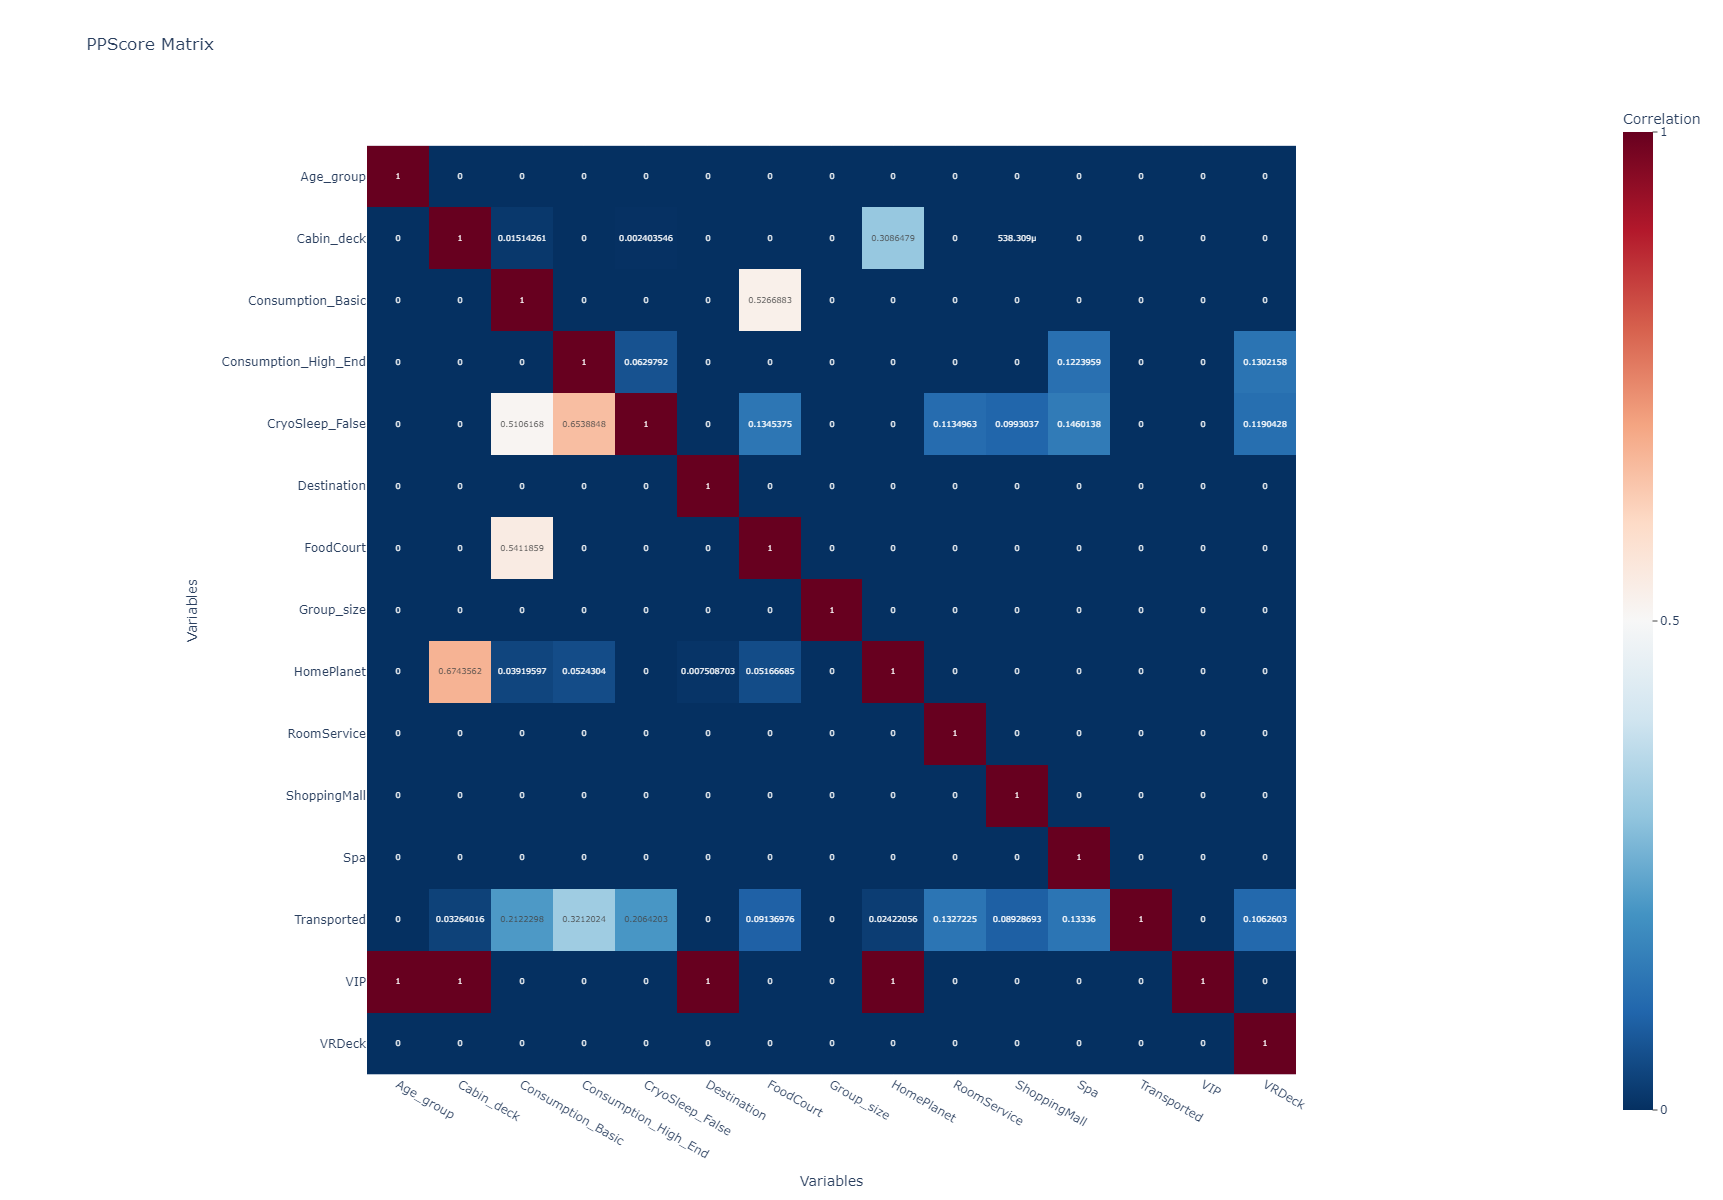

In [26]:
# Create a heatmap to visualize the PPScore matrix
fig = px.imshow(matrix_df_CatBoost_Mixed,
                text_auto=True, # Display correlation values in the heatmap cells
                labels=dict(x="Variables", y="Variables", color="PPScore"),
                x=matrix_df_CatBoost_Mixed.columns, # Set x-axis labels to variable names
                y=matrix_df_CatBoost_Mixed.columns, # Set y-axis labels to variable names
                color_continuous_scale='RdBu_r', # Color scale for correlation values
                title='PPScore Matrix')

# Update the layout of the color scale to center on zero
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Correlation',
        ticks='outside',
        tickvals=[-1, -0.5, 0, 0.5, 1],
        ticktext=['-1', '-0.5', '0', '0.5', '1']
    ),
    width=1800,  # Width of the figure in pixels
    height=1200,  # Height of the figure in pixels
    autosize=False  # Disable autosizing to use specified width and height
)

# Show the plot
fig.show()

<font size=4>The above PPScore matrix heatmap for mixed One-Hot and  CatBoost encoded training set is quite different from that of pure CatBoost encoding in 1.1.3 in that CryoSleep_False is strongly correlated to expenses and the label.</font>

<a id="1.2"></a>
## 1.2 **Statistical Methods**

<font size=4>We plan to use F-score (ANOVA), Chi-square and mutual information criteria to pick the best numerical features. </font>

In [27]:
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

In [28]:
df_train_Y = df_train["Transported"]

<font size=4>We are only going to apply it to non-encoded training set because the statistical tests involving the target-encoded categorical features will obviously be skewed by the leak of target information. </font>

<a id="1.2.1"></a>
### 1.2.1 **No encoding**

In [29]:
df_train_X = df_train.drop(columns = "Transported")

In [30]:
f_statistic, pval_f = f_classif(df_train_X.select_dtypes("number"), df_train_Y)

In [31]:
i_scores = mutual_info_classif(df_train_X.select_dtypes("number"), df_train_Y)

In [32]:
chi2_score, pval_chi2 = chi2(df_train_X.select_dtypes("number"), df_train_Y)

In [33]:
num_feature = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Group_size', 'Consumption_High_End', 'Consumption_Basic']

In [34]:
df_filter=pd.DataFrame({'Mutual Info.':i_scores,'Chi Square':chi2_score, 'F-stat': f_statistic, 'Feature':num_feature})
df_filter.set_index('Feature', inplace = True)
df_filter.sort_values('Mutual Info.', inplace = True, ascending = False)

In [35]:
df_filter

Mutual Info.    Chi Square       F-stat
Feature                                                      
Consumption_High_End      0.179176  3.973593e+06  1345.595259
Consumption_Basic         0.112192  1.501856e+05    35.201776
RoomService               0.076106  1.004812e+06   564.420702
Spa                       0.072065  1.525687e+06   473.754074
VRDeck                    0.067523  1.447418e+06   386.586413
ShoppingMall              0.059424  1.469172e+03     0.758480
FoodCourt                 0.044510  1.881948e+05    35.788692
Group_size                0.005765  7.529799e+01    60.535270

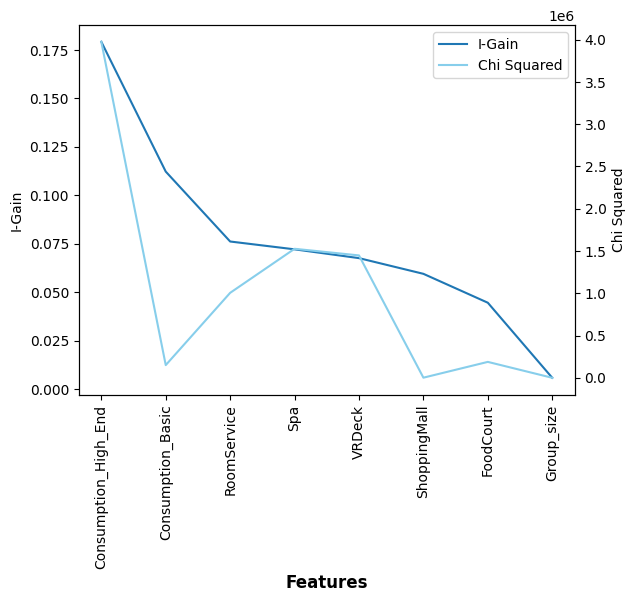

In [36]:
fig, ax = plt.subplots()
rr = range(0,len(num_feature))
ax2 = ax.twinx()
ax.plot(df_filter.index, df_filter["Mutual Info."], label='I-Gain')
ax2.plot(df_filter.index, df_filter["Chi Square"], color='skyblue', label='Chi Squared')
ax.set_xticks(rr)

ax.set_xticklabels(list(df_filter.index), rotation = 90)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Chi Squared')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

<font size=4>We see that the two scores are not particularly well correlated.</font>

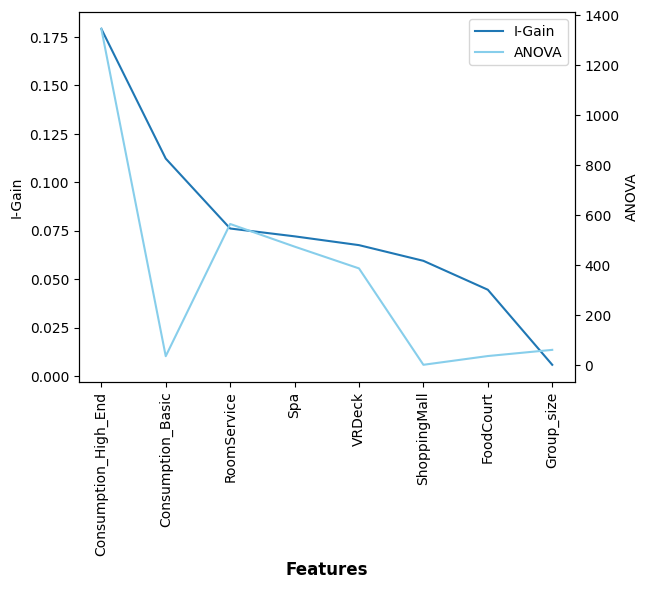

In [37]:
fig, ax = plt.subplots()
rr = range(0,len(num_feature))
ax2 = ax.twinx()
ax.plot(df_filter.index, df_filter["Mutual Info."], label='I-Gain')
ax2.plot(df_filter.index, df_filter["F-stat"], color='skyblue', label='ANOVA')
ax.set_xticks(rr)

ax.set_xticklabels(list(df_filter.index), rotation = 90)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('ANOVA')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

<font size=4>Again, we see that the two scores are not well correlated, bu ANOVA and Chi-square turn out to match each other relatively well.</font>

<font size=4>From the above analysis, it is advisable to drop the feature"Group_size". And we see Consumption_High_End is statistically the strongest individual predictor.</font>

<a id="2"></a>
# 2 **Model dependent method**

<a id="2.1"></a>
## 2.1 **Boruta**

<font size=4>Although clearly there are several strong correlations among some of the features, we still give Boruta a try. Note that Boruta is an all-relevant algorithm designed to select all the features that — individually — have any predictive power at all. </font>

In [38]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

<a id="2.1.1"></a>
### 2.1.1 **No encoding**

In [39]:
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

In [40]:
###initialize Boruta
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 10
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 500 # number of trials to perform
)

In [41]:
df_train_num = df_train_X.select_dtypes("number")

In [42]:
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(df_train_num), np.array(df_train_Y))

BorutaPy(estimator=RandomForestClassifier(max_depth=10, n_estimators=40,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F73EC40F940),
         max_iter=500, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F73EC40F940)

In [43]:
df_train_num.columns[boruta.support_].to_list()

['RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Consumption_High_End',
 'Consumption_Basic']

<font size=4>We see that Boruta also dropped "Group_size" feature, which aligns with our selection results for numerical features using statistical tests in 1.1 </font>

<a id="2.1.2"></a>
### 2.1.2 **WOE encoding**

In [44]:
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 10
)
boruta_WOE = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 500 # number of trials to perform
)

In [45]:
df_train_X_WOE = df_train_WOE.drop(columns="Transported")

In [46]:
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta_WOE.fit(np.array(df_train_X_WOE), np.array(df_train_Y))

BorutaPy(estimator=RandomForestClassifier(max_depth=10, n_estimators=48,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F73EC40F940),
         max_iter=500, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F73EC40F940)

In [47]:
df_train_X_WOE.columns[boruta_WOE.support_].to_list()

['CryoSleep',
 'Cabin_deck',
 'HomePlanet',
 'Age_group',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Consumption_High_End',
 'Consumption_Basic']

<font size=4>We are recommended to drop three features, i.e. Group_size and VIP. </font>

<a id="2.1.3"></a>
### 2.1.3 **CatBoost encoding**

In [48]:
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 10
)
boruta_CatBoost = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 500 # number of trials to perform
)

In [49]:
### fit Boruta (it accepts np.array, not pd.DataFrame)
df_train_X_CatBoost = df_train_CatBoost.drop(columns="Transported")
boruta_CatBoost.fit(np.array(df_train_X_CatBoost), np.array(df_train_Y))

BorutaPy(estimator=RandomForestClassifier(max_depth=10, n_estimators=46,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F73EC40F940),
         max_iter=500, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F73EC40F940)

In [50]:
df_train_X_CatBoost.columns[boruta_CatBoost.support_].to_list()

['Destination',
 'Cabin_deck',
 'HomePlanet',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Consumption_High_End',
 'Consumption_Basic']

In [51]:
df_train_X_CatBoost.columns

Index(['CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'HomePlanet',
       'Age_group', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Group_size', 'Consumption_High_End', 'Consumption_Basic'],
      dtype='object')

<font size=4>We are recommended to drop four features, i.e. Group_size, Age_group and VIP, plus CryoSleep. </font>

<a id="2.1.4"></a>
### 2.1.4 **MEstimate encoding**

In [52]:
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 10
)
boruta_ME = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 500 # number of trials to perform
)

In [53]:
### fit Boruta (it accepts np.array, not pd.DataFrame)
df_train_X_MEstimate = df_train_MEstimate.drop(columns="Transported")
boruta_ME.fit(np.array(df_train_X_MEstimate), np.array(df_train_Y))

BorutaPy(estimator=RandomForestClassifier(max_depth=10, n_estimators=48,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F73EC40F940),
         max_iter=500, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F73EC40F940)

In [54]:
df_train_X_MEstimate.columns[boruta_ME.support_].to_list()

['CryoSleep',
 'Destination',
 'Cabin_deck',
 'HomePlanet',
 'Age_group',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Consumption_High_End',
 'Consumption_Basic']

<font size=4>We are recommended to drop three features, i.e. Group_size and VIP. </font>

<a id="2.1.5"></a>
### 2.1.5 **Mixed One-Hot CatBoost encoding**

In [55]:
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 10
)
boruta_CatBoost_Mixed = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 500 # number of trials to perform
)

In [56]:
### fit Boruta (it accepts np.array, not pd.DataFrame)
df_train_X_CatBoost_Mixed = df_train_CatBoost_Mixed.drop(columns="Transported")
boruta_CatBoost_Mixed.fit(np.array(df_train_X_CatBoost_Mixed), np.array(df_train_Y))

BorutaPy(estimator=RandomForestClassifier(max_depth=10, n_estimators=48,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F73EC40F940),
         max_iter=500, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F73EC40F940)

In [57]:
df_train_X_CatBoost_Mixed.columns[boruta_CatBoost_Mixed.support_].to_list()

['Destination',
 'Cabin_deck',
 'HomePlanet',
 'Age_group',
 'CryoSleep_False',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Consumption_High_End',
 'Consumption_Basic']

<font size=4>We are recommended to drop VIP, Group_Size. </font>

<a id="2.2"></a>
## 2.2 **MRMR**

<font size=4>Besides all-relevant methods like Boruta, sometimes we want to select a small set of features that — put together — have the maximum possible predictive power, since the best N features are not always the N best features. We use MRMR (Maximum Relevance — Minimum Redundancy) to deal with this problems.</font>

In [58]:
import mrmr
from mrmr import mrmr_classif

In [59]:
df_train_cat = ["CryoSleep", "Destination", "VIP", "HomePlanet", "Age_group", "Cabin_deck"]

In [60]:
for K in range(1, 15):
    select_K = mrmr_classif(df_train_X, df_train_Y, K,
                        relevance='rf', redundancy='c', denominator='mean',
                        cat_features=df_train_cat, cat_encoding='leave_one_out',
                        only_same_domain=False, return_scores=False,
                        n_jobs=-1, show_progress=True)
    print(f"If we select {K} features, then the selected features are {select_K}.")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 289.34it/s]


If we select 1 features, then the selected features are ['Destination'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.40s/it]


If we select 2 features, then the selected features are ['Destination', 'Age_group'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 29.62it/s]


If we select 3 features, then the selected features are ['Destination', 'Age_group', 'Consumption_High_End'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 14.26it/s]


If we select 4 features, then the selected features are ['Destination', 'Age_group', 'Consumption_High_End', 'HomePlanet'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 17.19it/s]


If we select 5 features, then the selected features are ['Destination', 'Age_group', 'Consumption_High_End', 'HomePlanet', 'ShoppingMall'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.08it/s]


If we select 6 features, then the selected features are ['Destination', 'Age_group', 'Consumption_High_End', 'HomePlanet', 'ShoppingMall', 'Cabin_deck'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.27it/s]


If we select 7 features, then the selected features are ['Destination', 'Age_group', 'Consumption_High_End', 'HomePlanet', 'ShoppingMall', 'Cabin_deck', 'RoomService'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.14it/s]


If we select 8 features, then the selected features are ['Destination', 'Age_group', 'Consumption_High_End', 'HomePlanet', 'ShoppingMall', 'Cabin_deck', 'RoomService', 'Consumption_Basic'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  1.94it/s]


If we select 9 features, then the selected features are ['Destination', 'Age_group', 'Consumption_High_End', 'HomePlanet', 'ShoppingMall', 'Cabin_deck', 'RoomService', 'Consumption_Basic', 'VRDeck'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.70it/s]


If we select 10 features, then the selected features are ['Destination', 'Age_group', 'Consumption_High_End', 'HomePlanet', 'ShoppingMall', 'Cabin_deck', 'RoomService', 'Consumption_Basic', 'VRDeck', 'Spa'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:08<00:00,  1.29it/s]


If we select 11 features, then the selected features are ['Destination', 'Age_group', 'Consumption_High_End', 'HomePlanet', 'ShoppingMall', 'Cabin_deck', 'RoomService', 'Consumption_Basic', 'VRDeck', 'Spa', 'FoodCourt'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:09<00:00,  1.30it/s]


If we select 12 features, then the selected features are ['Destination', 'Age_group', 'Consumption_High_End', 'HomePlanet', 'ShoppingMall', 'Cabin_deck', 'RoomService', 'Consumption_Basic', 'VRDeck', 'Spa', 'FoodCourt', 'Group_size'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:09<00:00,  1.30it/s]


If we select 13 features, then the selected features are ['Destination', 'Age_group', 'Consumption_High_End', 'HomePlanet', 'ShoppingMall', 'Cabin_deck', 'RoomService', 'Consumption_Basic', 'VRDeck', 'Spa', 'FoodCourt', 'Group_size'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:08<00:00,  1.34it/s]

If we select 14 features, then the selected features are ['Destination', 'Age_group', 'Consumption_High_End', 'HomePlanet', 'ShoppingMall', 'Cabin_deck', 'RoomService', 'Consumption_Basic', 'VRDeck', 'Spa', 'FoodCourt', 'Group_size'].


In [61]:
for K in range(1, 15):
    select_K = mrmr_classif(df_train_WOE.drop(columns="Transported"), df_train_Y, K, relevance='rf')
    print(f"If we select {K} features when categorical features are encoded using Weight of Evidence, then the selected features are {select_K}.")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 459.20it/s]


If we select 1 features when categorical features are encoded using Weight of Evidence, then the selected features are ['Consumption_High_End'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.52s/it]


If we select 2 features when categorical features are encoded using Weight of Evidence, then the selected features are ['Consumption_High_End', 'Group_size'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 25.61it/s]


If we select 3 features when categorical features are encoded using Weight of Evidence, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 18.86it/s]


If we select 4 features when categorical features are encoded using Weight of Evidence, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 19.36it/s]


If we select 5 features when categorical features are encoded using Weight of Evidence, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 14.11it/s]


If we select 6 features when categorical features are encoded using Weight of Evidence, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 17.99it/s]


If we select 7 features when categorical features are encoded using Weight of Evidence, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 16.04it/s]


If we select 8 features when categorical features are encoded using Weight of Evidence, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck', 'ShoppingMall'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  6.25it/s]


If we select 9 features when categorical features are encoded using Weight of Evidence, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.28it/s]


If we select 10 features when categorical features are encoded using Weight of Evidence, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet', 'Cabin_deck'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:04<00:00,  2.38it/s]


If we select 11 features when categorical features are encoded using Weight of Evidence, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet', 'Cabin_deck', 'FoodCourt'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:05<00:00,  2.03it/s]


If we select 12 features when categorical features are encoded using Weight of Evidence, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet', 'Cabin_deck', 'FoodCourt', 'Destination'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.75it/s]


If we select 13 features when categorical features are encoded using Weight of Evidence, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet', 'Cabin_deck', 'FoodCourt', 'Destination', 'Age_group'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:07<00:00,  1.79it/s]

If we select 14 features when categorical features are encoded using Weight of Evidence, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet', 'Cabin_deck', 'FoodCourt', 'Destination', 'Age_group', 'VIP'].


In [62]:
for K in range(1, 15):
    select_K = mrmr_classif(df_train_MEstimate.drop(columns="Transported"), df_train_Y, K, relevance='rf')
    print(f"If we select {K} features when categorical features are encoded using MEstimate, then the selected features are {select_K}.")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 583.84it/s]


If we select 1 features when categorical features are encoded using MEstimate, then the selected features are ['Consumption_High_End'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.45s/it]


If we select 2 features when categorical features are encoded using MEstimate, then the selected features are ['Consumption_High_End', 'Group_size'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.88it/s]


If we select 3 features when categorical features are encoded using MEstimate, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 22.27it/s]


If we select 4 features when categorical features are encoded using MEstimate, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 20.91it/s]


If we select 5 features when categorical features are encoded using MEstimate, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 19.54it/s]


If we select 6 features when categorical features are encoded using MEstimate, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.58it/s]


If we select 7 features when categorical features are encoded using MEstimate, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 13.36it/s]


If we select 8 features when categorical features are encoded using MEstimate, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck', 'ShoppingMall'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  6.04it/s]


If we select 9 features when categorical features are encoded using MEstimate, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.87it/s]


If we select 10 features when categorical features are encoded using MEstimate, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet', 'Cabin_deck'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:04<00:00,  2.48it/s]


If we select 11 features when categorical features are encoded using MEstimate, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet', 'Cabin_deck', 'FoodCourt'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:06<00:00,  1.99it/s]


If we select 12 features when categorical features are encoded using MEstimate, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet', 'Cabin_deck', 'FoodCourt', 'Destination'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.69it/s]


If we select 13 features when categorical features are encoded using MEstimate, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet', 'Cabin_deck', 'FoodCourt', 'Destination', 'Age_group'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:08<00:00,  1.64it/s]

If we select 14 features when categorical features are encoded using MEstimate, then the selected features are ['Consumption_High_End', 'Group_size', 'Consumption_Basic', 'RoomService', 'CryoSleep', 'Spa', 'VRDeck', 'ShoppingMall', 'HomePlanet', 'Cabin_deck', 'FoodCourt', 'Destination', 'Age_group', 'VIP'].


In [63]:
for K in range(1, 15):
    select_K = mrmr_classif(df_train_CatBoost.drop(columns="Transported"), df_train_Y, K, relevance='rf')
    print(f"If we select {K} features when categorical features are encoded using CatBoost, then the selected features are {select_K}.")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 338.14it/s]


If we select 1 features when categorical features are encoded using CatBoost, then the selected features are ['Consumption_High_End'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.67s/it]


If we select 2 features when categorical features are encoded using CatBoost, then the selected features are ['Consumption_High_End', 'ShoppingMall'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.80it/s]


If we select 3 features when categorical features are encoded using CatBoost, then the selected features are ['Consumption_High_End', 'ShoppingMall', 'Consumption_Basic'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 13.32it/s]


If we select 4 features when categorical features are encoded using CatBoost, then the selected features are ['Consumption_High_End', 'ShoppingMall', 'Consumption_Basic', 'RoomService'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.31it/s]


If we select 5 features when categorical features are encoded using CatBoost, then the selected features are ['Consumption_High_End', 'ShoppingMall', 'Consumption_Basic', 'RoomService', 'Spa'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 13.36it/s]


If we select 6 features when categorical features are encoded using CatBoost, then the selected features are ['Consumption_High_End', 'ShoppingMall', 'Consumption_Basic', 'RoomService', 'Spa', 'VRDeck'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 13.57it/s]


If we select 7 features when categorical features are encoded using CatBoost, then the selected features are ['Consumption_High_End', 'ShoppingMall', 'Consumption_Basic', 'RoomService', 'Spa', 'VRDeck', 'HomePlanet'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  9.76it/s]


If we select 8 features when categorical features are encoded using CatBoost, then the selected features are ['Consumption_High_End', 'ShoppingMall', 'Consumption_Basic', 'RoomService', 'Spa', 'VRDeck', 'HomePlanet', 'Cabin_deck'].


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  5.75it/s]


If we select 9 features when categorical features are encoded using CatBoost, then the selected features are ['Consumption_High_End', 'ShoppingMall', 'Consumption_Basic', 'RoomService', 'Spa', 'VRDeck', 'HomePlanet', 'Cabin_deck', 'FoodCourt'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.54it/s]


If we select 10 features when categorical features are encoded using CatBoost, then the selected features are ['Consumption_High_End', 'ShoppingMall', 'Consumption_Basic', 'RoomService', 'Spa', 'VRDeck', 'HomePlanet', 'Cabin_deck', 'FoodCourt', 'Destination'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:04<00:00,  2.75it/s]


If we select 11 features when categorical features are encoded using CatBoost, then the selected features are ['Consumption_High_End', 'ShoppingMall', 'Consumption_Basic', 'RoomService', 'Spa', 'VRDeck', 'HomePlanet', 'Cabin_deck', 'FoodCourt', 'Destination', 'Group_size'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:06<00:00,  1.90it/s]


If we select 12 features when categorical features are encoded using CatBoost, then the selected features are ['Consumption_High_End', 'ShoppingMall', 'Consumption_Basic', 'RoomService', 'Spa', 'VRDeck', 'HomePlanet', 'Cabin_deck', 'FoodCourt', 'Destination', 'Group_size', 'CryoSleep'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.72it/s]


If we select 13 features when categorical features are encoded using CatBoost, then the selected features are ['Consumption_High_End', 'ShoppingMall', 'Consumption_Basic', 'RoomService', 'Spa', 'VRDeck', 'HomePlanet', 'Cabin_deck', 'FoodCourt', 'Destination', 'Group_size', 'CryoSleep', 'Age_group'].


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:07<00:00,  1.84it/s]

If we select 14 features when categorical features are encoded using CatBoost, then the selected features are ['Consumption_High_End', 'ShoppingMall', 'Consumption_Basic', 'RoomService', 'Spa', 'VRDeck', 'HomePlanet', 'Cabin_deck', 'FoodCourt', 'Destination', 'Group_size', 'CryoSleep', 'Age_group', 'VIP'].


<font size=4>Well, we see different encoding schemes lead to drastically different results, except that Consumption_High_End is always among the most important features.</font>

<a id="2.3"></a>
## 2.3 **Baseline Model: CatBoostClassifer**

<a id="2.3.1"></a>
### 2.3.1 **Baseline Model with cross-validation**

<font size=4>Let's first start with a baseline model. We pick CatBoostClassifier with default hyperparameters as our baseline model, and we will do a 10-fold cross-validated training on non-encoded,  WOE encoded,  CatBoost encoded and  MEstimator encoded. We then apply the same method to 3 mixed-encoded training sets.</font>

<a id="2.3.1.0"></a>
#### 2.3.1.0 **CV model training: class definition**

In [64]:
from catboost import CatBoostClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, precision_score, recall_score, precision_recall_curve, average_precision_score, precision_recall_fscore_support, mean_absolute_error
import logging

In [65]:
def get_cat_features(df: pd.DataFrame, label: str) -> list[str]:
    cat_features =  [feature for feature in df.columns if feature != label and (df[feature].dtype == "O" or df[feature].dtype == "bool" or df[feature].dtype == "category")]
    return cat_features

In [66]:
def get_single_metric(metric_name: str):
    """
    Get metric by its name
    :param metric_name: Name of desired encoder
    :param metric_kwargs: kwrags for metric object
    :return: metric object
    """
    metric_classes = {
        "accuracy": accuracy_score,
        "roc_auc": roc_auc_score,
        "f1": f1_score,
        "confusion_matrix": confusion_matrix,
        "precision": precision_score,
        "recall": recall_score,
        "precision_recall_curve": precision_recall_curve,
        "average_precision": average_precision_score,
        "precision_recall_fscore_support": precision_recall_fscore_support,
        "MAE": mean_absolute_error
    }

    metric_class = metric_classes.get(metric_name)
    if metric_class:
        return metric_class
    else:
        raise ValueError(f"Metric name '{metric_name}' is not supported.")

In [67]:
def get_fit_cat_params(estimator_class, cat_col_list=[]) -> dict:
    estimator_classes = {
        "CatBoostClassifier": {"cat_features": cat_col_list},
        "CatBoostRegressor": {"cat_features": cat_col_list},
        "LGBMClassifier": {"categorical_feature": cat_col_list},
        "LGBMRegressor": {"categorical_feature": cat_col_list},
        "HistGradientBoostingClassifier": {"categorical_features": cat_col_list},
        "HistGradientBoostingRegressor": {"categorical_features": cat_col_list},
    }
    cat_key = estimator_classes.get(estimator_class)
    if estimator_class:
        return cat_key
    else:
        raise ValueError(f"Estimator class '{estimator_class}' is not supported.")

In [68]:
class cv_training(BaseEstimator, ClassifierMixin):
    """
    This class performs cross-validated training for a given estimator on a provided dataset. It integrates
    scikit-learn's BaseEstimator and TransformerMixin to support pipelining and consistent interface with
    scikit-learn tools.

    Attributes:
        estimator (object): The machine learning estimator object that adheres to scikit-learn's estimator interface.
        params (dict): Parameters for initializing the estimator.
        random_state (int): Random state to ensure reproducibility.
        cv (object): Cross-validation strategy object.
        n_splits (int): Number of splits for the cross-validation.
        estimators (list): List of trained estimator objects from each fold.
        features (list): List of feature names used for training.
        fit_kwargs (dict): Additional keyword arguments for the `fit` method of the estimator.
        predict_kwargs (dict): Additional keyword arguments for the `predict` method of the estimator.
        metrics (dict): Dictionary storing the scores for each metric across folds.
        metrics_stats (dict): Dictionary storing the statistical measures (mean, median, std, final) for each metric.

    Args:
        n_splits (int): Number of splits for cross-validation.
        estimator (object): Estimator to be used for training.
        params (dict, optional): Dictionary of parameters to initialize the estimator.
        random_state (int, optional): Seed for the random number generator used in cross-validation.

    Raises:
        ValueError: If the label column, metric list, or metric optimization direction list is not properly defined.
    """

    def __init__(self, n_splits: int = 10, estimator=None, params: dict = {}, random_state: int = 42):
        self.estimator = estimator
        self.params = params
        self.random_state = random_state
        self.cv = None
        self.n_splits = n_splits
        self.estimators = []
        self.features = []
        self.conf_matrices = []  # Store confusion matrices for each fold

    def fit(
        self,
        df: pd.DataFrame,
        label: str = None,
        fit_kwargs: dict = {},
        predict_kwargs: dict = {},
        metric_list: list[str] = [],
        metric_opt_dir_list: list[str] = [],
        metric_kwargs: dict = {},
    ):
        """
        Fits the estimator to the data using specified cross-validation strategy and computes metrics for each fold.

        Args:
            df (pd.DataFrame): DataFrame containing the training data.
            label (str): Name of the target variable column.
            fit_kwargs (dict): Additional keyword arguments for the `fit` method of the estimator.
            predict_kwargs (dict): Additional keyword arguments for the `predict` method of the estimator.
            metric_list (list of str): List of metric names to evaluate.
            metric_opt_dir_list (list of str): List specifying the direction ('min' for minimization, 'max' for maximization or 'compr' for comprehensive information) for each metric's optimization.
            metric_kwargs (dict): Additional keyword arguments for each metric computation.

        Returns:
            self: Returns an instance of self.
        """
        logging.info("Starting the fitting process.")
        print("Starting the fitting process.")

        if not label:
            raise ValueError("Label column must be specified.")
        if not metric_list:
            raise ValueError("Metric list must not be empty.")
        if not metric_opt_dir_list:
            raise ValueError("Metric optimization direction list must not be empty.")

        # First, we prepare the features X and the label Y for the training
        self.label = label
        Y = df.loc[:, self.label]
        X = df.drop(columns=self.label)
        self.features = X.columns

        # Second, we initialize the estimator's fit and predict method and the metrics, as well as the dictionaries for metrics and metric stats
        self.fit_kwargs = fit_kwargs
        self.predict_kwargs = predict_kwargs

        if metric_kwargs == {}:
            self.metric_kwargs = {metric_name: {} for metric_name in metric_list}
        else:
            self.metric_kwargs = metric_kwargs

        self.metrics = {metric_name: [] for metric_name in metric_list}
        self.metrics_stats = {
            metric_name: {"mean": 0.0, "median": 0.0, "std": 0.0, "final": 0.0} for metric_name in metric_list
        }

        self.cv = (
            StratifiedKFold(n_splits=self.n_splits, random_state=self.random_state)
            if (Y.dtype == "O" or Y.dtype == bool or Y.dtype == "category")
            else KFold(n_splits=self.n_splits, random_state=self.random_state, shuffle=True)
        )
        # Then, we start cross-validated training process
        for n_fold, (train_index, val_index) in enumerate(self.cv.split(X, Y)):

            logging.info(f"Starting training for fold {n_fold+1}")
            print(f"Starting training for fold {n_fold+1}")

            # Define X_train, Y_train, X_val, Y_val
            X_train, Y_train = X.iloc[train_index], Y.iloc[train_index]
            X_val, Y_val = X.iloc[val_index], Y.iloc[val_index]

            # Fit the estimator and append it to the list "self.estimators"
            estimator = self.estimator(**self.params)
            estimator.fit(X_train, Y_train, **fit_kwargs)
            self.estimators.append(estimator)

            # Make predictions and get scores for each metric
            for metric_name in metric_list:
                metric = get_single_metric(metric_name)
                if metric_name in ["roc_auc", "average_precision", "precision_recall_curve"]:
                    y_pred = estimator.predict_proba(X_val, **predict_kwargs)[:, 1]
                else:
                    y_pred = estimator.predict(X_val, **predict_kwargs)
                result = metric(Y_val, y_pred, **self.metric_kwargs[metric_name])
                self.metrics[metric_name].append(result)
            logging.info(f"Completed training for fold {n_fold+1}")
            print(f"Completed training for fold {n_fold+1}")

        # Finally, print some stats for training
        for metric_name, metric_opt_dir in zip(metric_list, metric_opt_dir_list):

            mean_score = np.mean(self.metrics[metric_name])
            self.metrics_stats[metric_name]["mean"] = mean_score

            median_score = np.median(self.metrics[metric_name])
            self.metrics_stats[metric_name]["median"] = median_score

            std_score = np.std(self.metrics[metric_name])
            self.metrics_stats[metric_name]["std"] = std_score

            if metric_opt_dir == "max":
                final_score = np.min([mean_score, median_score])
            elif metric_opt_dir == "min":
                final_score = np.max([mean_score, median_score])
            elif metric_opt_dir == "compr":
                final_score = np.stack(self.metrics[metric_name])
                final_score = np.sum(final_score, axis=0)
                plot_confusion_matrix(final_score, class_labels=["False", "True"])
            else:
                raise ValueError(
                    "metric_opt_dir as the direction of the metric optimization can either be 'min' for minimize and 'max' for maximize"
                )
            self.metrics_stats[metric_name]["final"] = final_score

            print("%" * 100)
            logging.info(
                f"The metric scores in all cv folds for {metric_name} are {self.metrics[metric_name]}. \n The final score is {final_score}, and the standard deviation is {std_score}"
            )
            print(
                f"The metric scores in all cv folds for {metric_name} are {self.metrics[metric_name]}. \n The final score is {final_score}, and the standard deviation is {std_score}"
            )
            print("%" * 100)

        return self

    def predict(self, df: pd.DataFrame, majority_threshold: int) -> pd.Series:
        """
        Applies the trained model to predict the target variable on a new dataset.

        Args:
            df (pd.DataFrame): DataFrame containing the new data on which predictions are to be made.

        Returns:
            df (pd.DataFrame): DataFrame with the predictions added as a new column corresponding to the label attribute.

        Raises:
            ValueError: If the model has not been trained before calling this method.
        """
        if not self.estimators:
            logging.error("Please first train the model using fit before making predictions")
            raise ValueError("Please first train the model using fit before making predictions")

        # Hard voting
        # Collect predictions from each fold's estimator
        predictions = [estimator.predict(df) for estimator in self.estimators]
        # Use mode (majority voting) for final prediction
        if majority_threshold is None:
            majority_threshold = len(self.estimators) // 2 + 1  # Simple majority

        # Compute the majority vote based on a custom threshold
        hard_vote_predictions = np.sum(predictions, axis=0) >= majority_threshold

        # Soft voting
        # Check if each estimator has a 'predict_proba' method
        if not all(hasattr(estimator, 'predict_proba') for estimator in self.estimators):
            raise AttributeError("All estimators must support the 'predict_proba' method for soft voting.")
        # Collect probability predictions from each fold's estimator
        prob_predictions = [estimator.predict_proba(df) for estimator in self.estimators]
        # Average the probability predictions
        mean_prob_predictions = np.mean(prob_predictions, axis=0)

        # Convert probabilities to final class predictions
        # This step is typical for binary classifications, adjust as necessary for multi-class
        soft_vote_predictions = np.argmax(mean_prob_predictions, axis=1)

        logging.info("Prediction completed for the test set")
        print("Prediction completed for the test set")

        return hard_vote_predictions.astype("int"), soft_vote_predictions

<a id="2.3.1.1"></a>
#### 2.3.1.1 **No encoding**

In [69]:
# Cast all the object type columns into category type
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        df_train[col] = df_train[col].astype('category')

In [70]:
base_params = {'verbose': False, 'eval_metric': 'Accuracy'}

In [71]:
base_cv = cv_training(estimator=CatBoostClassifier, params= base_params, n_splits = 10)

In [72]:
base_fit_kwargs = get_fit_cat_params(CatBoostClassifier.__name__, cat_col_list=get_cat_features(df_train, 'Transported'))

In [73]:
base_cv.fit(df_train, label="Transported", fit_kwargs=base_fit_kwargs, metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7933025404157044, 0.792147806004619, 0.7944572748267898, 0.8048498845265589, 0.8094688221709007, 0.8060046189376443, 0.8036951501154734, 0.8210161662817552, 0.7933025404157044, 0.7953757225433526]. 
 The final score is 0.79

cv_training(estimator=<class 'catboost.core.CatBoostClassifier'>,
            params={'eval_metric': 'Accuracy', 'verbose': False})

<a id="2.3.1.2"></a>
#### 2.3.1.2 **WOE encoding**

In [74]:
base_cv_WOE = cv_training(estimator=CatBoostClassifier, params= base_params, n_splits = 10)

In [75]:
base_cv_WOE.fit(df_train_WOE, label="Transported", metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7886836027713626, 0.8094688221709007, 0.7956120092378753, 0.7967667436489607, 0.8036951501154734, 0.8002309468822171, 0.8002309468822171, 0.8140877598152425, 0.7956120092378753, 0.8]. 
 The final score is 0.8001154734411086

cv_training(estimator=<class 'catboost.core.CatBoostClassifier'>,
            params={'eval_metric': 'Accuracy', 'verbose': False})

<a id="2.3.1.3"></a>
#### 2.3.1.3 **CatBoost encoding**

In [76]:
base_cv_CatBoost = cv_training(estimator=CatBoostClassifier, params= base_params, n_splits = 10)

In [77]:
base_cv_CatBoost.fit(df_train_CatBoost, label="Transported", metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7956120092378753, 0.8060046189376443, 0.7956120092378753, 0.7990762124711316, 0.8071593533487298, 0.8013856812933026, 0.7979214780600462, 0.8106235565819861, 0.7967667436489607, 0.793063583815029]. 
 The final score is 0.79

cv_training(estimator=<class 'catboost.core.CatBoostClassifier'>,
            params={'eval_metric': 'Accuracy', 'verbose': False})

<a id="2.3.1.4"></a>
#### 2.3.1.4 **MEstimator encoding**

In [78]:
base_cv_MEstimate = cv_training(estimator=CatBoostClassifier, params= base_params, n_splits = 10)

In [79]:
base_cv_MEstimate.fit(df_train_MEstimate, label="Transported", metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7909930715935335, 0.8071593533487298, 0.7944572748267898, 0.8013856812933026, 0.8117782909930716, 0.8013856812933026, 0.7990762124711316, 0.812933025404157, 0.7967667436489607, 0.8011560693641618]. 
 The final score is 0.80

cv_training(estimator=<class 'catboost.core.CatBoostClassifier'>,
            params={'eval_metric': 'Accuracy', 'verbose': False})

<a id="2.3.1.5"></a>
#### 2.3.1.5 **Mixed One-Hot and CatBoost encoding**

In [80]:
base_cv_CatBoost_Mixed = cv_training(estimator=CatBoostClassifier, params= base_params, n_splits = 10)

In [81]:
base_fit_kwargs_CatBoost_Mixed = get_fit_cat_params(CatBoostClassifier.__name__, cat_col_list=get_cat_features(df_train_CatBoost_Mixed, 'Transported'))

In [82]:
base_cv_CatBoost_Mixed.fit(df_train_CatBoost_Mixed, label="Transported", metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.792147806004619, 0.8071593533487298, 0.7933025404157044, 0.7933025404157044, 0.8060046189376443, 0.8060046189376443, 0.8002309468822171, 0.815242494226328, 0.7875288683602771, 0.8]. 
 The final score is 0.8000923787528869, 

cv_training(estimator=<class 'catboost.core.CatBoostClassifier'>,
            params={'eval_metric': 'Accuracy', 'verbose': False})

<a id="2.3.2"></a>
### **2.3.2 Baseline non-cv Model  and SHAP Analysis**

<font size=4>Let's start using SHAP to gain some insight into the contribution of each feature to the predictions made by CatBoostClassifer.</font>

In [83]:
import shap
from shap import TreeExplainer

<a id="2.3.2.1"></a>
#### **2.3.2.1 No encoding**

In [84]:
df_train_X = df_train.drop(columns="Transported")

In [85]:
base_fit_kwargs = get_fit_cat_params(CatBoostClassifier.__name__, cat_col_list=get_cat_features(df_train, 'Transported'))

In [86]:
base_model = CatBoostClassifier(**base_params).fit(df_train_X, df_train_Y, **base_fit_kwargs)

In [87]:
base_explainer = shap.TreeExplainer(base_model)
base_shap_values = base_explainer(df_train_X)

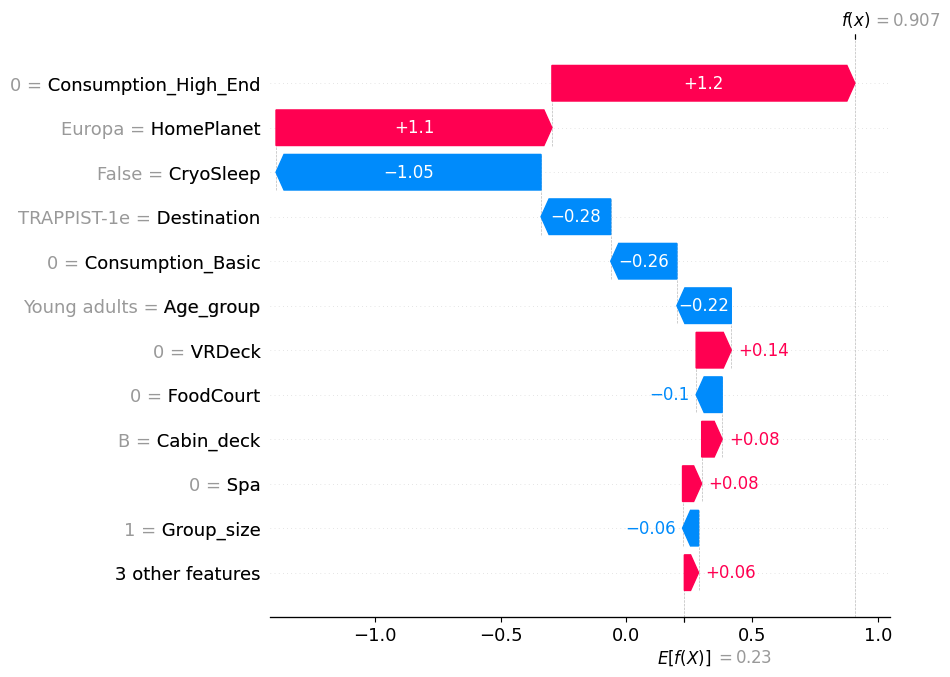

In [88]:
# waterfall plot for first observation
shap.plots.waterfall(base_shap_values[0],max_display=12)

<font size=4> A few key observations:
- We see Consumption_High_End once again plays an extremely important part: having spent low in Consumption_High_End significantly increase the chance of being transported.
- Not cryosleeping significantly lower the chance of getting transported.
- A passenger from Europa has a significant higher chance of being transported.
- Living on Cabin_deck B slightly increases the chance of being transported. The reason most likely is that only people from Europa live on B and no other deck has more people from Europa.
- Having TRAPPIST-1e as destination moderately lower the chance of being transported.
- Being a young adult (age 18-40) unfortunately slightly lower the chance of being transported.
- Somewhat surprisingly, we find having spent little on Consumption_Basic or FoodCourt moderately lower the chance of being transported. </font>

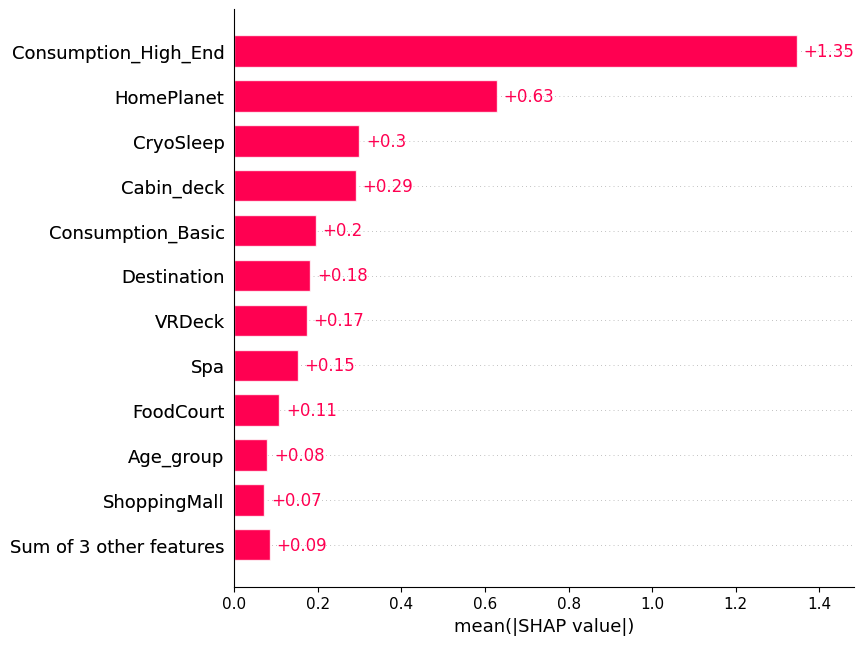

In [89]:
#Mean SHAP
shap.plots.bar(base_shap_values, max_display=12)

<font size=4> From the above mean value plot, we see the features on average contribute the most are Consumption_High_End, HomePlanet, Cabin_deck, CryoSleep, Consumption_Basic, VRDeck, Spa and Destination.</font>

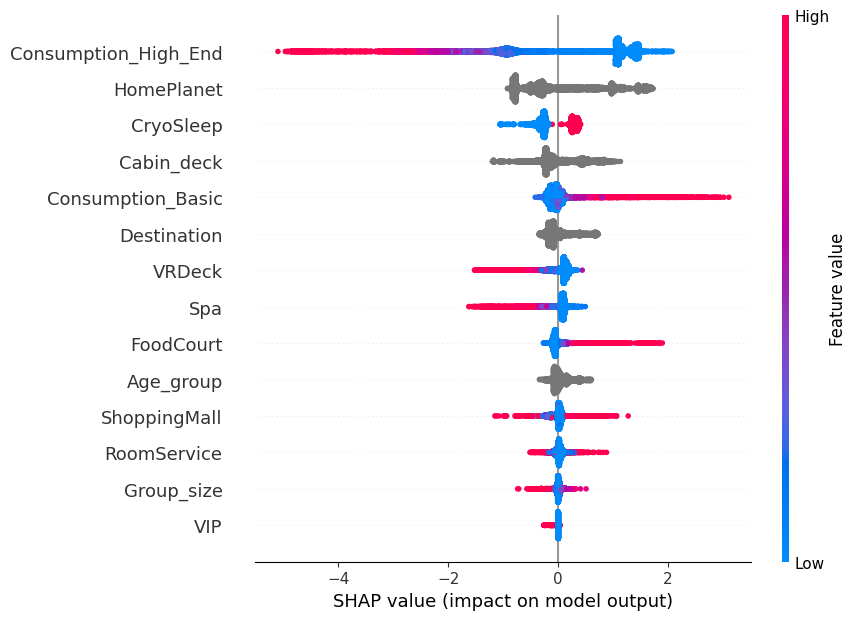

In [90]:
shap.plots.beeswarm(base_shap_values,max_display=16)

<font size=4>Again, from the above beeswarm plot, we see how devastating spending a lot in Consumption_High_End could be. However, we did not realize in our EDA that spendidng a lot in Consumption_Basic can also significantly increase the chance of being transported. </font>

<font size=4>It is interesting to see that spending a lot in Consumption_Basic but not in Consumption_High_End generally wouldn't hurt you chance of getting transported, which can also be illustrated in the figure below.</font>

In [91]:
# Create the scatter plot
fig = px.scatter(df_train, x='Consumption_High_End', y='Consumption_Basic', color='Transported',
                 color_continuous_scale=px.colors.sequential.Viridis)
# Update the layout of the color scale to center on zero
fig.update_layout(
    width=1400,  # Width of the figure in pixels
    height=1400,  # Height of the figure in pixels
    autosize=False  # Disable autosizing to use specified width and height
)

# Show the plot
fig.show()

<a id="2.3.2.2"></a>
#### **2.3.2.2 WOE encoding**

In [92]:
df_train_X_WOE = df_train_WOE.drop(columns="Transported")

In [93]:
base_fit_kwargs_WOE = get_fit_cat_params(CatBoostClassifier.__name__, cat_col_list=get_cat_features(df_train_WOE, 'Transported'))

In [94]:
base_model_WOE = CatBoostClassifier(**base_params).fit(df_train_X_WOE, df_train_Y, **base_fit_kwargs_WOE)

In [95]:
base_explainer_WOE = shap.TreeExplainer(base_model_WOE)
base_shap_values_WOE = base_explainer_WOE(df_train_X_WOE)

In [96]:
base_shap_interaction_WOE = base_explainer_WOE.shap_interaction_values(df_train_X_WOE)

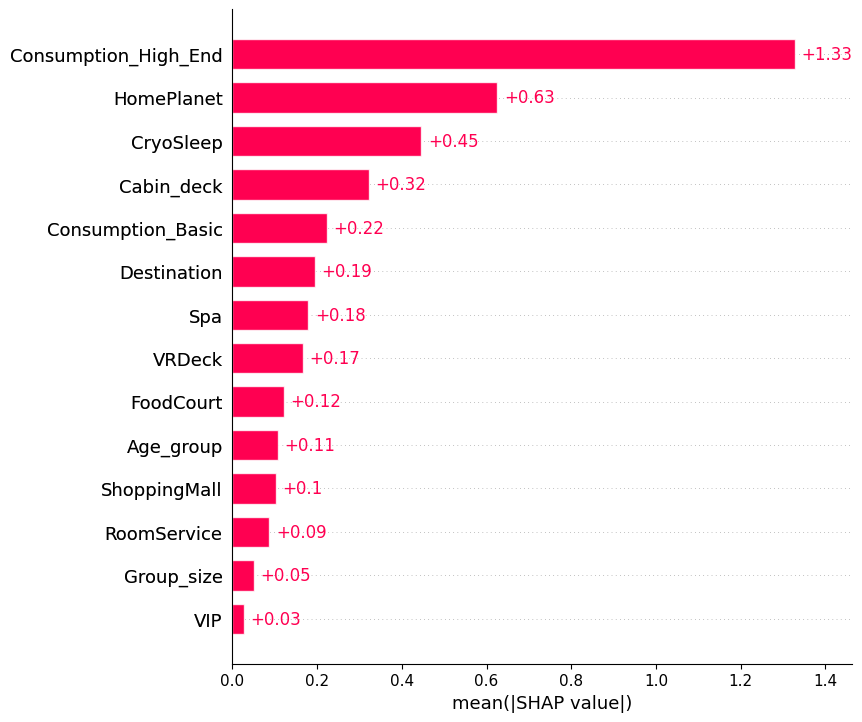

In [97]:
#Mean SHAP
shap.plots.bar(base_shap_values_WOE, max_display=24)

<font size=4> From the above mean value plot, we see the features on average contribute the most are Consumption_High_End, HomePlanet, Cabin_deck, CryoSleep, Consumption_Total, Consumption_Basic, VRDeck, Spa and FoodCourt.</font>

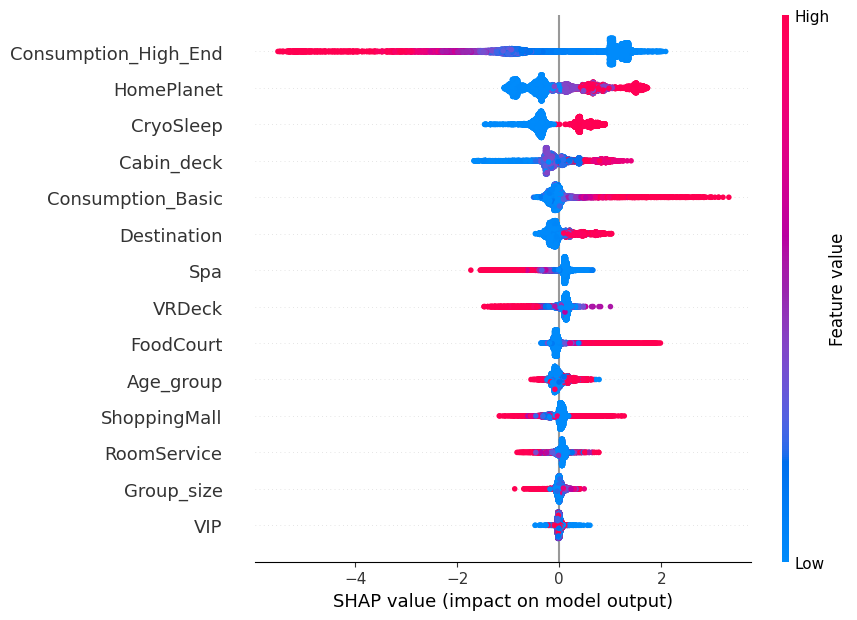

In [98]:
shap.plots.beeswarm(base_shap_values_WOE,max_display=32)

<font size=4>Again, from the above beeswarm plot, we see how devastating spending a lot in Consumption_High_End could be. However, we did not realize in our EDA that spendidng a lot in Consumption_Basic can also significantly increase the chance of being transported. HomePlanet, CryoSleep, Cabin_deck and all the other single spending items generally distinct contributions between high and low encoding values. In comparison, Consumption_Total does NOT look like a very powerful indicator, and Destination Age_group and VIP plays an almost non-existent role. </font>

In [99]:
# Get absolute mean of matrices
mean_base_shap_WOE = np.abs(base_shap_interaction_WOE).mean(0)
df_shap_inter_WOE = pd.DataFrame(mean_base_shap_WOE,index=df_train_X_WOE.columns,columns=df_train_X_WOE.columns)

# times off diagonal by 2
df_shap_inter_WOE.where(df_shap_inter_WOE.values == np.diagonal(df_shap_inter_WOE),df_shap_inter_WOE.values*2,inplace=True)

# Create a heatmap to visualize the PPScore matrix
fig = px.imshow(df_shap_inter_WOE,
                text_auto=True, # Display correlation values in the heatmap cells
                labels=dict(x="Variables", y="Variables", color="SHAP Interaction"),
                x=df_shap_inter_WOE.columns, # Set x-axis labels to variable names
                y=df_shap_inter_WOE.columns, # Set y-axis labels to variable names
                color_continuous_scale='RdBu_r', # Color scale for correlation values
                title='SHAP Interaction Matrix')

# Update the layout of the color scale to center on zero
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Correlation',
        ticks='outside',
        tickvals=[-1, -0.5, 0, 0.5, 1],
        ticktext=['-1', '-0.5', '0', '0.5', '1']
    ),
    width=1800,  # Width of the figure in pixels
    height=1200,  # Height of the figure in pixels
    autosize=False  # Disable autosizing to use specified width and height
)

# Show the plot
fig.show()

<font size=4>We see from the above interaction value metric that Consumption_High_End is deservedly the strongest predictor, it pitches in a great deal even just on its own. Also, we see HomePlanet and Cabin_deck become stronger predictores. Clearly, HomePlanet and Consumption_High_End has strong interaction, probably due to people from Europa had stronger buying power.</font>

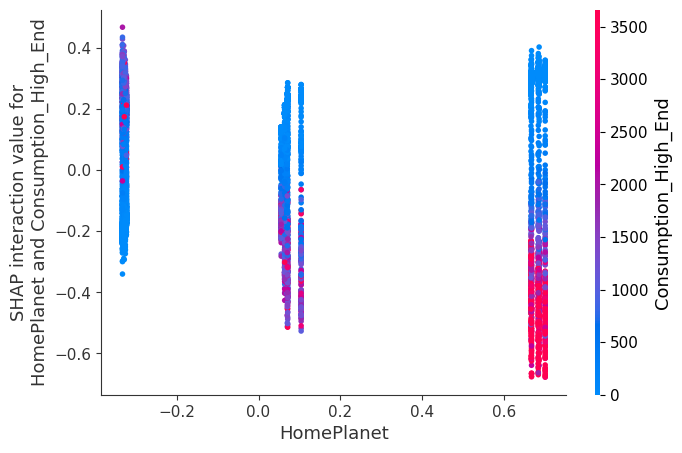

In [100]:
shap.dependence_plot(
    ("HomePlanet", "Consumption_High_End"),
    base_shap_interaction_WOE, df_train_X_WOE,
    display_features=df_train_X_WOE)

<font size=4>We see from the above interaction plot between HomePlanet_Europa (the stripes on the right) and Consumption_High_End that spending a lot in Consumption_High_End as someone from Europa can be a really ominous thing..</font>

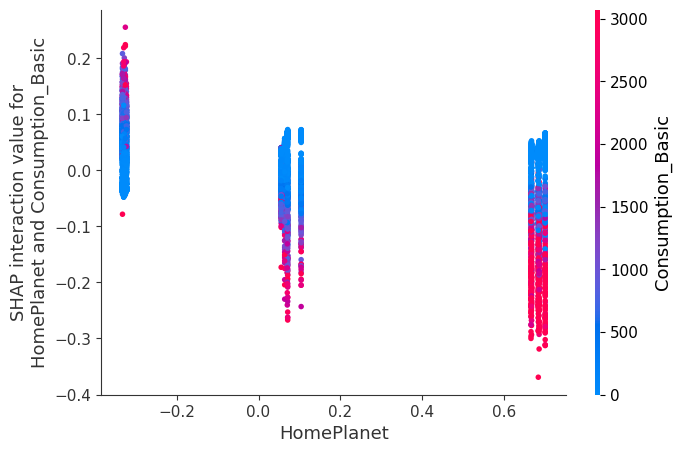

In [101]:
shap.dependence_plot(
    ("HomePlanet", "Consumption_Basic"),
    base_shap_interaction_WOE, df_train_X_WOE,
    display_features=df_train_X_WOE)

<font size=4>We see from the above interaction plot between HomePlanet_Europa (the rightmost cluster) and Consumption_Basic that spending a lot in Consumption_Basic as someone from Europa reduce the chance of getting transported. The story for Martian passengers (the leftmost cluster) is entirely opposite, spending much in Consumption_Basic generally helps.</font>

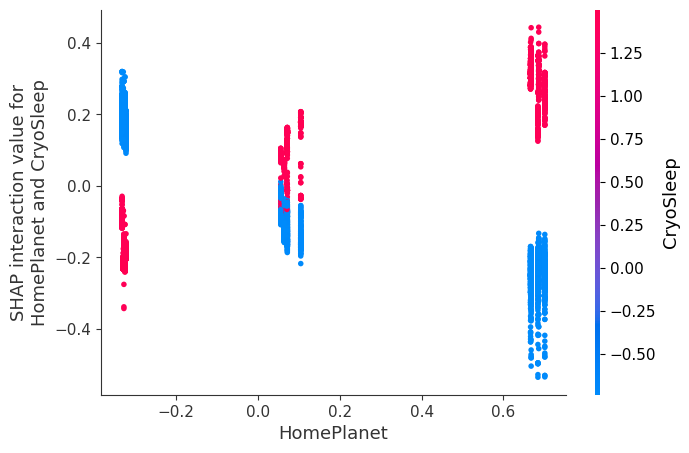

In [102]:
shap.dependence_plot(
    ("HomePlanet", "CryoSleep"),
    base_shap_interaction_WOE, df_train_X_WOE,
    display_features=df_train_X_WOE)

<font size=4>We see from the above interaction plot between HomePlanet and CryoSleep that not cryosleeping even boost the chance of getting transported if someone is from Earth (the leftmost cluster).</font>

In [103]:
shap.dependence_plot(
    ("Consumption_High_End", "Consumption_Basic"),
    base_shap_interaction_WOE, df_train_X_WOE,
    display_features=df_train_X_WOE)

<font size=4>It is interesting to see that spending a lot in Consumption_Basic but little in Consumption_High_End generally also wouldn't hurt you chance of getting transported if the training set is WOE encoded.</font>

<a id="2.3.2.3"></a>
#### **2.3.2.3 CatBoost encoding**

In [104]:
df_train_X_CatBoost = df_train_CatBoost.drop(columns="Transported")

In [105]:
base_fit_kwargs_CatBoost = get_fit_cat_params(CatBoostClassifier.__name__, cat_col_list=get_cat_features(df_train_CatBoost, 'Transported'))

In [106]:
base_model_CatBoost = CatBoostClassifier(**base_params).fit(df_train_X_CatBoost, df_train_Y) 

In [107]:
base_explainer_CatBoost = shap.TreeExplainer(base_model_CatBoost)
base_shap_values_CatBoost = base_explainer_CatBoost(df_train_X_CatBoost)

In [108]:
base_shap_interaction_CatBoost = base_explainer_CatBoost.shap_interaction_values(df_train_X_CatBoost)

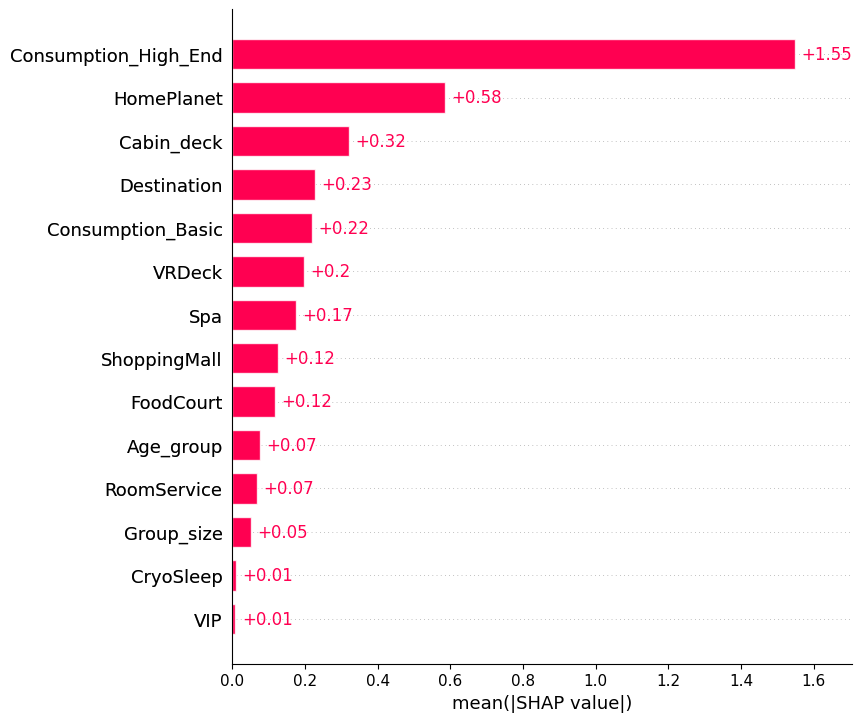

In [109]:
#Mean SHAP
shap.plots.bar(base_shap_values_CatBoost, max_display=24)

<font size=4> From the above mean value plot, we see the features on average contribute the most are Consumption_High_End, HomePlanet, Cabin_deck, Destination Consumption_Basic, VRDeck and Spa. However, CryoSleep has only marginal importance.</font>

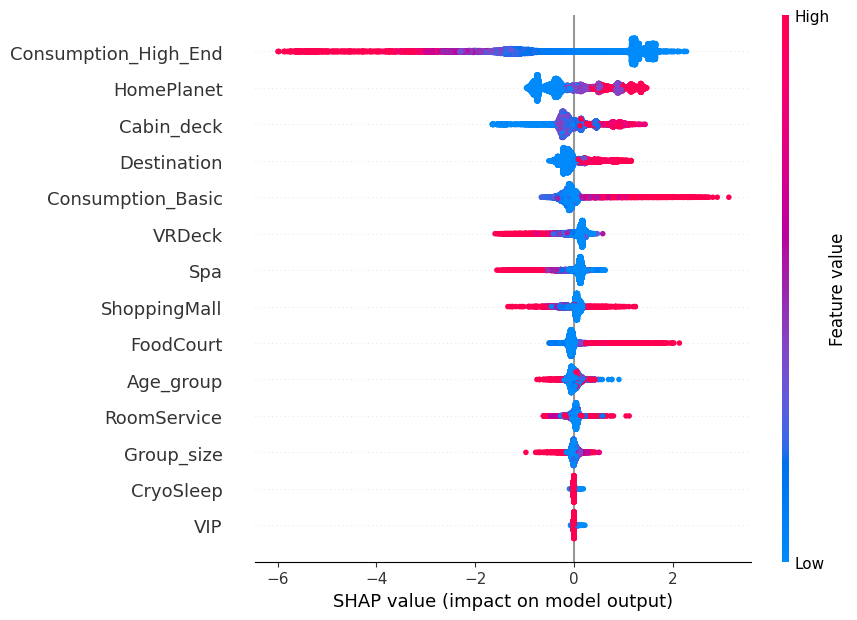

In [110]:
shap.plots.beeswarm(base_shap_values_CatBoost,max_display=32)

<font size=4>Again, from the above beeswarm plot, we see how devastating spending a lot in Consumption_High_End could be. However, we did not realize in our EDA that spendidng a lot in Consumption_Basic can also significantly increase the chance of being transported. HomePlanet, Cabin_deck, Destination, Spa, VRDeck and FoodCourt generally distinct contributions between high and low encoding values. In comparison, Consumption_Total does NOT look like a very powerful indicator, and CryoSleep, Group_size, Age_group and VIP plays an almost non-existent role. </font>

In [111]:
# Get absolute mean of matrices
mean_base_shap_CatBoost = np.abs(base_shap_interaction_CatBoost).mean(0)
df_shap_inter_CatBoost = pd.DataFrame(mean_base_shap_CatBoost,index=df_train_X_CatBoost.columns,columns=df_train_X_CatBoost.columns)

# times off diagonal by 2
df_shap_inter_CatBoost.where(df_shap_inter_CatBoost.values == np.diagonal(df_shap_inter_CatBoost),df_shap_inter_CatBoost.values*2,inplace=True)

# Create a heatmap to visualize the PPScore matrix
fig = px.imshow(df_shap_inter_CatBoost,
                text_auto=True, # Display correlation values in the heatmap cells
                labels=dict(x="Variables", y="Variables", color="SHAP Interaction"),
                x=df_shap_inter_CatBoost.columns, # Set x-axis labels to variable names
                y=df_shap_inter_CatBoost.columns, # Set y-axis labels to variable names
                color_continuous_scale='RdBu_r', # Color scale for correlation values
                title='SHAP Interaction Matrix')

# Update the layout of the color scale to center on zero
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Correlation',
        ticks='outside',
        tickvals=[-1, -0.5, 0, 0.5, 1],
        ticktext=['-1', '-0.5', '0', '0.5', '1']
    ),
    width=1800,  # Width of the figure in pixels
    height=1200,  # Height of the figure in pixels
    autosize=False  # Disable autosizing to use specified width and height
)

# Show the plot
fig.show()

<font size=4>We see from the above interaction value metric that Consumption_High_End is deservedly the strongest predictor, it pitches in a great deal even just on its own. Also, we see HomePlanet and Cabin_deck become stronger predictores. Clearly, HomePlanet and Consumption_High_End has strong interaction, probably due to people from Europa had stronger buying power.</font>

<a id="2.3.2.4"></a>
#### **2.3.2.4 MEstimator encoding**

In [112]:
df_train_X_MEstimate = df_train_MEstimate.drop(columns="Transported")

In [113]:
base_fit_kwargs_MEstimate = get_fit_cat_params(CatBoostClassifier.__name__, cat_col_list=get_cat_features(df_train_MEstimate, 'Transported'))

In [114]:
base_model_MEstimate = CatBoostClassifier(**base_params).fit(df_train_X_MEstimate, df_train_Y) 

In [115]:
base_explainer_MEstimate = shap.TreeExplainer(base_model_MEstimate)
base_shap_values_MEstimate = base_explainer_MEstimate(df_train_X_MEstimate)

In [116]:
base_shap_interaction_MEstimate = base_explainer_MEstimate.shap_interaction_values(df_train_X_MEstimate)

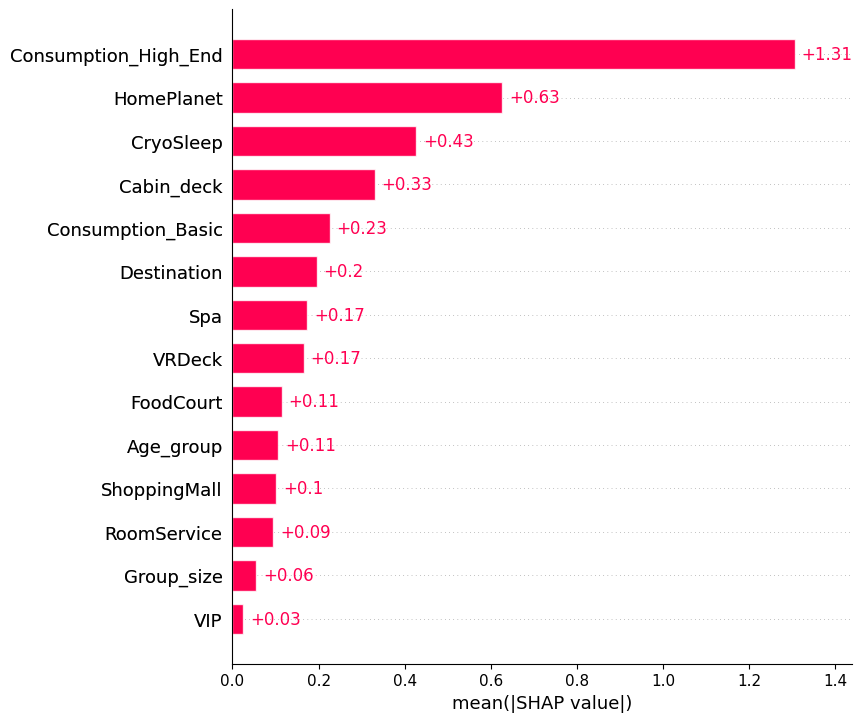

In [117]:
#Mean SHAP
shap.plots.bar(base_shap_values_MEstimate, max_display=24)

<font size=4> From the above mean value plot, we see the features on average contribute the most are Consumption_High_End, HomePlanet, Cabin_deck, CryoSleep, Consumption_Total, Consumption_Basic, VRDeck and Destination.</font>

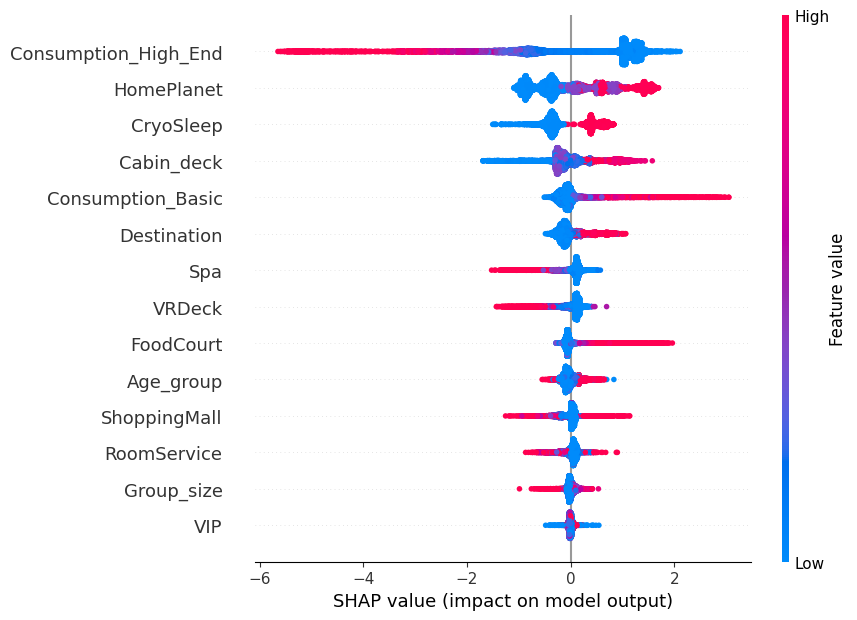

In [118]:
shap.plots.beeswarm(base_shap_values_MEstimate,max_display=32)

<font size=4>Again, from the above beeswarm plot, we see how devastating spending a lot in Consumption_High_End could be. However, we did not realize in our EDA that spendidng a lot in Consumption_Basic can also significantly increase the chance of being transported. HomePlanet, CryoSleep, Cabin_deck, Destination, Spa, VRDeck and FoodCourt generally distinct contributions between high and low encoding values. In comparison, Consumption_Total does NOT look like a very powerful indicator, and Group_size, Age_group and VIP plays an almost non-existent role. </font>

In [119]:
# Get absolute mean of matrices
mean_base_shap_MEstimate = np.abs(base_shap_interaction_MEstimate).mean(0)
df_shap_inter_MEstimate = pd.DataFrame(mean_base_shap_MEstimate,index=df_train_X_MEstimate.columns,columns=df_train_X_MEstimate.columns)

# times off diagonal by 2
df_shap_inter_MEstimate.where(df_shap_inter_MEstimate.values == np.diagonal(df_shap_inter_MEstimate),df_shap_inter_MEstimate.values*2,inplace=True)

# Create a heatmap to visualize the PPScore matrix
fig = px.imshow(df_shap_inter_MEstimate,
                text_auto=True, # Display correlation values in the heatmap cells
                labels=dict(x="Variables", y="Variables", color="SHAP Interaction"),
                x=df_shap_inter_MEstimate.columns, # Set x-axis labels to variable names
                y=df_shap_inter_MEstimate.columns, # Set y-axis labels to variable names
                color_continuous_scale='RdBu_r', # Color scale for correlation values
                title='SHAP Interaction Matrix')

# Update the layout of the color scale to center on zero
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Correlation',
        ticks='outside',
        tickvals=[-1, -0.5, 0, 0.5, 1],
        ticktext=['-1', '-0.5', '0', '0.5', '1']
    ),
    width=1800,  # Width of the figure in pixels
    height=1200,  # Height of the figure in pixels
    autosize=False  # Disable autosizing to use specified width and height
)

# Show the plot
fig.show()

<font size=4>We see from the above interaction value metric that Consumption_High_End is deservedly the strongest predictor, it pitches in a great deal even just on its own.  Also, we see HomePlanet and CryoSleep become stronger predictores. Clearly, HomePlanet and Consumption_High_End has strong interaction, probably due to people from Europa had stronger buying power.</font>

<a id="2.3.2.5"></a>
#### **2.3.2.5 Mixed One-Hot and CatBoost encoding**

In [120]:
df_train_X_CatBoost_Mixed = df_train_CatBoost_Mixed.drop(columns="Transported")

In [121]:
base_fit_kwargs_CatBoost_Mixed = get_fit_cat_params(CatBoostClassifier.__name__, cat_col_list=get_cat_features(df_train_CatBoost_Mixed, 'Transported'))

In [122]:
base_model_CatBoost_Mixed = CatBoostClassifier(**base_params).fit(df_train_X_CatBoost_Mixed, df_train_Y, **base_fit_kwargs_CatBoost_Mixed) 

In [123]:
base_explainer_CatBoost_Mixed = shap.TreeExplainer(base_model_CatBoost_Mixed)
base_shap_values_CatBoost_Mixed = base_explainer_CatBoost_Mixed(df_train_X_CatBoost_Mixed)

In [124]:
base_shap_interaction_CatBoost_Mixed = base_explainer_CatBoost_Mixed.shap_interaction_values(df_train_X_CatBoost_Mixed)

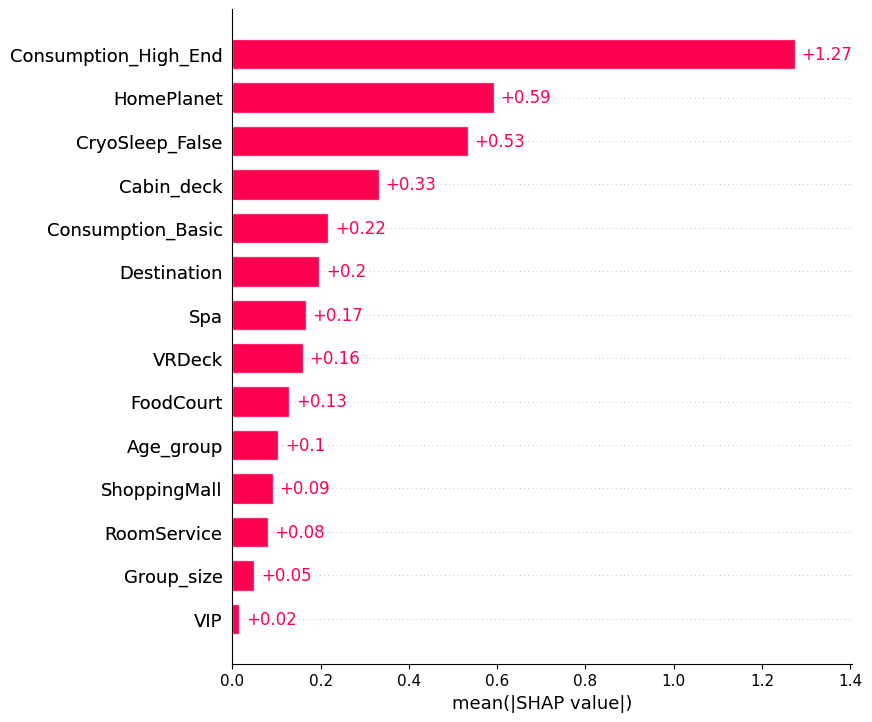

In [125]:
#Mean SHAP
shap.plots.bar(base_shap_values_CatBoost_Mixed, max_display=24)

<font size=4> From the above mean value plot, we see the features on average contribute the most are Consumption_High_End, HomePlanet, Cabin_deck, CryoSleep_False, Consumption_Basic, VRDeck, Spa and Destination.</font>

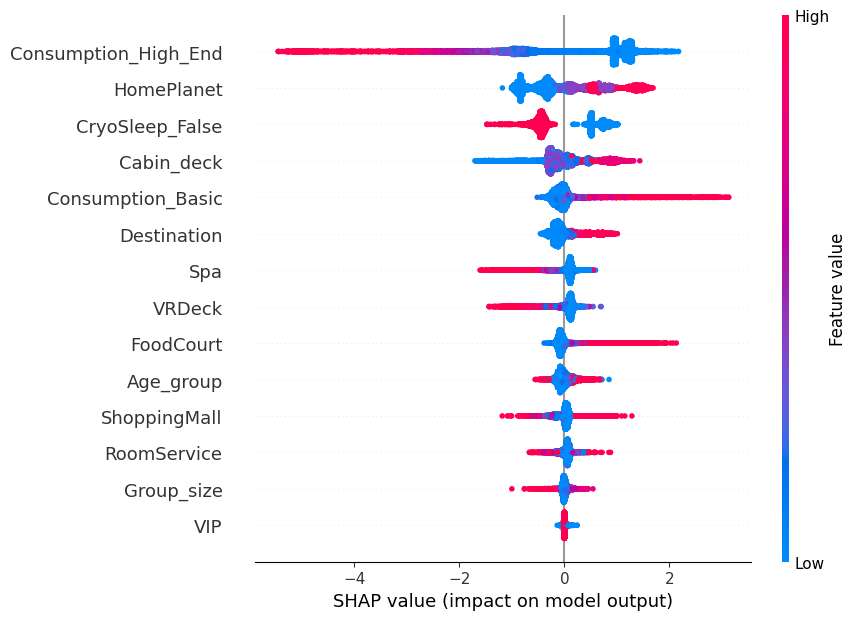

In [126]:
shap.plots.beeswarm(base_shap_values_CatBoost_Mixed,max_display=16)

<font size=4>Again, from the above beeswarm plot, we see how devastating spending a lot in Consumption_High_End could be. However, we did not realize in our EDA that spendidng a lot in Consumption_Basic can also significantly increase the chance of being transported. Here, unlike the result from pure CatBoost encoding, CryoSleep_False gives really clear-cut and noticeable results.</font>

<a id="2.3.3"></a>
### 2.3.3 **Modified RFECV with SHAP values**

<font size=4>Instead of deploying conventional RFE eliminating features of low feature importance calculated by the procedures embedded in a model, we use SHAP values to measure the error contributions by every features in the cross-validated training phase.</font>

<a id="2.3.3.0"></a>
#### **2.3.3.0 SHAP values for CV tree models: class definition**

In [127]:
def get_feature_contributions(y_true, y_pred, shap_values):
    """Compute prediction contribution and error contribution for each feature."""
    # Prediction contribution based on mean absolute SHAP values
    prediction_contribution = shap_values.abs().mean().rename("prediction_contribution")

    # Compute absolute errors
    abs_error = (y_true - y_pred).abs()

    # Calculate predictions without each feature
    y_pred_wo_feature = y_pred.values.reshape(-1, 1) - shap_values
    abs_error_wo_feature = (y_true.values.reshape(-1, 1) - y_pred_wo_feature).abs()

    # Calculate error reduction when the feature is removed
    error_contribution = (abs_error.values.reshape(-1, 1) - abs_error_wo_feature).mean(axis=0).rename("error_contribution")

    return pd.Series(prediction_contribution), pd.Series(error_contribution)

In [128]:
class shap_tree_cv():
    """
    A class designed to compute SHAP values for machine learning models trained with cross-validation
    specifically for tree-based models. It also calculates mean absolute error (MAE) and provides visualization
    for the contributions of each feature towards predictions and errors.

    Attributes:
        trained_cv (cv_training): An instance of the cv_training class containing trained estimators.
        shap_explainers (list): A list of SHAP explainer objects for each fold.
        contributions (list): A list of dataframes with contributions for predictions and errors for each fold.
        MAEs (list): A list of mean absolute errors computed for each fold.

    Args:
        trained_cv (cv_training): A pre-trained cv_training instance containing tree-based estimators.
    """
    def __init__(self, trained_cv: cv_training):
        
        self.trained_cv = trained_cv
        self.shap_explainers = []
        self.contributions = []
        self.MAEs = []
    def get_MAE_and_contrib(self, df: pd.DataFrame):
        """
        Computes the Mean Absolute Error (MAE) and SHAP values for the features used in the trained models
        against a provided dataframe. The dataframe must contain the same features and the label as the one
        used for training the models in trained_cv.

        Args:
            df (pd.DataFrame): The dataframe containing the same structure (features and label) as used in training.

        Returns:
            float: The average MAE across all folds.
            pd.DataFrame: The mean of the contributions of predictions and errors for all features across all folds.

        Raises:
            ValueError: If the input dataframe does not contain the same features or the target label as the training dataframe.
        """
        
        # Check if the imput dataframe has the same features and label as the dataframe trained_cv was trained on 
        if self.trained_cv.label not in df.columns:
            raise ValueError(f"Error: The target column '{self.trained_cv.label}' is missing.")
        if set(self.trained_cv.features) != set(feature for feature in df.columns if feature != self.trained_cv.label):
            raise ValueError("Error: The imput dataframe do NOT have the same features as trained_cv was trained on.")
            
        X = df[self.trained_cv.features]
        Y = df[self.trained_cv.label]
        
        for i_fold, (_, val_index) in enumerate(self.trained_cv.cv.split(X, Y)):
            X_val, y_val = X.iloc[val_index], Y.iloc[val_index]
            estimator = self.trained_cv.estimators[i_fold]
            y_pred = pd.Series(estimator.predict(X_val, **self.trained_cv.predict_kwargs), index = X_val.index)
            
            # Get shap values for each training fold
            logging.info(f"Starting acquiring shap values for fold {i_fold+1}")
            print(f"Starting acquiring shap values for fold {i_fold+1}")
            shap_explainer = TreeExplainer(estimator)
            self.shap_explainers.append(shap_explainer)
            shaps = pd.DataFrame(data=shap_explainer.shap_values(X_val), index=X_val.index, columns=self.trained_cv.features)
            logging.info(f"Finished acquiring shap values for fold {i_fold+1}")
            print(f"Finished acquiring shap values for fold {i_fold+1}")

            # Get the MAE, and then get the both prediction and error contributions for each feature in each training fold
            MAE = mean_absolute_error(y_val, y_pred)
            self.MAEs.append(MAE)
            prediction_contribution, error_contribution = get_feature_contributions(y_val, y_pred, shaps)
            contributions_df = pd.concat([prediction_contribution, error_contribution], axis=1)
            # Create a DataFrame with 'fold' as an additional column
            contributions_df['fold'] = i_fold  # Tag each row with the fold number
            contributions_df.set_index('fold', append=True, inplace=True)  # Append fold to the existing index

            self.contributions.append(contributions_df)

        # Concatenate all contributions with a MultiIndex containing both feature name and fold number
        aggregated_contributions = pd.concat(self.contributions)

        # Calculate mean and median across all folds for each feature
        mean_contributions = aggregated_contributions.groupby(level=0).mean()  # Group by feature level
        median_contributions = aggregated_contributions.groupby(level=0).median()  # Group by feature level

        # Create final contributions DataFrame where we make the metric more robust by always picking the worse between the mean and the median across folds
        final_contributions = pd.DataFrame({
            'prediction_contribution': np.minimum(mean_contributions['prediction_contribution'], median_contributions['prediction_contribution']),
            'error_contribution': np.maximum(mean_contributions['error_contribution'], median_contributions['error_contribution'])
        })

        return np.max([np.mean(self.MAEs), np.median(self.MAEs)]), final_contributions

    def plot_contributions(self) -> None:
        """
        Generates scatter plots of the contributions of each feature towards the predictions and errors.
        Each plot corresponds to a different fold from the cross-validation training. The method checks if
        contributions are available before plotting.

        Raises:
            ValueError: If contributions have not been calculated before calling this method.
        """
        if not self.contributions:
            raise ValueError("Please first calculate the contributions using get_contributions method!")
        for i_fold in range(0, self.trained_cv.n_splits):
            # Create the scatter plot using Plotly Express
            fig = px.scatter(self.contributions[i_fold].droplevel('fold'), 
                             x='prediction_contribution', 
                             y='error_contribution', 
                             text = self.contributions[i_fold].droplevel('fold').index,
                             title=f'Training fold {i_fold}',
                             labels={'prediction_contribution': 'Prediction Contribution', 'error_contribution': 'Error Contribution'},
                             width=1200, height=800)

            # Adding a horizontal line at y=0
            fig.add_hline(y=0, line_dash="dash", line_color="black")

            # Customize the plot layout
            fig.update_layout(
                xaxis_title="Prediction Contribution",
                yaxis_title="Error Contribution",
                title_font_size=16,
                font_size=12,
                xaxis_rangeslider_visible=True  # Optional: add a range slider for the x-axis
            )

            # Show the plot
            fig.show()            

In [129]:
import plotly.graph_objects as go

def plot_RFE(rfe_prediction, rfe_error, max_iter_show):
    idxmin_prediction = rfe_prediction["mae"].idxmin()
    idxmin_error = rfe_error["mae"].idxmin()

    fig = go.Figure()

        # Adding line plots
    fig.add_trace(go.Scatter(
        x=-rfe_prediction.head(max_iter_show)["n_features"],
        y=rfe_prediction.head(max_iter_show)["mae"],
        mode='lines',
        line=dict(color="blue", width=3),
        name="RFE - Prediction\nContribution"
        ))

    fig.add_trace(go.Scatter(
        x=-rfe_error.head(max_iter_show)["n_features"],
        y=rfe_error.head(max_iter_show)["mae"],
        mode='lines',
        line=dict(color="orange", width=3),
        name="RFE - Error\nContribution"
        ))

    # Adding scatter points for min values
    fig.add_trace(go.Scatter(
        x=[-rfe_prediction.loc[idxmin_prediction, "n_features"]],
        y=[rfe_prediction.loc[idxmin_prediction, "mae"]],
        mode='markers',
        marker=dict(color='red', size=12, line=dict(color='red', width=3)),
        showlegend=False
        ))

    fig.add_trace(go.Scatter(
        x=[-rfe_error.loc[idxmin_error, "n_features"]],
        y=[rfe_error.loc[idxmin_error, "mae"]],
        mode='markers',
        marker=dict(color='red', size=12, line=dict(color='red', width=3)),
        showlegend=False
        ))

    # Setting titles and labels
    fig.update_layout(
        title="Validation sets averaged over all CV folds",
        xaxis_title="n_Features",
        yaxis_title="Mean Absolute Error",
        legend=dict(x=1.05, y=0.5, bgcolor='rgba(255, 255, 255, 0.5)', bordercolor='rgba(0, 0, 0, 0.1)'),
        font=dict(size=12),
        plot_bgcolor='rgba(0, 0, 0, 0)',  # Setting plot background to transparent
        xaxis=dict(
            tickmode='array',
            tickvals=rfe_prediction.head(max_iter_show)["n_features"],
            ticktext=[-int(x) for x in rfe_prediction.head(max_iter_show)["n_features"]]
            )
        )

    # Adding grid lines manually since Plotly's grid is on by default
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

    # Show the plot
    fig.show()

<a id="2.3.3.1"></a>
####  2.3.3.1 **RFECV based on MAE contribution by features exploiting SHAP: class definition**

In [130]:
class rfe_shap_cv:
    """
    This class implements Recursive Feature Elimination (RFE) using SHAP values to guide the feature elimination
    process. It integrates cross-validated model training and computes SHAP values to determine the least
    important features which are subsequently dropped in each iteration until a specified number of features remains.

    Attributes:
        contribution (str): Specifies whether 'error_contribution' or 'prediction_contribution' is used to 
                            evaluate feature importance.
        n_feat_final (int): The final number of features to retain.
        rfe_record (pd.DataFrame): Records the metrics and features eliminated in each iteration of RFE.

    Args:
        contribution (str): Specifies the type of SHAP value contribution to use for RFE ('Error' for error_contribution 
                            and anything else defaults to prediction_contribution).
        n_feat_final (int): The desired number of features to retain after the elimination process.
    """

    def __init__(self, contribution: str = "Error", n_feat_final: int = 1):
        self.contribution = "error_contribution" if contribution=="Error" else "prediction_contribution" 
        self.n_feat_final = n_feat_final
        self.rfe_record = pd.DataFrame(dtype=float)
        
    def RFE(self, df: pd.DataFrame, label: str = None, cv_trainer_params: dict = {}, fit_kwargs: dict = {}, predict_kwargs: dict = {}, metric_list: list[str] = [], metric_opt_dir_list: list[str] = [], metric_kwargs: dict = {}):
        """
        Executes the Recursive Feature Elimination (RFE) process using cross-validated training and SHAP value analysis.

        Args:
            df (pd.DataFrame): The dataframe containing the features and label for model training.
            label (str): The name of the label column in the dataframe.
            cv_trainer_params (dict): Parameters to initialize the cv_training class.
            fit_kwargs (dict): Keyword arguments for the fit method of the model.
            predict_kwargs (dict): Keyword arguments for the predict method of the model.
            metric_list (list[str]): List of metrics to evaluate during model training.
            metric_opt_dir_list (list[str]): List specifying the direction ('min' or 'max') for each metric's optimization.
            metric_kwargs (dict): Additional keyword arguments for metric computations.

        Returns:
            pd.DataFrame: A dataframe containing the record of number of features, MAE, worst contributor, and the feature 
                          dropped in each iteration of the RFE process.

        Raises:
            ValueError: If the label is not provided or the dataframe does not contain the necessary structure.
        """
        if not label:
            raise ValueError("Error: Please first input the label before starting RFE.")
            
        # First, we get the features and the label of the dataset
        self.label = label 
        self.features = [feature for feature in df.columns if feature != self.label]
        features_curr = self.features
        # Then, we start RFE process with cv
        for iteration in tqdm(range(len(self.features) - self.n_feat_final + 1)):
            print("%"*100)
            logging.info(f"Starting to eliminate feature number {iteration+1}")
            print(f"Starting to eliminate feature number {iteration+1}")
            print("%"*100)
            # First, we initialize the cv_trainer and fit it with the subset of the dataset with the remaining best features
            cv_trainer = cv_training(**cv_trainer_params)
            df_curr = df[features_curr + [self.label]]
            fit_kwargs_curr =  {**get_fit_cat_params(cv_trainer.estimator.__name__, cat_col_list=get_cat_features(df_curr, self.label)), **fit_kwargs}
            
            cv_trainer.fit(df_curr, self.label, fit_kwargs=fit_kwargs_curr, predict_kwargs=predict_kwargs, metric_list=metric_list, metric_opt_dir_list=metric_opt_dir_list, metric_kwargs=metric_kwargs) 
            # Then, we initialize the shap_tree_cv and get the contributions of each feature in each cv fold
            shap_cv = shap_tree_cv(trained_cv = cv_trainer)
            MAE, shap_cv_contributions = shap_cv.get_MAE_and_contrib(df_curr)
            
            # We drop the worst feature, i.e. the feature with the smallest prediction contribution or the biggest error contribution and then record the contributions in this iteration
            self.rfe_record.loc[iteration, "n_features"] = len(features_curr)
            self.rfe_record.loc[iteration, "mae"] = MAE
            if self.contribution=="error_contribution":
                self.rfe_record.loc[iteration, "worst_contrib"] = shap_cv_contributions[self.contribution].max()
                feature_drop = shap_cv_contributions[self.contribution].idxmax()
            else:
                self.rfe_record.loc[iteration, "worst_contrib"] = shap_cv_contributions[self.contribution].min()
                feature_drop = shap_cv_contributions[self.contribution].idxmin()

            self.rfe_record.loc[iteration, "feature_drop"] = feature_drop
            features_curr.remove(feature_drop) 
            print("%"*100)
            logging.info(f"Eliminated feature number {iteration+1}: {feature_drop}")
            print(f"Eliminated feature number {iteration+1}: {feature_drop}")
            print("%"*100)
        
        return self.rfe_record

<a id="2.3.3.2"></a>
#### 2.3.3.2 **No encoding**

In [131]:
rfe_shape_cv_pred = rfe_shap_cv(contribution="Prediction")
rfe_record_pred = rfe_shape_cv_pred.RFE(df_train, label="Transported", cv_trainer_params={'estimator':CatBoostClassifier, 'params':base_params}, 
                                        metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

  0%|                                                                                                                                                                                   | 0/14 [00:00<?, ?it/s]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds fo

  7%|████████████▏                                                                                                                                                             | 1/14 [03:50<49:58, 230.66s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 1: VIP
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 14%|████████████████████████▎                                                                                                                                                 | 2/14 [07:33<45:14, 226.25s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 2: Group_size
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 3
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Co

 21%|████████████████████████████████████▍                                                                                                                                     | 3/14 [11:18<41:21, 225.57s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 3: RoomService
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 29%|████████████████████████████████████████████████▌                                                                                                                         | 4/14 [14:52<36:49, 220.96s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 4: Age_group
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 36%|████████████████████████████████████████████████████████████▋                                                                                                             | 5/14 [18:25<32:44, 218.24s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 5: ShoppingMall
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 6
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 43%|████████████████████████████████████████████████████████████████████████▊                                                                                                 | 6/14 [21:48<28:23, 212.89s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 6: FoodCourt
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 7
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 50%|█████████████████████████████████████████████████████████████████████████████████████                                                                                     | 7/14 [25:30<25:11, 215.95s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 7: Spa
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 8
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 8/14 [28:23<20:13, 202.26s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 8: VRDeck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 9
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Comple

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 9/14 [31:00<15:40, 188.18s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 9: CryoSleep
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Co

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 10/14 [33:24<11:38, 174.58s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 10: Destination
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 11
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 11/14 [35:44<08:11, 163.73s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 11: Cabin_deck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 12
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 12/14 [41:04<07:02, 211.29s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 12: Consumption_Basic
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 13
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for 

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 13/14 [42:45<02:57, 177.99s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 13: HomePlanet
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 14
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [43:50<00:00, 187.90s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 14: Consumption_High_End
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [132]:
rfe_shape_cv_error = rfe_shap_cv(contribution="Error")
rfe_record_error = rfe_shape_cv_error.RFE(df_train, label="Transported", cv_trainer_params={'estimator':CatBoostClassifier, 'params':base_params},
                                          metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

  0%|                                                                                                                                                                                                                        | 0/14 [00:00<?, ?it/s]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds fo

  7%|██████████████▊                                                                                                                                                                                                | 1/14 [02:19<30:18, 139.87s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 1: VIP
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 14%|█████████████████████████████▌                                                                                                                                                                                 | 2/14 [04:36<27:34, 137.86s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 2: Group_size
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 3
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Co

 21%|████████████████████████████████████████████▎                                                                                                                                                                  | 3/14 [06:55<25:23, 138.54s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 3: RoomService
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 29%|███████████████████████████████████████████████████████████▏                                                                                                                                                   | 4/14 [13:40<40:37, 243.71s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 4: ShoppingMall
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 36%|█████████████████████████████████████████████████████████████████████████▉                                                                                                                                     | 5/14 [17:07<34:33, 230.41s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 5: FoodCourt
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 6
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 43%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                      | 6/14 [19:58<28:01, 210.14s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 6: Age_group
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 7
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                       | 7/14 [24:17<26:23, 226.20s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 7: VRDeck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 8
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Comple

 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 8/14 [28:41<23:50, 238.36s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 8: Spa
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 9
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 9/14 [30:46<16:54, 202.93s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 9: CryoSleep
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Co

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 10/14 [32:55<12:00, 180.05s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 10: Destination
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 11
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 11/14 [35:10<08:18, 166.13s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 11: Cabin_deck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 12
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 12/14 [37:10<05:04, 152.12s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 12: Consumption_Basic
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 13
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for 

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 13/14 [39:09<02:22, 142.19s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 13: HomePlanet
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 14
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [40:34<00:00, 173.88s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 14: Consumption_High_End
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [133]:
rfe_record_pred

n_features       mae  worst_contrib          feature_drop
0         14.0  0.200465       0.004793                   VIP
1         13.0  0.202079       0.036052            Group_size
2         12.0  0.202656       0.056849           RoomService
3         11.0  0.202079       0.078873             Age_group
4         10.0  0.199769       0.094984          ShoppingMall
5          9.0  0.202195       0.084512             FoodCourt
6          8.0  0.199307       0.196322                   Spa
7          7.0  0.196996       0.165349                VRDeck
8          6.0  0.197572       0.223091             CryoSleep
9          5.0  0.197460       0.239336           Destination
10         4.0  0.199446       0.316919            Cabin_deck
11         3.0  0.205662       0.379038     Consumption_Basic
12         2.0  0.211894       0.849734            HomePlanet
13         1.0  0.226585       1.403119  Consumption_High_End

In [134]:
rfe_record_error

n_features       mae  worst_contrib          feature_drop
0         14.0  0.200465      -0.003986                   VIP
1         13.0  0.202079      -0.027009            Group_size
2         12.0  0.202656      -0.043024           RoomService
3         11.0  0.202079      -0.065647          ShoppingMall
4         10.0  0.198728      -0.053406             FoodCourt
5          9.0  0.198614      -0.068754             Age_group
6          8.0  0.199307      -0.152405                VRDeck
7          7.0  0.201501      -0.124929                   Spa
8          6.0  0.197572      -0.165932             CryoSleep
9          5.0  0.197460      -0.200759           Destination
10         4.0  0.199446      -0.268298            Cabin_deck
11         3.0  0.205662      -0.319094     Consumption_Basic
12         2.0  0.211894      -0.745007            HomePlanet
13         1.0  0.226585      -1.019335  Consumption_High_End

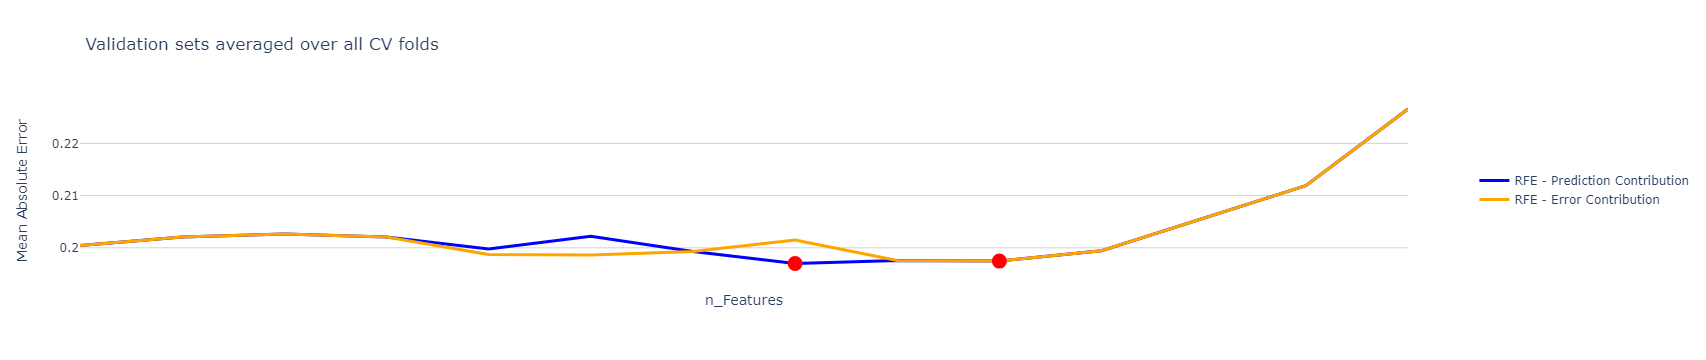

In [135]:
max_iter_show = len(rfe_record_pred)
plot_RFE(rfe_record_pred, rfe_record_error, max_iter_show)

<font size=4>We can see from the interactive plot above that we can get the result with the minimum MAE during RFECV if we keep only 5 features: "Consumption_High_End", "HomePlanet", "Consumption_Basic", "Cabin_deck" and "Destination"  and the final accuracy improved from 0.799535436329413 to 0.802540415704388 after the elimination of 9 features.</font>

<a id="2.3.3.3"></a>
#### 2.3.3.3 **WOE encoding**

In [136]:
rfe_shape_cv_pred_WOE = rfe_shap_cv(contribution="Prediction")
rfe_record_pred_WOE = rfe_shape_cv_pred_WOE.RFE(df_train_WOE, label="Transported", cv_trainer_params={'estimator':CatBoostClassifier, 'params':base_params},  
                                        metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

  0%|                                                                                                                                                                                                                        | 0/14 [00:00<?, ?it/s]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds fo

  7%|██████████████▊                                                                                                                                                                                                | 1/14 [01:44<22:39, 104.56s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 1: VIP
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 14%|█████████████████████████████▌                                                                                                                                                                                 | 2/14 [03:28<20:50, 104.17s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 2: Group_size
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 3
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Co

 21%|████████████████████████████████████████████▎                                                                                                                                                                  | 3/14 [05:31<20:40, 112.75s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 3: RoomService
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 29%|███████████████████████████████████████████████████████████▏                                                                                                                                                   | 4/14 [07:37<19:38, 117.90s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 4: Age_group
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 36%|█████████████████████████████████████████████████████████████████████████▉                                                                                                                                     | 5/14 [09:46<18:18, 122.10s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 5: ShoppingMall
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 6
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 43%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                      | 6/14 [11:33<15:35, 116.90s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 6: FoodCourt
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 7
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                       | 7/14 [13:26<13:28, 115.52s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 7: VRDeck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 8
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Comple

 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 8/14 [15:07<11:05, 110.94s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 8: Spa
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 9
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 9/14 [16:46<08:55, 107.10s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 9: Destination
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 10/14 [18:15<06:46, 101.53s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 10: Cabin_deck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 11
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 11/14 [19:42<04:52, 97.36s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 11: Consumption_Basic
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 12
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for 

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 12/14 [21:16<03:12, 96.22s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 12: CryoSleep
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 13
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 13/14 [22:46<01:34, 94.31s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 13: HomePlanet
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 14
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [24:07<00:00, 103.36s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 14: Consumption_High_End
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [137]:
rfe_shape_cv_error_WOE = rfe_shap_cv(contribution="Error")
rfe_record_error_WOE = rfe_shape_cv_error_WOE.RFE(df_train_WOE, label="Transported", cv_trainer_params={'estimator':CatBoostClassifier, 'params':base_params}, 
                                          metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

  0%|                                                                                                                                                                                                                        | 0/14 [00:00<?, ?it/s]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds fo

  7%|██████████████▊                                                                                                                                                                                                 | 1/14 [01:26<18:38, 86.02s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 1: VIP
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 14%|█████████████████████████████▋                                                                                                                                                                                  | 2/14 [02:54<17:27, 87.28s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 2: Group_size
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 3
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Co

 21%|████████████████████████████████████████████▌                                                                                                                                                                   | 3/14 [04:24<16:15, 88.72s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 3: RoomService
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 29%|███████████████████████████████████████████████████████████▍                                                                                                                                                    | 4/14 [05:59<15:12, 91.24s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 4: Age_group
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 36%|██████████████████████████████████████████████████████████████████████████▎                                                                                                                                     | 5/14 [07:34<13:52, 92.54s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 5: ShoppingMall
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 6
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 43%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                      | 6/14 [09:14<12:40, 95.11s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 6: FoodCourt
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 7
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                        | 7/14 [10:44<10:52, 93.24s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 7: VRDeck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 8
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Comple

 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 8/14 [12:27<09:38, 96.42s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 8: Spa
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 9
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 9/14 [13:57<07:52, 94.41s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 9: Destination
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 10/14 [15:35<06:22, 95.74s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 10: CryoSleep
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 11
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 11/14 [17:06<04:42, 94.10s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 11: Cabin_deck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 12
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 12/14 [18:30<03:02, 91.14s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 12: Consumption_Basic
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 13
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for 

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 13/14 [20:14<01:34, 94.97s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 13: HomePlanet
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 14
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [21:49<00:00, 93.54s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 14: Consumption_High_End
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [138]:
rfe_record_pred_WOE

n_features       mae  worst_contrib          feature_drop
0         14.0  0.199885       0.026078                   VIP
1         13.0  0.202773       0.052962            Group_size
2         12.0  0.201501       0.092449           RoomService
3         11.0  0.202079       0.102934             Age_group
4         10.0  0.200346       0.119934          ShoppingMall
5          9.0  0.199678       0.108139             FoodCourt
6          8.0  0.199216       0.209992                VRDeck
7          7.0  0.202773       0.211341                   Spa
8          6.0  0.199769       0.226706           Destination
9          5.0  0.201756       0.358804            Cabin_deck
10         4.0  0.206239       0.402543     Consumption_Basic
11         3.0  0.211894       0.489824             CryoSleep
12         2.0  0.211894       0.874764            HomePlanet
13         1.0  0.226585       1.403119  Consumption_High_End

In [139]:
rfe_record_error_WOE

n_features       mae  worst_contrib          feature_drop
0         14.0  0.199885      -0.020323                   VIP
1         13.0  0.202773      -0.038956            Group_size
2         12.0  0.201501      -0.070632           RoomService
3         11.0  0.202079      -0.080846             Age_group
4         10.0  0.200346      -0.085950          ShoppingMall
5          9.0  0.199678      -0.084758             FoodCourt
6          8.0  0.199216      -0.159050                VRDeck
7          7.0  0.202773      -0.162276                   Spa
8          6.0  0.199769      -0.187453           Destination
9          5.0  0.201756      -0.304876             CryoSleep
10         4.0  0.200346      -0.307068            Cabin_deck
11         3.0  0.207852      -0.340140     Consumption_Basic
12         2.0  0.211894      -0.765672            HomePlanet
13         1.0  0.226585      -1.019335  Consumption_High_End

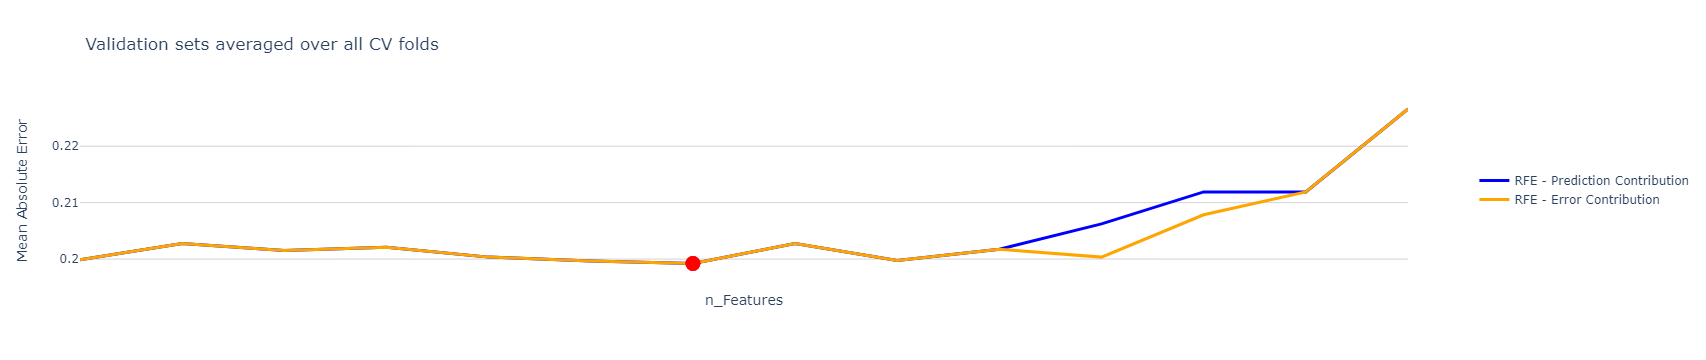

In [140]:
max_iter_show_WOE = len(rfe_record_pred_WOE)
plot_RFE(rfe_record_pred_WOE, rfe_record_error_WOE, max_iter_show_WOE)

<font size=4>We can see from the interactive plot above that we can get the result with the minimum MAE during RFECV if we keep 9 features by dropping "VIP", "Age_group", "RoomService", "Group_size" , "ShoppingMall" and "FoodCourt", and the final accuracy improved from 0.800323325635104 to 0.8042490221468717 after the elimination of those 6 features.</font>

<a id="2.3.3.4"></a>
#### 2.3.3.4 **CatBoost encoding**

In [141]:
rfe_shape_cv_pred_CatBoost = rfe_shap_cv(contribution="Prediction")
rfe_record_pred_CatBoost = rfe_shape_cv_pred_CatBoost.RFE(df_train_CatBoost, label="Transported", cv_trainer_params={'estimator':CatBoostClassifier, 'params':base_params},  
                                        metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

  0%|                                                                                                                                                                                                                        | 0/14 [00:00<?, ?it/s]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds fo

  7%|██████████████▊                                                                                                                                                                                                | 1/14 [02:03<26:50, 123.86s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 1: CryoSleep
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 14%|█████████████████████████████▌                                                                                                                                                                                 | 2/14 [04:22<26:29, 132.49s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 2: VIP
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 3
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 21%|████████████████████████████████████████████▎                                                                                                                                                                  | 3/14 [05:42<19:54, 108.63s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 3: Group_size
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Co

 29%|███████████████████████████████████████████████████████████▏                                                                                                                                                   | 4/14 [07:16<17:07, 102.74s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 4: Age_group
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 36%|██████████████████████████████████████████████████████████████████████████▎                                                                                                                                     | 5/14 [08:37<14:15, 95.02s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 5: RoomService
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 6
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 43%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                      | 6/14 [10:11<12:36, 94.56s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 6: FoodCourt
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 7
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                       | 7/14 [12:27<12:38, 108.30s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 7: ShoppingMall
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 8
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 8/14 [14:37<11:30, 115.11s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 8: VRDeck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 9
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Comple

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 9/14 [16:56<10:12, 122.43s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 9: Spa
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Complete

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 10/14 [19:02<08:14, 123.74s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 10: Destination
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 11
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 11/14 [21:21<06:25, 128.39s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 11: Cabin_deck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 12
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 12/14 [23:39<04:22, 131.35s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 12: Consumption_Basic
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 13
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for 

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 13/14 [25:44<02:09, 129.29s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 13: HomePlanet
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 14
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [27:48<00:00, 119.19s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 14: Consumption_High_End
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [142]:
rfe_shape_cv_error_CatBoost = rfe_shap_cv(contribution="Error")
rfe_record_error_CatBoost = rfe_shape_cv_error_CatBoost.RFE(df_train_CatBoost, label="Transported", cv_trainer_params={'estimator':CatBoostClassifier, 'params':base_params}, 
                                          metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

  0%|                                                                                                                                                                                                                        | 0/14 [00:00<?, ?it/s]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds fo

  7%|██████████████▊                                                                                                                                                                                                | 1/14 [02:22<30:58, 142.98s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 1: CryoSleep
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 14%|█████████████████████████████▌                                                                                                                                                                                 | 2/14 [04:45<28:30, 142.52s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 2: VIP
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 3
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 21%|████████████████████████████████████████████▎                                                                                                                                                                  | 3/14 [07:31<28:09, 153.56s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 3: Group_size
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Co

 29%|███████████████████████████████████████████████████████████▏                                                                                                                                                   | 4/14 [10:15<26:14, 157.47s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 4: Age_group
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 36%|█████████████████████████████████████████████████████████████████████████▉                                                                                                                                     | 5/14 [12:37<22:46, 151.87s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 5: RoomService
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 6
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 43%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                      | 6/14 [14:51<19:25, 145.72s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 6: FoodCourt
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 7
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                       | 7/14 [16:53<16:06, 138.11s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 7: ShoppingMall
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 8
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 8/14 [18:37<12:43, 127.24s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 8: VRDeck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 9
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Comple

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 9/14 [20:39<10:28, 125.60s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 9: Spa
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Complete

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 10/14 [23:03<08:45, 131.29s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 10: Destination
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 11
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 11/14 [25:08<06:28, 129.49s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 11: Cabin_deck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 12
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 12/14 [27:22<04:21, 130.76s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 12: Consumption_Basic
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 13
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for 

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 13/14 [29:11<02:04, 124.15s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 13: HomePlanet
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 14
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [30:55<00:00, 132.55s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 14: Consumption_High_End
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [143]:
rfe_record_pred_CatBoost

n_features       mae  worst_contrib          feature_drop
0         14.0  0.201501       0.008609             CryoSleep
1         13.0  0.205543       0.013951                   VIP
2         12.0  0.200924       0.051656            Group_size
3         11.0  0.202656       0.071120             Age_group
4         10.0  0.206120       0.097955           RoomService
5          9.0  0.202079       0.105469             FoodCourt
6          8.0  0.200924       0.155234          ShoppingMall
7          7.0  0.198614       0.229561                VRDeck
8          6.0  0.202079       0.248110                   Spa
9          5.0  0.200924       0.267945           Destination
10         4.0  0.203233       0.353039            Cabin_deck
11         3.0  0.207852       0.411184     Consumption_Basic
12         2.0  0.211894       0.874764            HomePlanet
13         1.0  0.226585       1.403119  Consumption_High_End

In [144]:
rfe_record_error_CatBoost

n_features       mae  worst_contrib          feature_drop
0         14.0  0.201501      -0.007097             CryoSleep
1         13.0  0.205543      -0.011791                   VIP
2         12.0  0.200924      -0.037726            Group_size
3         11.0  0.202656      -0.057194             Age_group
4         10.0  0.206120      -0.074090           RoomService
5          9.0  0.202079      -0.087174             FoodCourt
6          8.0  0.200924      -0.111600          ShoppingMall
7          7.0  0.198614      -0.169293                VRDeck
8          6.0  0.202079      -0.188334                   Spa
9          5.0  0.200924      -0.224958           Destination
10         4.0  0.203233      -0.305316            Cabin_deck
11         3.0  0.207852      -0.340140     Consumption_Basic
12         2.0  0.211894      -0.765672            HomePlanet
13         1.0  0.226585      -1.019335  Consumption_High_End

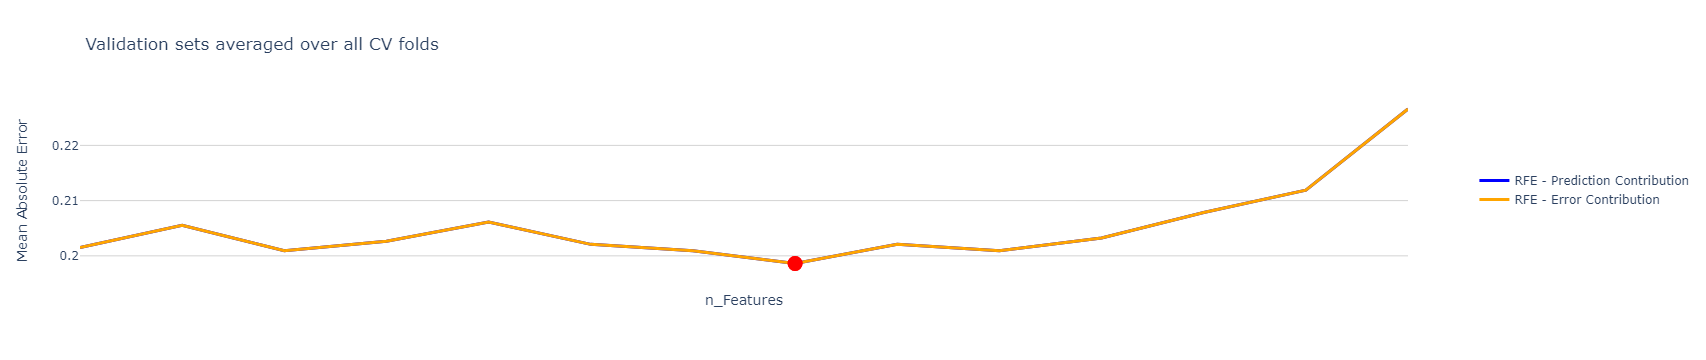

In [145]:
max_iter_show_CatBoost = len(rfe_record_pred_CatBoost)
plot_RFE(rfe_record_pred_CatBoost, rfe_record_error_CatBoost, max_iter_show_CatBoost)

<font size=4>We can see from the interactive plot above that we can get the result with the minimum MAE during RFECV if we keep 13 features by dropping "VIP" and "CryoSleep", and the final accuracy improved from 0.8033255016086185 to 0.8041590463095223 after the elimination of those 2 features.</font>

<a id="2.3.3.5"></a>
#### 2.3.3.5 **MEstimate encoding**

In [146]:
rfe_shape_cv_pred_MEstimate = rfe_shap_cv(contribution="Prediction")
rfe_record_pred_MEstimate = rfe_shape_cv_pred_MEstimate.RFE(df_train_MEstimate, label="Transported", cv_trainer_params={'estimator':CatBoostClassifier, 'params':base_params},  
                                        metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

  0%|                                                                                                                                                                                                                        | 0/14 [00:00<?, ?it/s]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds fo

  7%|██████████████▊                                                                                                                                                                                                | 1/14 [02:31<32:55, 151.97s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 1: VIP
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 14%|█████████████████████████████▌                                                                                                                                                                                 | 2/14 [04:47<28:27, 142.30s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 2: Group_size
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 3
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Co

 21%|████████████████████████████████████████████▎                                                                                                                                                                  | 3/14 [07:01<25:22, 138.36s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 3: RoomService
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 29%|███████████████████████████████████████████████████████████▏                                                                                                                                                   | 4/14 [09:25<23:28, 140.85s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 4: Age_group
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 36%|█████████████████████████████████████████████████████████████████████████▉                                                                                                                                     | 5/14 [11:20<19:44, 131.57s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 5: FoodCourt
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 6
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 43%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                      | 6/14 [13:19<16:56, 127.06s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 6: ShoppingMall
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 7
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                       | 7/14 [15:24<14:44, 126.33s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 7: VRDeck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 8
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Comple

 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 8/14 [17:32<12:41, 126.95s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 8: Spa
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 9
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 9/14 [19:41<10:38, 127.66s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 9: Destination
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 10/14 [22:09<08:55, 133.96s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 10: Cabin_deck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 11
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 11/14 [25:02<07:17, 145.78s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 11: Consumption_Basic
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 12
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for 

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 12/14 [27:33<04:54, 147.36s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 12: CryoSleep
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 13
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 13/14 [29:44<02:22, 142.60s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 13: HomePlanet
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 14
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [31:46<00:00, 136.18s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 14: Consumption_High_End
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [147]:
rfe_shape_cv_error_MEstimate = rfe_shap_cv(contribution="Error")
rfe_record_error_MEstimate = rfe_shape_cv_error_MEstimate.RFE(df_train_MEstimate, label="Transported", cv_trainer_params={'estimator':CatBoostClassifier, 'params':base_params}, 
                                          metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

  0%|                                                                                                                                                                                                                        | 0/14 [00:00<?, ?it/s]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds fo

  7%|██████████████▊                                                                                                                                                                                                | 1/14 [02:08<27:49, 128.42s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 1: VIP
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 14%|█████████████████████████████▌                                                                                                                                                                                 | 2/14 [03:59<23:35, 117.97s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 2: Group_size
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 3
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Co

 21%|████████████████████████████████████████████▎                                                                                                                                                                  | 3/14 [06:09<22:40, 123.67s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 3: RoomService
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 29%|███████████████████████████████████████████████████████████▏                                                                                                                                                   | 4/14 [08:31<21:48, 130.86s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 4: ShoppingMall
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 36%|█████████████████████████████████████████████████████████████████████████▉                                                                                                                                     | 5/14 [10:40<19:31, 130.15s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 5: Age_group
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 6
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 43%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                      | 6/14 [12:55<17:34, 131.85s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 6: FoodCourt
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 7
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                       | 7/14 [15:14<15:39, 134.28s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 7: VRDeck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 8
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Comple

 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 8/14 [17:43<13:53, 138.91s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 8: Spa
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 9
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 9/14 [19:48<11:13, 134.69s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 9: Destination
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 10/14 [21:52<08:44, 131.11s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 10: CryoSleep
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 11
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 11/14 [23:56<06:26, 128.93s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 11: Cabin_deck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 12
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 12/14 [25:49<04:08, 124.33s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 12: Consumption_Basic
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 13
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for 

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 13/14 [27:41<02:00, 120.56s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 13: HomePlanet
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 14
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [29:47<00:00, 127.66s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 14: Consumption_High_End
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [148]:
rfe_record_pred_MEstimate

n_features       mae  worst_contrib          feature_drop
0         14.0  0.198729       0.026689                   VIP
1         13.0  0.201040       0.052355            Group_size
2         12.0  0.203233       0.090533           RoomService
3         11.0  0.200924       0.104411             Age_group
4         10.0  0.200256       0.121546             FoodCourt
5          9.0  0.200924       0.152886          ShoppingMall
6          8.0  0.197137       0.204575                VRDeck
7          7.0  0.200255       0.207509                   Spa
8          6.0  0.200346       0.232195           Destination
9          5.0  0.202079       0.354165            Cabin_deck
10         4.0  0.206239       0.402543     Consumption_Basic
11         3.0  0.211894       0.489824             CryoSleep
12         2.0  0.211894       0.874764            HomePlanet
13         1.0  0.226585       1.403119  Consumption_High_End

In [149]:
rfe_record_error_MEstimate

n_features       mae  worst_contrib          feature_drop
0         14.0  0.198729      -0.020920                   VIP
1         13.0  0.201040      -0.038631            Group_size
2         12.0  0.203233      -0.067947           RoomService
3         11.0  0.200924      -0.079460          ShoppingMall
4         10.0  0.199192      -0.083259             Age_group
5          9.0  0.200602      -0.085159             FoodCourt
6          8.0  0.197137      -0.156690                VRDeck
7          7.0  0.200255      -0.159902                   Spa
8          6.0  0.200346      -0.191888           Destination
9          5.0  0.202079      -0.303974             CryoSleep
10         4.0  0.202079      -0.309796            Cabin_deck
11         3.0  0.207852      -0.340140     Consumption_Basic
12         2.0  0.211894      -0.765672            HomePlanet
13         1.0  0.226585      -1.019335  Consumption_High_End

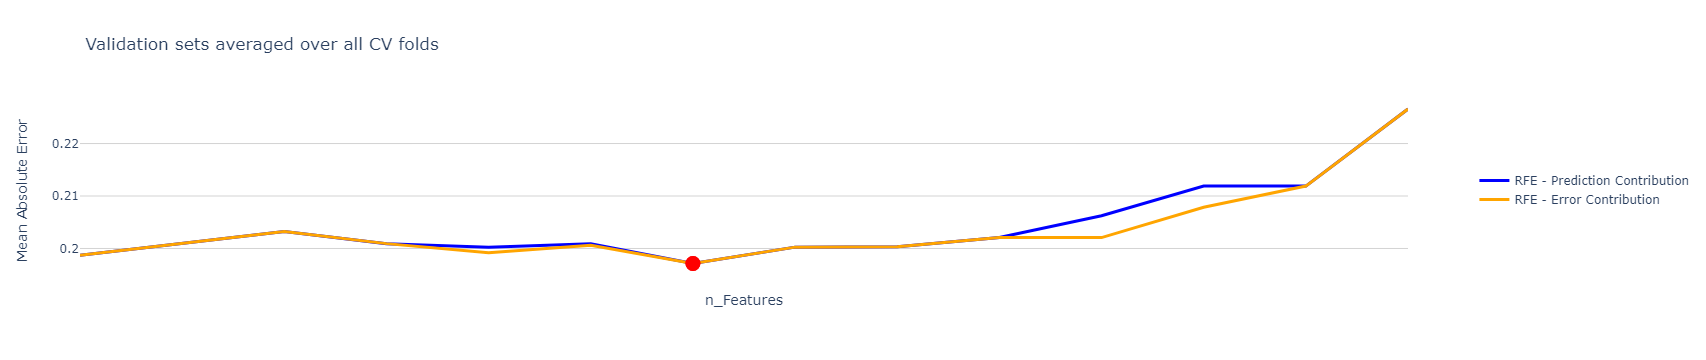

In [150]:
max_iter_show_MEstimate = len(rfe_record_pred_MEstimate)
plot_RFE(rfe_record_pred_MEstimate, rfe_record_error_MEstimate, max_iter_show_MEstimate)

<font size=4>We can see from the interactive plot above that we can get the result with the minimum MAE during RFECV if we keep 11 features by dropping "VIP", "ShoppingMall", "RoomService", "Group_size", and the final accuracy improved from 0.8041597137860604 to 0.80484988452655896 after the elimination of those 4 features.</font>

<a id="2.3.3.6"></a>
#### 2.3.3.6 **Mixed One-Hot and CatBoost encoding**

In [151]:
rfe_shape_cv_pred_CatBoost_Mixed = rfe_shap_cv(contribution="Prediction")
rfe_record_pred_CatBoost_Mixed = rfe_shape_cv_pred_CatBoost_Mixed.RFE(df_train_CatBoost_Mixed, label="Transported", cv_trainer_params={'estimator':CatBoostClassifier, 'params':base_params},  
                                        metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

  0%|                                                                                                                                                                                                                        | 0/14 [00:00<?, ?it/s]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds fo

  7%|██████████████▊                                                                                                                                                                                                | 1/14 [02:37<34:12, 157.87s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 1: VIP
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 14%|█████████████████████████████▌                                                                                                                                                                                 | 2/14 [05:06<30:26, 152.23s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 2: Group_size
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 3
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Co

 21%|████████████████████████████████████████████▎                                                                                                                                                                  | 3/14 [07:52<29:06, 158.76s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 3: RoomService
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 29%|███████████████████████████████████████████████████████████▏                                                                                                                                                   | 4/14 [10:30<26:21, 158.20s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 4: Age_group
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 36%|█████████████████████████████████████████████████████████████████████████▉                                                                                                                                     | 5/14 [13:23<24:32, 163.57s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 5: ShoppingMall
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 6
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 43%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                      | 6/14 [16:20<22:24, 168.11s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 6: FoodCourt
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 7
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                       | 7/14 [19:11<19:44, 169.21s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 7: Destination
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 8
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 8/14 [22:07<17:07, 171.26s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 8: VRDeck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 9
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Comple

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 9/14 [24:22<13:19, 159.90s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 9: Spa
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Complete

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 10/14 [26:44<10:18, 154.54s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 10: Cabin_deck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 11
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 11/14 [29:02<07:28, 149.56s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 11: Consumption_Basic
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 12
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for 

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 12/14 [31:18<04:50, 145.42s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 12: CryoSleep_False
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 13
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fo

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 13/14 [33:49<02:27, 147.15s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 13: HomePlanet
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 14
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [36:13<00:00, 155.24s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 14: Consumption_High_End
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [152]:
rfe_shape_cv_error_CatBoost_Mixed = rfe_shap_cv(contribution="Error")
rfe_record_error_CatBoost_Mixed = rfe_shape_cv_error_CatBoost_Mixed.RFE(df_train_CatBoost_Mixed, label="Transported", cv_trainer_params={'estimator':CatBoostClassifier, 'params':base_params}, 
                                          metric_list=["accuracy", "roc_auc", "f1"], metric_opt_dir_list=["max", "max","max"])

  0%|                                                                                                                                                                                                                        | 0/14 [00:00<?, ?it/s]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10
Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds fo

  7%|██████████████▊                                                                                                                                                                                                | 1/14 [02:57<38:28, 177.58s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 1: VIP
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 14%|█████████████████████████████▌                                                                                                                                                                                 | 2/14 [05:42<33:59, 169.93s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 2: Group_size
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 3
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Co

 21%|████████████████████████████████████████████▎                                                                                                                                                                  | 3/14 [08:46<32:22, 176.60s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 3: RoomService
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
C

 29%|███████████████████████████████████████████████████████████▏                                                                                                                                                   | 4/14 [11:37<29:01, 174.13s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 4: ShoppingMall
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 5
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 36%|█████████████████████████████████████████████████████████████████████████▉                                                                                                                                     | 5/14 [14:07<24:50, 165.58s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 5: Age_group
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 6
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 43%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                      | 6/14 [16:29<21:00, 157.60s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 6: FoodCourt
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 7
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Com

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                       | 7/14 [18:50<17:45, 152.26s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 7: VRDeck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 8
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Comple

 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 8/14 [21:19<15:06, 151.01s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 8: Spa
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 9
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 9/14 [23:32<12:06, 145.37s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 9: Destination
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 10/14 [25:41<09:21, 140.49s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 10: Cabin_deck
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 11
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 11/14 [27:58<06:58, 139.43s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 11: Consumption_Basic
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 12
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for 

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 12/14 [30:50<04:58, 149.22s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 12: CryoSleep_False
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 13
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fo

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 13/14 [33:42<02:36, 156.05s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 13: HomePlanet
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting to eliminate feature number 14
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [36:27<00:00, 156.22s/it]

Finished acquiring shap values for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Eliminated feature number 14: Consumption_High_End
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [153]:
rfe_record_pred_CatBoost_Mixed

n_features       mae  worst_contrib          feature_drop
0         14.0  0.199908       0.011046                   VIP
1         13.0  0.199307       0.055930            Group_size
2         12.0  0.202218       0.084032           RoomService
3         11.0  0.203351       0.108977             Age_group
4         10.0  0.199793       0.109566          ShoppingMall
5          9.0  0.199793       0.113455             FoodCourt
6          8.0  0.198985       0.218301           Destination
7          7.0  0.202219       0.232299                VRDeck
8          6.0  0.203373       0.228572                   Spa
9          5.0  0.203834       0.360436            Cabin_deck
10         4.0  0.206697       0.421574     Consumption_Basic
11         3.0  0.211894       0.660257       CryoSleep_False
12         2.0  0.211894       0.874764            HomePlanet
13         1.0  0.226585       1.403119  Consumption_High_End

In [154]:
rfe_record_error_CatBoost_Mixed

n_features       mae  worst_contrib          feature_drop
0         14.0  0.199908      -0.008698                   VIP
1         13.0  0.199307      -0.041601            Group_size
2         12.0  0.202218      -0.064259           RoomService
3         11.0  0.203351      -0.079332          ShoppingMall
4         10.0  0.198037      -0.087299             Age_group
5          9.0  0.199793      -0.088912             FoodCourt
6          8.0  0.198985      -0.173986                VRDeck
7          7.0  0.199192      -0.155148                   Spa
8          6.0  0.198150      -0.189157           Destination
9          5.0  0.203834      -0.316694            Cabin_deck
10         4.0  0.206697      -0.350117     Consumption_Basic
11         3.0  0.211894      -0.498412       CryoSleep_False
12         2.0  0.211894      -0.765672            HomePlanet
13         1.0  0.226585      -1.019335  Consumption_High_End

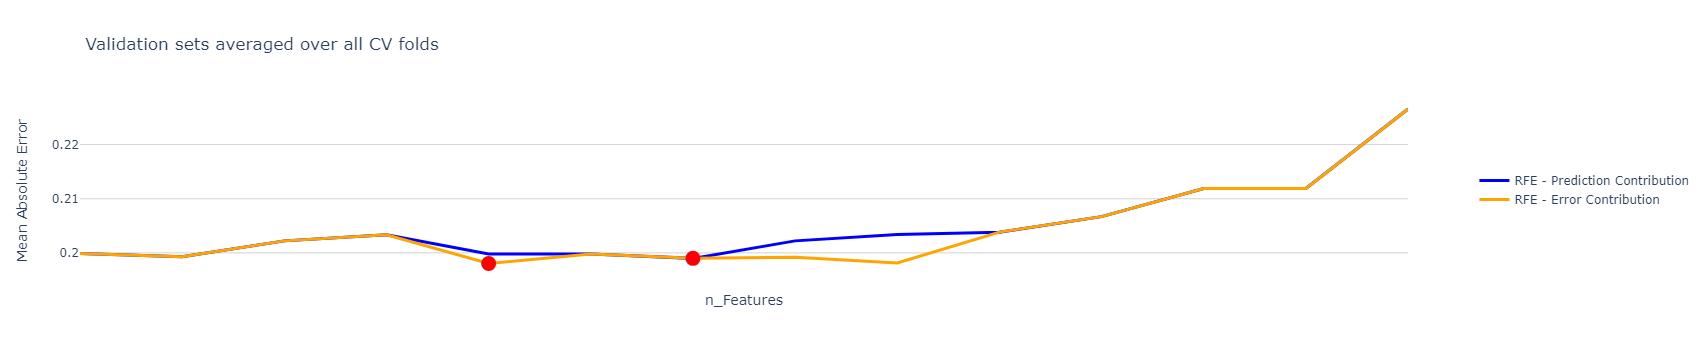

In [155]:
max_iter_show_CatBoost_Mixed = len(rfe_record_pred_CatBoost_Mixed)
plot_RFE(rfe_record_pred_CatBoost_Mixed, rfe_record_error_CatBoost_Mixed, max_iter_show_CatBoost_Mixed)

<font size=4>We can see from the interactive plot above that we can get the result with the minimum MAE during RFECV if we keep 9 features by dropping "VIP", "Age_group", "RoomService", "Group_size","ShoppingMall" and "FoodCourt", and the final accuracy improved from 0.8041590463095223 to 0.8060046189376444 after the elimination of those 6 features.</font>

<a id="2.3.4"></a>
### 2.3.4  **Annealing and the final feature selection results for our baseline CatBoost Classifier model with various encodings**

<font size=4>
    
- From the RFECV process in 2.3.3, we find that WOEEncoder and MEstimatorEncoder give really close results in terms of feature contributions and least MAEs, and MEstimatorEncoder has a slight edge over WOEEncoder, so we choose to only use MEstimator from now on. 
    
- Obviously, the Mixed One-Hot and CatBoost encoding give better results than both pure one-hot and pure CatBoost encoding, so we only use the Mixed One-Hot and CatBoost encoding out of the three from now on.
  </font>

<font size=4>RFE is a greedy algorithm that always opts for the immediate best result at the risk of getting stuck in a local optimum, what if there is a selection of features that gives better result but can't be reached by RFE? For that reason, we now turn to annealing - a non-greedy algorithm - to try to strike a balance between exploitation and exploration so that we can benefit more in the long run.</font>

<font size=4>We now attempt to find globally optimal selection of featueres maximizing accuracy for training set with no encoding, MEstimator encoding and mixed One-Hot and CatBoost encoding.</font>

<a id="2.3.4.0"></a>
#### 2.3.4.0 **Annealing process: class definition**

In [156]:
def annealing_iter_decision(metric_new, metric_curr, subset_new, subset_curr, metric_best, subset_best, T, beta, metric_opt_dir):
    """
    Decides whether to accept or reject a new subset based on its performance metric, comparing it with the current
    subset's metric, and updates the best known metric and subset if necessary. It uses a simulated annealing approach
    to potentially accept worse solutions to escape local minima.

    Args:
        metric_new (float): The performance metric of the new subset.
        metric_curr (float): The current performance metric.
        subset_new (set): The new set of features.
        subset_curr (set): The current set of features.
        metric_best (float): The best known performance metric.
        subset_best (set): The best known set of features.
        T (float): The current temperature in simulated annealing.
        beta (float): The control parameter for the acceptance probability.
        metric_opt_dir (str): The optimization direction, 'max' for maximization and 'min' for minimization.

    Returns:
        tuple: A tuple containing updated values for metric_curr, subset_curr, metric_best, subset_best, and a status string 
               indicating if the new subset was 'Improved', 'Accept'ed despite being worse, or 'Reject'ed. Additionally, 
               returns the acceptance probability and random number generated during the decision process, if applicable.

    Nested Functions:
        accept_change(diff, T, beta):
            Evaluates whether a change resulting in a worse metric should be accepted, based on the temperature and a random factor.

            Args:
                diff (float): The difference between the current and new metrics.
                T (float): The current temperature in the annealing process.
                beta (float): The control parameter for scaling the acceptance probability.

            Returns:
                tuple: A tuple indicating if the change is accepted, the acceptance probability, and the generated random number.
    """
    def accept_change(diff, T, beta):
        rnd = np.random.uniform()
        accept_prob = np.exp(-beta * abs(diff) / T)
        if rnd < accept_prob:
            print("%"*150)
            print(f'New subset has worse performance but still accept. Metric change:{diff:8.4f}, Acceptance probability:{accept_prob:6.4f}, Random number:{rnd:6.4f}')
            print("%"*150)
            return True, accept_prob, rnd
        else:
            print("%"*150)
            print(f'New subset has worse performance, therefore reject. Metric change:{diff:8.4f}, Acceptance probability:{accept_prob:6.4f}, Random number:{rnd:6.4f}')
            print("%"*150)
            return False, accept_prob, rnd

    improvement = (metric_new > metric_curr) if metric_opt_dir == "max" else (metric_new < metric_curr)
    if improvement:
        print("%"*150)
        print(f'Local improvement in metric from {metric_curr:8.4f} to {metric_new:8.4f} - New subset accepted')
        print("%"*150)
        metric_curr = metric_new
        subset_curr = subset_new.copy()
        global_improvement = (metric_new > metric_best) if metric_opt_dir == "max" else (metric_new < metric_best)
        if global_improvement:
            print("%"*150)
            print(f'Global improvement in metric from {metric_best:8.4f} to {metric_new:8.4f} - Best subset updated')
            print("%"*150)
            metric_best = metric_new
            subset_best = subset_new.copy()
        return metric_curr, subset_curr, metric_best, subset_best, 'Improved', '-', '-'
    else:
        diff = metric_curr - metric_new
        accept, accept_prob, rnd = accept_change(diff, T, beta)
        if accept:
            metric_curr = metric_new
            subset_curr = subset_new.copy()
            return metric_curr, subset_curr, metric_best, subset_best, 'Accept', accept_prob, rnd
        else:
            return metric_curr, subset_curr, metric_best, subset_best, 'Reject', accept_prob, rnd


In [157]:
class simulated_annealing_cv:
    """
    Implements a simulated annealing algorithm for feature selection aimed at optimizing a given metric over a specified number
    of iterations. The class can dynamically adjust the feature subset based on the performance of a cross-validated model.

    Attributes:
        maxiters (int): Maximum number of iterations for the annealing process.
        min_n_feat_final (int): Minimum number of features to retain in the final selected subset.
        sub_pct_init (float): Initial percentage of features to start with.
        metric_name (str): The performance metric to be optimized during feature selection.
        alpha (float): The cooling rate used in the temperature reduction schedule.
        beta (float): The scaling factor used in calculating the acceptance probability for new subsets.
        T_0 (float): Initial temperature for the simulated annealing process.
        update_iters (int): Number of iterations after which the temperature is updated.
        temp_reduction (str): The method of temperature reduction, options include 'geometric', 'linear', or 'slow decrease'.
        b (float): Parameter used in the 'slow decrease' temperature reduction method to adjust the rate of decrease.
        hash_values (set): A set used to keep track of already visited subsets to avoid revisiting.

    Args:
        maxiters (int): Maximum number of iterations for the annealing process.
        min_n_feat_final (int): Minimum number of features to retain in the final selected subset.
        sub_pct_init (float): Initial percentage of features to start with.
        metric_name (str): The performance metric to be optimized during feature selection.
        alpha (float): The cooling rate used in the temperature reduction schedule.
        beta (float): The scaling factor used in calculating the acceptance probability for new subsets.
        T_0 (float): Initial temperature for the simulated annealing process.
        update_iters (int): Number of iterations after which the temperature is updated.
        temp_reduction (str): The method of temperature reduction, options include 'geometric', 'linear', or 'slow decrease'.
        b (float): Parameter used in the 'slow decrease' temperature reduction method to adjust the rate of decrease.
    """
    def __init__(self,
                 maxiters: int = 50,
                 min_n_feat_final: int = 2,
                 sub_pct_init: float = 0.66,
                 metric_name: str = "accuracy",
                 alpha: float = 0.95,
                 beta: float = 1,
                 T_0: float = 1,
                 update_iters: int = 1,
                 temp_reduction: str ='geometric',
                 b: float = 5.0):
        self.maxiters = maxiters
        self.min_n_feat_final = min_n_feat_final
        self.sub_pct_init = sub_pct_init
        self.metric_name = metric_name
        self.alpha = alpha
        self.beta = beta
        self.T_0 = T_0
        self.update_iters = update_iters
        self.temp_reduction = temp_reduction
        self.b = b
        self.hash_values = set()


    def anneal(self, df: pd.DataFrame, vip_features: list[str] = [], label: str = None, cv_trainer_params: dict = {}, fit_kwargs: dict = {}, predict_kwargs: dict = {}, metric_list: list[str] = [], metric_opt_dir_list: list[str] = [], metric_kwargs: dict = {}):
        """
        Performs the annealing process to select an optimal subset of features based on the specified metric.

        Args:
            df (pd.DataFrame): The dataset containing features and a label.
            vip_features: List of the name of vip features that are particularly helpful so that they will guarantee to appear in every annealing iteration. 
            label (str): Column name of the label in the dataframe.
            cv_trainer_params (dict): Parameters to initialize the cross-validation trainer.
            fit_kwargs (dict): Keyword arguments for the fit method of the model.
            predict_kwargs (dict): Keyword arguments for the predict method of the model.
            metric_list (list[str]): List of metrics to evaluate during the annealing process.
            metric_opt_dir_list (list[str]): List specifying the direction ('min' or 'max') for each metric's optimization.
            metric_kwargs (dict): Additional keyword arguments for metric computations.

        Returns:
            tuple: A tuple containing the dataframe of results from each iteration, the best metric achieved, and the list
                   of best features selected.
        """
        T = self.T_0
        columns = ['Iteration', 'Feature Count', 'Feature Set', 'Metric', 'Best Metric', 'Acceptance Probability', 'Random Number', 'Outcome']
        results = pd.DataFrame(index=range(self.maxiters), columns=columns)
        
        X_train = df.copy().drop(columns=label)
        Y_train = df.copy()[label]
        full_set = set(np.arange(len(df.columns) - 1))
        self.vip_features = set(df.columns.get_loc(vip_feature) for vip_feature in vip_features)
        
        # Generate initial random subset based on ~(self.sub_pct_init)% of columns 
        # Include VIP features in the initial subset
        initial_num_features = round(self.sub_pct_init * len(full_set))
        # Calculate the additional features needed to reach the initial percentage target
        additional_features_needed = max(0, initial_num_features - len(self.vip_features))

        # Sample additional features to include, converting the set difference to a list
        if additional_features_needed > 0:
            additional_features = random.sample(list(full_set.difference(self.vip_features)), additional_features_needed)
        else:
            additional_features = []

        # Create the initial subset by combining VIP features with the additional randomly selected features
        subset_curr = self.vip_features.union(set(additional_features))
        subset_best = subset_curr.copy()
        X_curr = X_train.iloc[:, list(subset_curr)]



        print("%"*150)
        logging.info(f"The initial set of features are {X_curr.columns}")
        print(f"The initial set of features are {X_curr.columns}")
        print("%"*150) 

        df_curr = pd.concat([X_curr, Y_train], axis=1)
        cv_trainer = cv_training(**cv_trainer_params)
        fit_kwargs_curr = {**get_fit_cat_params(cv_trainer.estimator.__name__, cat_col_list=get_cat_features(df_curr, label)), **fit_kwargs}
        cv_trainer.fit(df_curr, label=label, fit_kwargs=fit_kwargs_curr, predict_kwargs=predict_kwargs, metric_list=metric_list, metric_opt_dir_list = metric_opt_dir_list, metric_kwargs=metric_kwargs)
        metric_curr = cv_trainer.metrics_stats[self.metric_name]["final"]
        metric_best = metric_curr 
        
        for i in tqdm(range(self.maxiters)):
            print("%"*150)
            logging.info(f"Starting iteration {i+1}")
            print(f"Starting iteration {i+1}")
            print("%"*150)
            
            if T < 0.01:
                print(f'Temperature {T} below threshold. Termination condition met')
                break
            
            while True:
                # Generate a new subset based on the current state, ensuring VIP features are not removed
                if len(subset_curr) == len(self.vip_features):
                    move = 'Add'  # Only add if the current set is exactly the VIP set
                elif len(subset_curr) > len(self.vip_features):
                    move = random.choice(['Add', 'Replace', 'Remove'])
                else:
                    move = 'Add'  # Safeguard, should not occur due to previous condition
        
                pending_cols = full_set.difference(subset_curr)
                subset_new = subset_curr.copy()
        
                if move == 'Add' and pending_cols:
                    subset_new.add(random.choice(list(pending_cols)))
                elif move == 'Replace' and pending_cols and (len(subset_new) > len(self.vip_features)):
                    feature_to_replace = random.choice(list(subset_new.difference(self.vip_features)))
                    subset_new.remove(feature_to_replace)
                    subset_new.add(random.choice(list(pending_cols)))
                elif move == 'Remove' and (len(subset_new) > len(self.vip_features)):
                    subset_new.remove(random.choice(list(subset_new.difference(self.vip_features))))

                
                if subset_new in self.hash_values:
                    print('Subset already visited, trying to get a new subset of features for this iteration.')
                else:
                    self.hash_values.add(frozenset(subset_new))
                    break

            X_new = X_train.iloc[:, list(subset_new)]
            df_new = pd.concat([X_new, Y_train], axis=1)
            cv_trainer = cv_training(**cv_trainer_params)
            fit_kwargs_new = {**get_fit_cat_params(cv_trainer.estimator.__name__, cat_col_list=get_cat_features(df_new, label)), **fit_kwargs}
            cv_trainer.fit(df_new, label =label, fit_kwargs=fit_kwargs_new, predict_kwargs=predict_kwargs, metric_list=metric_list, metric_opt_dir_list = metric_opt_dir_list, metric_kwargs=metric_kwargs)
        
            print("%"*150)
            logging.info(f"The new set of features are {X_new.columns}")
            print(f"The new set of features are {X_new.columns}")
            print("%"*150) 
            
            metric_new = cv_trainer.metrics_stats[self.metric_name]["final"]
            # Make decision based on metric_new and metric_curr
            metric_curr, subset_curr, metric_best, subset_best, outcome, accept_prob, rnd = annealing_iter_decision(metric_new, metric_curr, subset_new, subset_curr, metric_best, subset_best, T, self.beta, metric_opt_dir_list[0])
            results.loc[i, 'Iteration'] = i+1
            results.loc[i, 'Feature Count'] = len(subset_curr)
            results.loc[i, 'Feature Set'] = sorted(subset_curr)
            results.loc[i, 'Metric'] = metric_curr
            results.loc[i, 'Best Metric'] = metric_best
            results.loc[i, 'Acceptance Probability'] = accept_prob
            results.loc[i, 'Random Number'] = rnd
            results.loc[i, 'Outcome'] = outcome
    
            # Temperature cooling schedule
            if i % self.update_iters == 0:
                if self.temp_reduction == 'geometric':
                    T = self.alpha * T
                elif self.temp_reduction == 'linear':
                    T -= self.alpha
                elif self.temp_reduction == 'slow decrease':
                    T = T / (1 + self.b * T)
                else:
                    raise Exception("Temperature reduction strategy not recognized")
            print("%"*150)
            logging.info(f"Finished iteration {i+1}")
            print(f"Finished iteration {i+1}")
            print("%"*150)   
        
        best_subset_cols = [list(X_train.columns)[i] for i in list(subset_best)]
        results = results.dropna(axis=0, how='all')

        return results, metric_best, best_subset_cols

<a id="2.3.4.1"></a>
#### 2.3.4.1 **No encoding**

<font size=4>We have already explored the case where there is no encoding in Feature_selection_single.ipynb. Therefore, we select 7 out of 14 features for the training set without encoding: ['CryoSleep',
 'Destination',
 'VRDeck',
 'Cabin_deck',
 'HomePlanet',
 'Consumption_High_End',
 'Consumption_Basic'] .</font>

<a id="2.3.4.2"></a>
#### 2.3.4.2 **MEstimator encoding**

In [160]:
base_annealing_cv_accuracy_MEstimate = simulated_annealing_cv(metric_name="MAE", beta=200, sub_pct_init=0.5)

In [161]:
annealing_results_accuracy_MEstimate, annealing_accuracy_best_MEstimate, annealing_best_subset_cols_accuracy_MEstimate = base_annealing_cv_accuracy_MEstimate.anneal(df_train_MEstimate, label="Transported", vip_features=['Consumption_High_End', 'CryoSleep', 'HomePlanet'],
                                                                                                cv_trainer_params={'estimator':CatBoostClassifier, 'params':{"verbose": False, "eval_metric": 'Accuracy'}},
                                                                                                metric_list=["MAE", "accuracy"], metric_opt_dir_list=["min", "max"])

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The initial set of features are Index(['CryoSleep', 'HomePlanet', 'Age_group', 'ShoppingMall', 'Spa',
       'Consumption_High_End', 'Consumption_Basic'],
      dtype='object')
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training f

  0%|                                                                                                                                                                                                                        | 0/50 [00:00<?, ?it/s]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting iteration 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10


  2%|████                                                                                                                                                                                                         | 1/50 [02:25<1:59:06, 145.85s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21016166281755197, 0.1997690531177829, 0.21247113163972287, 0.21247113163972287, 0.20207852193995382, 0.20323325635103925, 0.20207852193995382, 0.1951501154734411, 0.21593533487297922, 0.21040462427745665]. 
 The final score is 0.2066974595842956, and the standard deviation is 0.006424398012650214
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.789838337182448, 0.8002309468822171, 0.7875288683602771, 0.7875288683602771, 0.7979214780600462, 0.7967667436489607, 0.7979214780600462, 0.8048498845265589, 0.7840646651270208, 0.7895953757225433]. 
 The final score is 0.7933025404157044, and the standard deviatio

  4%|████████▏                                                                                                                                                                                                    | 2/50 [04:49<1:55:36, 144.51s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20554272517321015, 0.19630484988452657, 0.2066974595842956, 0.2113163972286374, 0.19861431870669746, 0.20207852193995382, 0.20554272517321015, 0.18706697459584296, 0.21939953810623555, 0.20346820809248556]. 
 The final score is 0.20450546663284785, and the standard deviation is 0.00824657586397012
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7944572748267898, 0.8036951501154734, 0.7933025404157044, 0.7886836027713626, 0.8013856812933026, 0.7979214780600462, 0.7944572748267898, 0.812933025404157, 0.7806004618937644, 0.7965317919075144]. 
 The final score is 0.7954945333671521, and the standard deviatio

  6%|████████████▎                                                                                                                                                                                                | 3/50 [07:29<1:58:55, 151.82s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2066974595842956, 0.19630484988452657, 0.21016166281755197, 0.21247113163972287, 0.19399538106235567, 0.19630484988452657, 0.20785219399538107, 0.18937644341801385, 0.21824480369515012, 0.2046242774566474]. 
 The final score is 0.2056608685204715, and the standard deviation is 0.008751821597066741
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7933025404157044, 0.8036951501154734, 0.789838337182448, 0.7875288683602771, 0.8060046189376443, 0.8036951501154734, 0.792147806004619, 0.8106235565819861, 0.7817551963048499, 0.7953757225433526]. 
 The final score is 0.7943391314795285, and the standard deviation

  8%|████████████████▍                                                                                                                                                                                            | 4/50 [10:29<2:04:48, 162.78s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20785219399538107, 0.1997690531177829, 0.20438799076212472, 0.2113163972286374, 0.20092378752886836, 0.20092378752886836, 0.20323325635103925, 0.18937644341801385, 0.21478060046189376, 0.2046242774566474]. 
 The final score is 0.20381062355658197, and the standard deviation is 0.006600024238936908
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.792147806004619, 0.8002309468822171, 0.7956120092378753, 0.7886836027713626, 0.7990762124711316, 0.7990762124711316, 0.7967667436489607, 0.8106235565819861, 0.7852193995381063, 0.7953757225433526]. 
 The final score is 0.796189376443418, and the standard deviation

 10%|████████████████████▌                                                                                                                                                                                        | 5/50 [13:35<2:08:26, 171.27s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21016166281755197, 0.19861431870669746, 0.20092378752886836, 0.20554272517321015, 0.19861431870669746, 0.1997690531177829, 0.20554272517321015, 0.18822170900692842, 0.21593533487297922, 0.20809248554913296]. 
 The final score is 0.20323325635103925, and the standard deviation is 0.007272492482777662
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.789838337182448, 0.8013856812933026, 0.7990762124711316, 0.7944572748267898, 0.8013856812933026, 0.8002309468822171, 0.7944572748267898, 0.8117782909930716, 0.7840646651270208, 0.791907514450867]. 
 The final score is 0.7967667436489607, and the standard deviati

 12%|████████████████████████▌                                                                                                                                                                                    | 6/50 [16:15<2:02:44, 167.37s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2090069284064665, 0.1997690531177829, 0.20438799076212472, 0.20554272517321015, 0.20207852193995382, 0.20323325635103925, 0.20207852193995382, 0.1905311778290993, 0.2228637413394919, 0.2092485549132948]. 
 The final score is 0.20487404717724172, and the standard deviation is 0.007814284900519717
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7909930715935335, 0.8002309468822171, 0.7956120092378753, 0.7944572748267898, 0.7979214780600462, 0.7967667436489607, 0.7979214780600462, 0.8094688221709007, 0.7771362586605081, 0.7907514450867053]. 
 The final score is 0.7951259528227583, and the standard deviation

 14%|████████████████████████████▋                                                                                                                                                                                | 7/50 [18:16<1:49:02, 152.14s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2066974595842956, 0.20092378752886836, 0.2066974595842956, 0.2090069284064665, 0.20092378752886836, 0.1997690531177829, 0.20438799076212472, 0.1951501154734411, 0.22863741339491916, 0.2]. 
 The final score is 0.20521939953810625, and the standard deviation is 0.0087352891524108
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7933025404157044, 0.7990762124711316, 0.7933025404157044, 0.7909930715935335, 0.7990762124711316, 0.8002309468822171, 0.7956120092378753, 0.8048498845265589, 0.7713625866050808, 0.8]. 
 The final score is 0.7947806004618937, and the standard deviation is 0.008735289152410801
%%%%%%%%

 16%|████████████████████████████████▊                                                                                                                                                                            | 8/50 [19:57<1:35:01, 135.76s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21593533487297922, 0.20438799076212472, 0.21478060046189376, 0.21709006928406466, 0.2113163972286374, 0.21016166281755197, 0.21939953810623555, 0.1928406466512702, 0.22170900692840648, 0.20115606936416186]. 
 The final score is 0.21304849884526558, and the standard deviation is 0.008555767968706562
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7840646651270208, 0.7956120092378753, 0.7852193995381063, 0.7829099307159353, 0.7886836027713626, 0.789838337182448, 0.7806004618937644, 0.8071593533487298, 0.7782909930715936, 0.7988439306358381]. 
 The final score is 0.7869515011547344, and the standard deviati

 18%|████████████████████████████████████▉                                                                                                                                                                        | 9/50 [21:58<1:29:44, 131.33s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20092378752886836, 0.19861431870669746, 0.2113163972286374, 0.20785219399538107, 0.20554272517321015, 0.20207852193995382, 0.2090069284064665, 0.18822170900692842, 0.22401847575057737, 0.20115606936416186]. 
 The final score is 0.20487311271008823, and the standard deviation is 0.008877711673417844
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7990762124711316, 0.8013856812933026, 0.7886836027713626, 0.792147806004619, 0.7944572748267898, 0.7979214780600462, 0.7909930715935335, 0.8117782909930716, 0.7759815242494227, 0.7988439306358381]. 
 The final score is 0.7951268872899118, and the standard deviati

 20%|████████████████████████████████████████▊                                                                                                                                                                   | 10/50 [23:52<1:24:02, 126.07s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21824480369515012, 0.20438799076212472, 0.21709006928406466, 0.21478060046189376, 0.20438799076212472, 0.197459584295612, 0.21478060046189376, 0.19630484988452657, 0.2228637413394919, 0.2161849710982659]. 
 The final score is 0.21478060046189376, and the standard deviation is 0.008782292037117773
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7817551963048499, 0.7956120092378753, 0.7829099307159353, 0.7852193995381063, 0.7956120092378753, 0.8025404157043879, 0.7852193995381063, 0.8036951501154734, 0.7771362586605081, 0.7838150289017342]. 
 The final score is 0.7852193995381063, and the standard deviatio

 22%|████████████████████████████████████████████▉                                                                                                                                                               | 11/50 [25:44<1:18:57, 121.47s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2113163972286374, 0.18937644341801385, 0.2090069284064665, 0.21247113163972287, 0.19861431870669746, 0.20785219399538107, 0.21016166281755197, 0.19399538106235567, 0.21593533487297922, 0.20115606936416186]. 
 The final score is 0.2084295612009238, and the standard deviation is 0.008287810708400279
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7886836027713626, 0.8106235565819861, 0.7909930715935335, 0.7875288683602771, 0.8013856812933026, 0.792147806004619, 0.789838337182448, 0.8060046189376443, 0.7840646651270208, 0.7988439306358381]. 
 The final score is 0.7915704387990763, and the standard deviation

 24%|████████████████████████████████████████████████▉                                                                                                                                                           | 12/50 [27:39<1:15:50, 119.75s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21709006928406466, 0.1997690531177829, 0.21362586605080833, 0.20785219399538107, 0.20438799076212472, 0.20438799076212472, 0.22055427251732102, 0.19168591224018475, 0.2251732101616628, 0.2092485549132948]. 
 The final score is 0.20937751138047495, and the standard deviation is 0.009536273703818978
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7829099307159353, 0.8002309468822171, 0.7863741339491916, 0.792147806004619, 0.7956120092378753, 0.7956120092378753, 0.7794457274826789, 0.8083140877598153, 0.7748267898383372, 0.7907514450867053]. 
 The final score is 0.790622488619525, and the standard deviation

 26%|█████████████████████████████████████████████████████                                                                                                                                                       | 13/50 [29:23<1:10:47, 114.79s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21593533487297922, 0.20323325635103925, 0.21478060046189376, 0.21247113163972287, 0.20785219399538107, 0.20323325635103925, 0.20554272517321015, 0.19630484988452657, 0.21824480369515012, 0.19537572254335261]. 
 The final score is 0.2072973874968295, and the standard deviation is 0.007593478211669514
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7840646651270208, 0.7967667436489607, 0.7852193995381063, 0.7875288683602771, 0.792147806004619, 0.7967667436489607, 0.7944572748267898, 0.8036951501154734, 0.7817551963048499, 0.8046242774566474]. 
 The final score is 0.7927026125031704, and the standard deviat

 28%|█████████████████████████████████████████████████████████                                                                                                                                                   | 14/50 [31:08<1:07:10, 111.94s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21593533487297922, 0.21593533487297922, 0.22401847575057737, 0.21593533487297922, 0.2113163972286374, 0.20785219399538107, 0.21824480369515012, 0.19399538106235567, 0.2228637413394919, 0.2023121387283237]. 
 The final score is 0.21593533487297922, and the standard deviation is 0.008812173393186972
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7840646651270208, 0.7840646651270208, 0.7759815242494227, 0.7840646651270208, 0.7886836027713626, 0.792147806004619, 0.7817551963048499, 0.8060046189376443, 0.7771362586605081, 0.7976878612716763]. 
 The final score is 0.7840646651270208, and the standard deviatio

 30%|█████████████████████████████████████████████████████████████▏                                                                                                                                              | 15/50 [32:58<1:04:55, 111.31s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21247113163972287, 0.2066974595842956, 0.20554272517321015, 0.21593533487297922, 0.20785219399538107, 0.1951501154734411, 0.20207852193995382, 0.19399538106235567, 0.22401847575057737, 0.19421965317919074]. 
 The final score is 0.2061200923787529, and the standard deviation is 0.009407166104781126
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7875288683602771, 0.7933025404157044, 0.7944572748267898, 0.7840646651270208, 0.792147806004619, 0.8048498845265589, 0.7979214780600462, 0.8060046189376443, 0.7759815242494227, 0.8057803468208092]. 
 The final score is 0.793879907621247, and the standard deviation

 32%|█████████████████████████████████████████████████████████████████▎                                                                                                                                          | 16/50 [34:48<1:02:49, 110.88s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21247113163972287, 0.20785219399538107, 0.21824480369515012, 0.21824480369515012, 0.21247113163972287, 0.20554272517321015, 0.22170900692840648, 0.1928406466512702, 0.2228637413394919, 0.2069364161849711]. 
 The final score is 0.21247113163972287, and the standard deviation is 0.008615557810648171
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7875288683602771, 0.792147806004619, 0.7817551963048499, 0.7817551963048499, 0.7875288683602771, 0.7944572748267898, 0.7782909930715936, 0.8071593533487298, 0.7771362586605081, 0.793063583815029]. 
 The final score is 0.7875288683602771, and the standard deviation

 34%|█████████████████████████████████████████████████████████████████████▎                                                                                                                                      | 17/50 [36:37<1:00:47, 110.52s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21478060046189376, 0.19399538106235567, 0.19399538106235567, 0.1997690531177829, 0.20207852193995382, 0.1951501154734411, 0.2066974595842956, 0.19168591224018475, 0.21362586605080833, 0.19537572254335261]. 
 The final score is 0.20071540135364244, and the standard deviation is 0.007964811446913703
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7852193995381063, 0.8060046189376443, 0.8060046189376443, 0.8002309468822171, 0.7979214780600462, 0.8048498845265589, 0.7933025404157044, 0.8083140877598153, 0.7863741339491916, 0.8046242774566474]. 
 The final score is 0.7992845986463576, and the standard deviati

 36%|██████████████████████████████████████████████████████████████████████████▏                                                                                                                                   | 18/50 [38:28<58:56, 110.51s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2066974595842956, 0.1928406466512702, 0.20207852193995382, 0.19861431870669746, 0.19399538106235567, 0.1997690531177829, 0.21016166281755197, 0.1859122401847575, 0.21593533487297922, 0.1976878612716763]. 
 The final score is 0.2003692480209321, and the standard deviation is 0.008355257424151583
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7933025404157044, 0.8071593533487298, 0.7979214780600462, 0.8013856812933026, 0.8060046189376443, 0.8002309468822171, 0.789838337182448, 0.8140877598152425, 0.7840646651270208, 0.8023121387283237]. 
 The final score is 0.799630751979068, and the standard deviation is

 38%|██████████████████████████████████████████████████████████████████████████████▎                                                                                                                               | 19/50 [40:21<57:26, 111.16s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2090069284064665, 0.1859122401847575, 0.20554272517321015, 0.2066974595842956, 0.1928406466512702, 0.1951501154734411, 0.2066974595842956, 0.1859122401847575, 0.21593533487297922, 0.20115606936416186]. 
 The final score is 0.203349397268686, and the standard deviation is 0.009623846038840844
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7909930715935335, 0.8140877598152425, 0.7944572748267898, 0.7933025404157044, 0.8071593533487298, 0.8048498845265589, 0.7933025404157044, 0.8140877598152425, 0.7840646651270208, 0.7988439306358381]. 
 The final score is 0.796650602731314, and the standard deviation is 0

 40%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                                                           | 20/50 [42:03<54:17, 108.59s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20323325635103925, 0.1951501154734411, 0.2090069284064665, 0.20438799076212472, 0.19399538106235567, 0.1997690531177829, 0.21016166281755197, 0.1905311778290993, 0.22170900692840648, 0.1976878612716763]. 
 The final score is 0.20256324340199444, and the standard deviation is 0.008799466565131168
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7967667436489607, 0.8048498845265589, 0.7909930715935335, 0.7956120092378753, 0.8060046189376443, 0.8002309468822171, 0.789838337182448, 0.8094688221709007, 0.7782909930715936, 0.8023121387283237]. 
 The final score is 0.7974367565980055, and the standard deviation 

 42%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                       | 21/50 [43:46<51:41, 106.96s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21247113163972287, 0.19399538106235567, 0.2090069284064665, 0.2066974595842956, 0.2066974595842956, 0.197459584295612, 0.20323325635103925, 0.1951501154734411, 0.22401847575057737, 0.2046242774566474]. 
 The final score is 0.2056608685204715, and the standard deviation is 0.008464370889749636
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7875288683602771, 0.8060046189376443, 0.7909930715935335, 0.7933025404157044, 0.7933025404157044, 0.8025404157043879, 0.7967667436489607, 0.8048498845265589, 0.7759815242494227, 0.7953757225433526]. 
 The final score is 0.7943391314795285, and the standard deviation is

 44%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                   | 22/50 [45:37<50:25, 108.05s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21016166281755197, 0.20092378752886836, 0.21362586605080833, 0.21362586605080833, 0.19861431870669746, 0.20785219399538107, 0.2090069284064665, 0.19399538106235567, 0.22863741339491916, 0.2023121387283237]. 
 The final score is 0.2084295612009238, and the standard deviation is 0.009281175338565248
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.789838337182448, 0.7990762124711316, 0.7863741339491916, 0.7863741339491916, 0.8013856812933026, 0.792147806004619, 0.7909930715935335, 0.8060046189376443, 0.7713625866050808, 0.7976878612716763]. 
 The final score is 0.7915704387990763, and the standard deviation

 46%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                               | 23/50 [47:23<48:20, 107.41s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21478060046189376, 0.197459584295612, 0.20785219399538107, 0.21016166281755197, 0.20438799076212472, 0.19399538106235567, 0.20207852193995382, 0.19168591224018475, 0.2251732101616628, 0.2046242774566474]. 
 The final score is 0.20521993351933682, and the standard deviation is 0.009493091258109144
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7852193995381063, 0.8025404157043879, 0.792147806004619, 0.789838337182448, 0.7956120092378753, 0.8060046189376443, 0.7979214780600462, 0.8083140877598153, 0.7748267898383372, 0.7953757225433526]. 
 The final score is 0.7947800664806632, and the standard deviation 

 48%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                           | 24/50 [49:08<46:16, 106.78s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2066974595842956, 0.1951501154734411, 0.20554272517321015, 0.19399538106235567, 0.197459584295612, 0.20323325635103925, 0.20092378752886836, 0.18937644341801385, 0.21593533487297922, 0.19884393063583816]. 
 The final score is 0.20071580183956533, and the standard deviation is 0.007182779847117436
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7933025404157044, 0.8048498845265589, 0.7944572748267898, 0.8060046189376443, 0.8025404157043879, 0.7967667436489607, 0.7990762124711316, 0.8106235565819861, 0.7840646651270208, 0.8011560693641618]. 
 The final score is 0.7992841981604347, and the standard deviatio

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                       | 25/50 [50:47<43:32, 104.51s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2090069284064665, 0.1928406466512702, 0.20207852193995382, 0.1951501154734411, 0.19861431870669746, 0.19861431870669746, 0.20092378752886836, 0.18475750577367206, 0.21709006928406466, 0.19421965317919074]. 
 The final score is 0.19932958656503225, and the standard deviation is 0.00847489414543612
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7909930715935335, 0.8071593533487298, 0.7979214780600462, 0.8048498845265589, 0.8013856812933026, 0.8013856812933026, 0.7990762124711316, 0.815242494226328, 0.7829099307159353, 0.8057803468208092]. 
 The final score is 0.8006704134349677, and the standard deviation

 52%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                   | 26/50 [52:09<39:04, 97.67s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20554272517321015, 0.1997690531177829, 0.21709006928406466, 0.21016166281755197, 0.20207852193995382, 0.197459584295612, 0.20554272517321015, 0.18937644341801385, 0.21824480369515012, 0.2023121387283237]. 
 The final score is 0.20475777276428736, and the standard deviation is 0.008320550167926972
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7944572748267898, 0.8002309468822171, 0.7829099307159353, 0.789838337182448, 0.7979214780600462, 0.8025404157043879, 0.7944572748267898, 0.8106235565819861, 0.7817551963048499, 0.7976878612716763]. 
 The final score is 0.7952422272357127, and the standard deviation

 54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 27/50 [53:52<38:04, 99.33s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21247113163972287, 0.19630484988452657, 0.20207852193995382, 0.20207852193995382, 0.197459584295612, 0.20207852193995382, 0.20207852193995382, 0.1859122401847575, 0.2090069284064665, 0.20115606936416186]. 
 The final score is 0.20207852193995382, and the standard deviation is 0.006801142439432532
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7875288683602771, 0.8036951501154734, 0.7979214780600462, 0.7979214780600462, 0.8025404157043879, 0.7979214780600462, 0.7979214780600462, 0.8140877598152425, 0.7909930715935335, 0.7988439306358381]. 
 The final score is 0.7979214780600462, and the standard deviatio

 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 28/50 [55:44<37:43, 102.89s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21016166281755197, 0.19861431870669746, 0.2090069284064665, 0.20207852193995382, 0.20323325635103925, 0.20092378752886836, 0.20323325635103925, 0.18706697459584296, 0.21362586605080833, 0.19421965317919074]. 
 The final score is 0.20265588914549654, and the standard deviation is 0.007413503107920794
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.789838337182448, 0.8013856812933026, 0.7909930715935335, 0.7979214780600462, 0.7967667436489607, 0.7990762124711316, 0.7967667436489607, 0.812933025404157, 0.7863741339491916, 0.8057803468208092]. 
 The final score is 0.7973441108545034, and the standard deviati

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                      | 29/50 [57:40<37:26, 106.97s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20323325635103925, 0.1905311778290993, 0.20323325635103925, 0.197459584295612, 0.19630484988452657, 0.20438799076212472, 0.20323325635103925, 0.17782909930715934, 0.20554272517321015, 0.1930635838150289]. 
 The final score is 0.2003464203233256, and the standard deviation is 0.008169197441351209
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7967667436489607, 0.8094688221709007, 0.7967667436489607, 0.8025404157043879, 0.8036951501154734, 0.7956120092378753, 0.7967667436489607, 0.8221709006928406, 0.7944572748267898, 0.8069364161849711]. 
 The final score is 0.7996535796766744, and the standard deviation

 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 30/50 [59:31<36:01, 108.08s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21016166281755197, 0.19399538106235567, 0.2066974595842956, 0.197459584295612, 0.20323325635103925, 0.20207852193995382, 0.20207852193995382, 0.19168591224018475, 0.21478060046189376, 0.2046242774566474]. 
 The final score is 0.2026795178149488, and the standard deviation is 0.006685020271183962
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.789838337182448, 0.8060046189376443, 0.7933025404157044, 0.8025404157043879, 0.7967667436489607, 0.7979214780600462, 0.7979214780600462, 0.8083140877598153, 0.7852193995381063, 0.7953757225433526]. 
 The final score is 0.7973204821850512, and the standard deviation 

 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 31/50 [1:01:26<34:53, 110.19s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20785219399538107, 0.20207852193995382, 0.1905311778290993, 0.19861431870669746, 0.19861431870669746, 0.1997690531177829, 0.1997690531177829, 0.1836027713625866, 0.21016166281755197, 0.20115606936416186]. 
 The final score is 0.1997690531177829, and the standard deviation is 0.0072586781946020005
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.792147806004619, 0.7979214780600462, 0.8094688221709007, 0.8013856812933026, 0.8013856812933026, 0.8002309468822171, 0.8002309468822171, 0.8163972286374134, 0.789838337182448, 0.7988439306358381]. 
 The final score is 0.8002309468822171, and the standard deviation 

 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 32/50 [1:03:13<32:49, 109.42s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2090069284064665, 0.1951501154734411, 0.19861431870669746, 0.19630484988452657, 0.197459584295612, 0.20092378752886836, 0.20207852193995382, 0.18475750577367206, 0.21247113163972287, 0.2023121387283237]. 
 The final score is 0.19990788823772848, and the standard deviation is 0.007245492594803943
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7909930715935335, 0.8048498845265589, 0.8013856812933026, 0.8036951501154734, 0.8025404157043879, 0.7990762124711316, 0.7979214780600462, 0.815242494226328, 0.7875288683602771, 0.7976878612716763]. 
 The final score is 0.8000921117622715, and the standard deviation 

 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 33/50 [1:04:58<30:35, 107.95s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21247113163972287, 0.19630484988452657, 0.2066974595842956, 0.1951501154734411, 0.197459584295612, 0.19630484988452657, 0.20207852193995382, 0.18937644341801385, 0.2113163972286374, 0.2]. 
 The final score is 0.200715935334873, and the standard deviation is 0.007055380003848404
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7875288683602771, 0.8036951501154734, 0.7933025404157044, 0.8048498845265589, 0.8025404157043879, 0.8036951501154734, 0.7979214780600462, 0.8106235565819861, 0.7886836027713626, 0.8]. 
 The final score is 0.7992840646651269, and the standard deviation is 0.0070553800038484025
%%%%%%%

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 34/50 [1:06:56<29:36, 111.03s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21362586605080833, 0.19630484988452657, 0.20554272517321015, 0.20092378752886836, 0.197459584295612, 0.1928406466512702, 0.20438799076212472, 0.1928406466512702, 0.21478060046189376, 0.20578034682080926]. 
 The final score is 0.20265588914549654, and the standard deviation is 0.007423149109388768
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7863741339491916, 0.8036951501154734, 0.7944572748267898, 0.7990762124711316, 0.8025404157043879, 0.8071593533487298, 0.7956120092378753, 0.8071593533487298, 0.7852193995381063, 0.7942196531791907]. 
 The final score is 0.7973441108545034, and the standard deviatio

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 35/50 [1:09:08<29:19, 117.32s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21709006928406466, 0.20092378752886836, 0.19861431870669746, 0.20438799076212472, 0.20092378752886836, 0.19861431870669746, 0.20438799076212472, 0.1905311778290993, 0.2090069284064665, 0.20578034682080926]. 
 The final score is 0.20302607163358205, and the standard deviation is 0.0066988883611970185
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7829099307159353, 0.7990762124711316, 0.8013856812933026, 0.7956120092378753, 0.7990762124711316, 0.8013856812933026, 0.7956120092378753, 0.8094688221709007, 0.7909930715935335, 0.7942196531791907]. 
 The final score is 0.7969739283664179, and the standard devia

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 36/50 [1:11:19<28:19, 121.37s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20785219399538107, 0.1951501154734411, 0.1997690531177829, 0.19861431870669746, 0.19168591224018475, 0.20207852193995382, 0.20323325635103925, 0.18706697459584296, 0.20785219399538107, 0.2046242774566474]. 
 The final score is 0.20092378752886836, and the standard deviation is 0.006487867640170156
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.792147806004619, 0.8048498845265589, 0.8002309468822171, 0.8013856812933026, 0.8083140877598153, 0.7979214780600462, 0.7967667436489607, 0.812933025404157, 0.792147806004619, 0.7953757225433526]. 
 The final score is 0.7990762124711317, and the standard deviation 

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 37/50 [1:13:18<26:09, 120.77s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2090069284064665, 0.1905311778290993, 0.2066974595842956, 0.1997690531177829, 0.20092378752886836, 0.20207852193995382, 0.19861431870669746, 0.18244803695150116, 0.21478060046189376, 0.19884393063583816]. 
 The final score is 0.20036938151623973, and the standard deviation is 0.008656188709058764
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7909930715935335, 0.8094688221709007, 0.7933025404157044, 0.8002309468822171, 0.7990762124711316, 0.7979214780600462, 0.8013856812933026, 0.8175519630484989, 0.7852193995381063, 0.8011560693641618]. 
 The final score is 0.7996306184837604, and the standard deviatio

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 38/50 [1:15:20<24:13, 121.11s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21016166281755197, 0.197459584295612, 0.20323325635103925, 0.20207852193995382, 0.20092378752886836, 0.20438799076212472, 0.19861431870669746, 0.18475750577367206, 0.21247113163972287, 0.1976878612716763]. 
 The final score is 0.2015011547344111, and the standard deviation is 0.007251603113411548
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.789838337182448, 0.8025404157043879, 0.7967667436489607, 0.7979214780600462, 0.7990762124711316, 0.7956120092378753, 0.8013856812933026, 0.815242494226328, 0.7875288683602771, 0.8023121387283237]. 
 The final score is 0.7984988452655889, and the standard deviation 

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 39/50 [1:17:00<21:02, 114.80s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2090069284064665, 0.2066974595842956, 0.21362586605080833, 0.21016166281755197, 0.19630484988452657, 0.20554272517321015, 0.2113163972286374, 0.18937644341801385, 0.21593533487297922, 0.20115606936416186]. 
 The final score is 0.20785219399538107, and the standard deviation is 0.007784027537366118
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7909930715935335, 0.7933025404157044, 0.7863741339491916, 0.789838337182448, 0.8036951501154734, 0.7944572748267898, 0.7886836027713626, 0.8106235565819861, 0.7840646651270208, 0.7988439306358381]. 
 The final score is 0.792147806004619, and the standard deviation

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 40/50 [1:19:04<19:34, 117.43s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2090069284064665, 0.1905311778290993, 0.21362586605080833, 0.20438799076212472, 0.197459584295612, 0.20207852193995382, 0.19861431870669746, 0.18822170900692842, 0.20554272517321015, 0.19884393063583816]. 
 The final score is 0.20083127528067393, and the standard deviation is 0.007431503015907101
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7909930715935335, 0.8094688221709007, 0.7863741339491916, 0.7956120092378753, 0.8025404157043879, 0.7979214780600462, 0.8013856812933026, 0.8117782909930716, 0.7944572748267898, 0.8011560693641618]. 
 The final score is 0.7991687247193262, and the standard deviatio

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 41/50 [1:21:11<18:02, 120.29s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20785219399538107, 0.18937644341801385, 0.2113163972286374, 0.20554272517321015, 0.1951501154734411, 0.20554272517321015, 0.20092378752886836, 0.18706697459584296, 0.2090069284064665, 0.2023121387283237]. 
 The final score is 0.20392743195076693, and the standard deviation is 0.007888447180455964
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.792147806004619, 0.8106235565819861, 0.7886836027713626, 0.7944572748267898, 0.8048498845265589, 0.7944572748267898, 0.7990762124711316, 0.812933025404157, 0.7909930715935335, 0.7976878612716763]. 
 The final score is 0.7960725680492331, and the standard deviation 

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 42/50 [1:22:53<15:19, 114.96s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2066974595842956, 0.1951501154734411, 0.20554272517321015, 0.20323325635103925, 0.1905311778290993, 0.20207852193995382, 0.20323325635103925, 0.18244803695150116, 0.2066974595842956, 0.2046242774566474]. 
 The final score is 0.20323325635103925, and the standard deviation is 0.007670017064955238
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7933025404157044, 0.8048498845265589, 0.7944572748267898, 0.7967667436489607, 0.8094688221709007, 0.7979214780600462, 0.7967667436489607, 0.8175519630484989, 0.7933025404157044, 0.7953757225433526]. 
 The final score is 0.7967667436489607, and the standard deviation

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 43/50 [1:24:51<13:30, 115.74s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20438799076212472, 0.20092378752886836, 0.197459584295612, 0.20554272517321015, 0.21247113163972287, 0.1951501154734411, 0.1997690531177829, 0.19399538106235567, 0.21362586605080833, 0.1976878612716763]. 
 The final score is 0.20210134963756024, and the standard deviation is 0.006475308163397613
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7956120092378753, 0.7990762124711316, 0.8025404157043879, 0.7944572748267898, 0.7875288683602771, 0.8048498845265589, 0.8002309468822171, 0.8060046189376443, 0.7863741339491916, 0.8023121387283237]. 
 The final score is 0.7978986503624397, and the standard deviation

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 44/50 [1:26:53<11:45, 117.56s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2113163972286374, 0.20438799076212472, 0.20438799076212472, 0.1997690531177829, 0.18706697459584296, 0.1997690531177829, 0.20323325635103925, 0.18822170900692842, 0.2066974595842956, 0.2023121387283237]. 
 The final score is 0.20277269753968147, and the standard deviation is 0.007267696809468771
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7886836027713626, 0.7956120092378753, 0.7956120092378753, 0.8002309468822171, 0.812933025404157, 0.8002309468822171, 0.7967667436489607, 0.8117782909930716, 0.7933025404157044, 0.7976878612716763]. 
 The final score is 0.7972273024603185, and the standard deviation 

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 45/50 [1:28:43<09:36, 115.36s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21709006928406466, 0.1928406466512702, 0.2090069284064665, 0.21478060046189376, 0.19861431870669746, 0.19861431870669746, 0.21247113163972287, 0.19399538106235567, 0.21709006928406466, 0.19884393063583816]. 
 The final score is 0.20533473948390712, and the standard deviation is 0.009204102492864704
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7829099307159353, 0.8071593533487298, 0.7909930715935335, 0.7852193995381063, 0.8013856812933026, 0.8013856812933026, 0.7875288683602771, 0.8060046189376443, 0.7829099307159353, 0.8011560693641618]. 
 The final score is 0.794665260516093, and the standard deviati

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 46/50 [1:30:51<07:56, 119.14s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2090069284064665, 0.18937644341801385, 0.2066974595842956, 0.19630484988452657, 0.19630484988452657, 0.20207852193995382, 0.20092378752886836, 0.1836027713625866, 0.2090069284064665, 0.20115606936416186]. 
 The final score is 0.2010399284465151, and the standard deviation is 0.007871354688887257
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7909930715935335, 0.8106235565819861, 0.7933025404157044, 0.8036951501154734, 0.8036951501154734, 0.7979214780600462, 0.7990762124711316, 0.8163972286374134, 0.7909930715935335, 0.7988439306358381]. 
 The final score is 0.7989600715534848, and the standard deviation

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 47/50 [1:32:49<05:56, 118.84s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2113163972286374, 0.20092378752886836, 0.21362586605080833, 0.21939953810623555, 0.20323325635103925, 0.197459584295612, 0.2113163972286374, 0.197459584295612, 0.2113163972286374, 0.2]. 
 The final score is 0.20727482678983833, and the standard deviation is 0.007308438062380963
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7886836027713626, 0.7990762124711316, 0.7863741339491916, 0.7806004618937644, 0.7967667436489607, 0.8025404157043879, 0.7886836027713626, 0.8025404157043879, 0.7886836027713626, 0.8]. 
 The final score is 0.7927251732101617, and the standard deviation is 0.007308438062380951
%%%%%%%%

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 48/50 [1:34:46<03:56, 118.16s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20323325635103925, 0.18822170900692842, 0.20554272517321015, 0.19861431870669746, 0.1997690531177829, 0.2066974595842956, 0.20323325635103925, 0.18706697459584296, 0.21247113163972287, 0.19537572254335261]. 
 The final score is 0.20150115473441108, and the standard deviation is 0.007624686032483525
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7967667436489607, 0.8117782909930716, 0.7944572748267898, 0.8013856812933026, 0.8002309468822171, 0.7933025404157044, 0.7967667436489607, 0.812933025404157, 0.7875288683602771, 0.8046242774566474]. 
 The final score is 0.7984988452655889, and the standard deviati

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 49/50 [1:36:42<01:57, 117.52s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20554272517321015, 0.1905311778290993, 0.2066974595842956, 0.20323325635103925, 0.1905311778290993, 0.20092378752886836, 0.20323325635103925, 0.19168591224018475, 0.2113163972286374, 0.19537572254335261]. 
 The final score is 0.2020785219399538, and the standard deviation is 0.007036609597295583
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7944572748267898, 0.8094688221709007, 0.7933025404157044, 0.7967667436489607, 0.8094688221709007, 0.7990762124711316, 0.7967667436489607, 0.8083140877598153, 0.7886836027713626, 0.8046242774566474]. 
 The final score is 0.7979214780600461, and the standard deviation

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [1:38:34<00:00, 118.28s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20785219399538107, 0.1997690531177829, 0.2066974595842956, 0.1997690531177829, 0.1951501154734411, 0.19630484988452657, 0.20092378752886836, 0.18475750577367206, 0.2090069284064665, 0.19190751445086704]. 
 The final score is 0.1997690531177829, and the standard deviation is 0.007193155211346083
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.792147806004619, 0.8002309468822171, 0.7933025404157044, 0.8002309468822171, 0.8048498845265589, 0.8036951501154734, 0.7990762124711316, 0.815242494226328, 0.7909930715935335, 0.8080924855491329]. 
 The final score is 0.8002309468822171, and the standard deviation is

In [162]:
annealing_accuracy_best_MEstimate

0.19932958656503225

In [163]:
annealing_best_subset_cols_accuracy_MEstimate

['CryoSleep',
 'Destination',
 'Cabin_deck',
 'HomePlanet',
 'Age_group',
 'FoodCourt',
 'ShoppingMall',
 'VRDeck',
 'Group_size',
 'Consumption_High_End']

<font size=4>We see that we do NOT get a better result than we got in 2.3.3.5 even if we retain 8 instead of 10 features. Therefore, we will stick to the result in 2.3.3.5.</font>

<font size=4>Therefore, we select 8 out of 14 features for the training set with  MEstimate encoding:['CryoSleep',
 'Destination',
 'VRDeck'
 'Spa',
 'Cabin_deck',
 'HomePlanet',
 'Consumption_High_End',
 'Consumption_Basic'], where the MAE is 0.19713652565.</font>

<a id="2.3.4.3"></a>
#### 2.3.4.3 **Mixed One-Hot and CatBoost encoding**

In [164]:
base_annealing_cv_accuracy_CatBoost_Mixed = simulated_annealing_cv(metric_name="MAE", beta=200, sub_pct_init=0.5)

In [165]:
annealing_results_accuracy_CatBoost_Mixed, annealing_accuracy_best_CatBoost_Mixed, annealing_best_subset_cols_accuracy_CatBoost_Mixed = base_annealing_cv_accuracy_CatBoost_Mixed.anneal(
    df_train_CatBoost_Mixed.copy().drop(columns="VIP"), vip_features=['Consumption_High_End', 'CryoSleep_False', 'Cabin_deck'], label="Transported", 
    cv_trainer_params={'estimator':CatBoostClassifier, 'params':{"verbose": False, "eval_metric": 'Accuracy'}}, metric_list=["MAE", "accuracy"], metric_opt_dir_list=["min", "max"])

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The initial set of features are Index(['Cabin_deck', 'Age_group', 'CryoSleep_False', 'ShoppingMall',
       'Consumption_High_End', 'Consumption_Basic'],
      dtype='object')
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training fo

  0%|                                                                                                                                                                                                                        | 0/50 [00:00<?, ?it/s]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting iteration 1
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Starting the fitting process.
Starting training for fold 1
Completed training for fold 1
Starting training for fold 2
Completed training for fold 2
Starting training for fold 3
Completed training for fold 3
Starting training for fold 4
Completed training for fold 4
Starting training for fold 5
Completed training for fold 5
Starting training for fold 6
Completed training for fold 6
Starting training for fold 7
Completed training for fold 7
Starting training for fold 8
Completed training for fold 8
Starting training for fold 9
Completed training for fold 9
Starting training for fold 10


  2%|████                                                                                                                                                                                                         | 1/50 [02:14<1:50:02, 134.75s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21016166281755197, 0.1905311778290993, 0.21016166281755197, 0.2113163972286374, 0.19861431870669746, 0.19168591224018475, 0.20554272517321015, 0.18013856812933027, 0.21478060046189376, 0.21040462427745665]. 
 The final score is 0.20785219399538107, and the standard deviation is 0.010921256499607554
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.789838337182448, 0.8094688221709007, 0.789838337182448, 0.7886836027713626, 0.8013856812933026, 0.8083140877598153, 0.7944572748267898, 0.8198614318706697, 0.7852193995381063, 0.7895953757225433]. 
 The final score is 0.792147806004619, and the standard deviation

  4%|████████▏                                                                                                                                                                                                    | 2/50 [04:29<1:47:46, 134.71s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2090069284064665, 0.197459584295612, 0.20554272517321015, 0.20092378752886836, 0.1997690531177829, 0.1905311778290993, 0.20323325635103925, 0.18475750577367206, 0.21016166281755197, 0.20115606936416186]. 
 The final score is 0.2010399284465151, and the standard deviation is 0.007453878195974006
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7909930715935335, 0.8025404157043879, 0.7944572748267898, 0.7990762124711316, 0.8002309468822171, 0.8094688221709007, 0.7967667436489607, 0.815242494226328, 0.789838337182448, 0.7988439306358381]. 
 The final score is 0.7989600715534848, and the standard deviation is

  6%|████████████▎                                                                                                                                                                                                | 3/50 [06:35<1:42:26, 130.78s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2090069284064665, 0.19630484988452657, 0.21362586605080833, 0.20323325635103925, 0.19168591224018475, 0.20092378752886836, 0.20554272517321015, 0.1905311778290993, 0.21593533487297922, 0.2023121387283237]. 
 The final score is 0.2029101977065506, and the standard deviation is 0.008098415131297982
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7909930715935335, 0.8036951501154734, 0.7863741339491916, 0.7967667436489607, 0.8083140877598153, 0.7990762124711316, 0.7944572748267898, 0.8094688221709007, 0.7840646651270208, 0.7976878612716763]. 
 The final score is 0.7970898022934494, and the standard deviatio

  8%|████████████████▍                                                                                                                                                                                            | 4/50 [08:19<1:32:14, 120.32s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21362586605080833, 0.19399538106235567, 0.2090069284064665, 0.20207852193995382, 0.20092378752886836, 0.1928406466512702, 0.1997690531177829, 0.1812933025404157, 0.20323325635103925, 0.19653179190751446]. 
 The final score is 0.2003464203233256, and the standard deviation is 0.008527952441868977
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7863741339491916, 0.8060046189376443, 0.7909930715935335, 0.7979214780600462, 0.7990762124711316, 0.8071593533487298, 0.8002309468822171, 0.8187066974595842, 0.7967667436489607, 0.8034682080924855]. 
 The final score is 0.7996535796766744, and the standard deviation

 10%|████████████████████▌                                                                                                                                                                                        | 5/50 [10:20<1:30:24, 120.55s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2228637413394919, 0.197459584295612, 0.2113163972286374, 0.2113163972286374, 0.19168591224018475, 0.197459584295612, 0.20092378752886836, 0.18822170900692842, 0.21824480369515012, 0.21040462427745665]. 
 The final score is 0.2056642059031625, and the standard deviation is 0.0109208422216332
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7771362586605081, 0.8025404157043879, 0.7886836027713626, 0.7886836027713626, 0.8083140877598153, 0.8025404157043879, 0.7990762124711316, 0.8117782909930716, 0.7817551963048499, 0.7895953757225433]. 
 The final score is 0.7943357940968374, and the standard deviation is 0

 12%|████████████████████████▌                                                                                                                                                                                    | 6/50 [12:29<1:30:33, 123.48s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21016166281755197, 0.1997690531177829, 0.2090069284064665, 0.20438799076212472, 0.19168591224018475, 0.1905311778290993, 0.20092378752886836, 0.1812933025404157, 0.20438799076212472, 0.2023121387283237]. 
 The final score is 0.20161796312859603, and the standard deviation is 0.008572046073977851
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.789838337182448, 0.8002309468822171, 0.7909930715935335, 0.7956120092378753, 0.8083140877598153, 0.8094688221709007, 0.7990762124711316, 0.8187066974595842, 0.7956120092378753, 0.7976878612716763]. 
 The final score is 0.798382036871404, and the standard deviation i

 14%|████████████████████████████▋                                                                                                                                                                                | 7/50 [14:30<1:27:54, 122.67s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21478060046189376, 0.1997690531177829, 0.1951501154734411, 0.20438799076212472, 0.197459584295612, 0.20092378752886836, 0.20438799076212472, 0.1951501154734411, 0.22170900692840648, 0.2023121387283237]. 
 The final score is 0.20360303835320187, and the standard deviation is 0.008112868673257355
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7852193995381063, 0.8002309468822171, 0.8048498845265589, 0.7956120092378753, 0.8025404157043879, 0.7990762124711316, 0.7956120092378753, 0.8048498845265589, 0.7782909930715936, 0.7976878612716763]. 
 The final score is 0.7963969616467981, and the standard deviation 

 16%|████████████████████████████████▊                                                                                                                                                                            | 8/50 [16:25<1:24:02, 120.06s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2113163972286374, 0.20785219399538107, 0.20554272517321015, 0.20554272517321015, 0.19399538106235567, 0.19630484988452657, 0.2113163972286374, 0.1859122401847575, 0.21247113163972287, 0.2069364161849711]. 
 The final score is 0.20623957067909063, and the standard deviation is 0.008323021004059121
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7886836027713626, 0.792147806004619, 0.7944572748267898, 0.7944572748267898, 0.8060046189376443, 0.8036951501154734, 0.7886836027713626, 0.8140877598152425, 0.7875288683602771, 0.793063583815029]. 
 The final score is 0.7937604293209094, and the standard deviation 

 18%|████████████████████████████████████▉                                                                                                                                                                        | 9/50 [18:34<1:24:01, 122.96s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21593533487297922, 0.20785219399538107, 0.2251732101616628, 0.20785219399538107, 0.19861431870669746, 0.1951501154734411, 0.21362586605080833, 0.197459584295612, 0.2251732101616628, 0.2092485549132948]. 
 The final score is 0.2096084582626921, and the standard deviation is 0.010121760294342003
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7840646651270208, 0.792147806004619, 0.7748267898383372, 0.792147806004619, 0.8013856812933026, 0.8048498845265589, 0.7863741339491916, 0.8025404157043879, 0.7748267898383372, 0.7907514450867053]. 
 The final score is 0.7903915417373079, and the standard deviation is 

 20%|████████████████████████████████████████▊                                                                                                                                                                   | 10/50 [20:46<1:23:52, 125.81s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21824480369515012, 0.20092378752886836, 0.2066974595842956, 0.21478060046189376, 0.19861431870669746, 0.1997690531177829, 0.20092378752886836, 0.1997690531177829, 0.21362586605080833, 0.2]. 
 The final score is 0.20533487297921477, and the standard deviation is 0.007078022730476269
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7817551963048499, 0.7990762124711316, 0.7933025404157044, 0.7852193995381063, 0.8013856812933026, 0.8002309468822171, 0.7990762124711316, 0.8002309468822171, 0.7863741339491916, 0.8]. 
 The final score is 0.7946651270207852, and the standard deviation is 0.00707802273047626
%%%%%

 22%|████████████████████████████████████████████▉                                                                                                                                                               | 11/50 [22:52<1:21:40, 125.64s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21016166281755197, 0.19861431870669746, 0.2066974595842956, 0.19399538106235567, 0.20092378752886836, 0.1836027713625866, 0.19861431870669746, 0.1812933025404157, 0.20207852193995382, 0.19884393063583816]. 
 The final score is 0.1987291246712678, and the standard deviation is 0.008659994387221998
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.789838337182448, 0.8013856812933026, 0.7933025404157044, 0.8060046189376443, 0.7990762124711316, 0.8163972286374134, 0.8013856812933026, 0.8187066974595842, 0.7979214780600462, 0.8011560693641618]. 
 The final score is 0.8012708753287322, and the standard deviation

 24%|████████████████████████████████████████████████▉                                                                                                                                                           | 12/50 [24:44<1:16:55, 121.46s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20207852193995382, 0.20438799076212472, 0.2066974595842956, 0.2066974595842956, 0.20785219399538107, 0.19861431870669746, 0.18937644341801385, 0.18822170900692842, 0.2090069284064665, 0.20809248554913296]. 
 The final score is 0.20554272517321015, and the standard deviation is 0.007285998031177295
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7979214780600462, 0.7956120092378753, 0.7933025404157044, 0.7933025404157044, 0.792147806004619, 0.8013856812933026, 0.8106235565819861, 0.8117782909930716, 0.7909930715935335, 0.791907514450867]. 
 The final score is 0.7944572748267898, and the standard deviation

 26%|█████████████████████████████████████████████████████                                                                                                                                                       | 13/50 [26:32<1:12:29, 117.55s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2113163972286374, 0.1997690531177829, 0.2113163972286374, 0.20207852193995382, 0.18706697459584296, 0.1951501154734411, 0.197459584295612, 0.18244803695150116, 0.20785219399538107, 0.20346820809248556]. 
 The final score is 0.20092378752886836, and the standard deviation is 0.009160021741374065
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7886836027713626, 0.8002309468822171, 0.7886836027713626, 0.7979214780600462, 0.812933025404157, 0.8048498845265589, 0.8025404157043879, 0.8175519630484989, 0.792147806004619, 0.7965317919075144]. 
 The final score is 0.7990762124711317, and the standard deviation is

 28%|█████████████████████████████████████████████████████████                                                                                                                                                   | 14/50 [28:30<1:10:31, 117.55s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2066974595842956, 0.197459584295612, 0.2090069284064665, 0.20438799076212472, 0.18822170900692842, 0.19168591224018475, 0.19630484988452657, 0.18706697459584296, 0.20323325635103925, 0.2138728323699422]. 
 The final score is 0.2003464203233256, and the standard deviation is 0.008619410690392144
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7933025404157044, 0.8025404157043879, 0.7909930715935335, 0.7956120092378753, 0.8117782909930716, 0.8083140877598153, 0.8036951501154734, 0.812933025404157, 0.7967667436489607, 0.7861271676300579]. 
 The final score is 0.7996535796766744, and the standard deviation i

 30%|█████████████████████████████████████████████████████████████▏                                                                                                                                              | 15/50 [30:18<1:06:51, 114.62s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21362586605080833, 0.197459584295612, 0.21247113163972287, 0.20207852193995382, 0.20207852193995382, 0.1997690531177829, 0.1997690531177829, 0.1836027713625866, 0.21939953810623555, 0.2138728323699422]. 
 The final score is 0.2044126873940381, and the standard deviation is 0.009996713485480632
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7863741339491916, 0.8025404157043879, 0.7875288683602771, 0.7979214780600462, 0.7979214780600462, 0.8002309468822171, 0.8002309468822171, 0.8163972286374134, 0.7806004618937644, 0.7861271676300579]. 
 The final score is 0.7955873126059619, and the standard deviation i

 32%|█████████████████████████████████████████████████████████████████▎                                                                                                                                          | 16/50 [32:03<1:03:20, 111.77s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2113163972286374, 0.1997690531177829, 0.21247113163972287, 0.19861431870669746, 0.20554272517321015, 0.19399538106235567, 0.197459584295612, 0.1905311778290993, 0.21247113163972287, 0.2092485549132948]. 
 The final score is 0.20314194556061355, and the standard deviation is 0.007686349258320586
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7886836027713626, 0.8002309468822171, 0.7875288683602771, 0.8013856812933026, 0.7944572748267898, 0.8060046189376443, 0.8025404157043879, 0.8094688221709007, 0.7875288683602771, 0.7907514450867053]. 
 The final score is 0.7968580544393865, and the standard deviation 

 34%|█████████████████████████████████████████████████████████████████████▎                                                                                                                                      | 17/50 [33:58<1:02:02, 112.81s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20785219399538107, 0.1951501154734411, 0.21016166281755197, 0.20092378752886836, 0.1928406466512702, 0.197459584295612, 0.197459584295612, 0.18822170900692842, 0.2113163972286374, 0.2092485549132948]. 
 The final score is 0.20106342362065974, and the standard deviation is 0.007710194059299532
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.792147806004619, 0.8048498845265589, 0.789838337182448, 0.7990762124711316, 0.8071593533487298, 0.8025404157043879, 0.8025404157043879, 0.8117782909930716, 0.7886836027713626, 0.7907514450867053]. 
 The final score is 0.7989365763793403, and the standard deviation is 0

 36%|██████████████████████████████████████████████████████████████████████████▏                                                                                                                                   | 18/50 [35:48<59:44, 112.02s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21362586605080833, 0.20207852193995382, 0.20554272517321015, 0.20438799076212472, 0.20207852193995382, 0.20323325635103925, 0.20554272517321015, 0.1928406466512702, 0.21824480369515012, 0.21502890173410405]. 
 The final score is 0.20626039594708248, and the standard deviation is 0.007095972535412146
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7863741339491916, 0.7979214780600462, 0.7944572748267898, 0.7956120092378753, 0.7979214780600462, 0.7967667436489607, 0.7944572748267898, 0.8071593533487298, 0.7817551963048499, 0.784971098265896]. 
 The final score is 0.7937396040529177, and the standard deviat

 38%|██████████████████████████████████████████████████████████████████████████████▎                                                                                                                               | 19/50 [37:29<56:06, 108.61s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21709006928406466, 0.20207852193995382, 0.21016166281755197, 0.197459584295612, 0.2066974595842956, 0.197459584295612, 0.20323325635103925, 0.18822170900692842, 0.21247113163972287, 0.20346820809248556]. 
 The final score is 0.2038341187307266, and the standard deviation is 0.007919270889899476
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7829099307159353, 0.7979214780600462, 0.789838337182448, 0.8025404157043879, 0.7933025404157044, 0.8025404157043879, 0.7967667436489607, 0.8117782909930716, 0.7875288683602771, 0.7965317919075144]. 
 The final score is 0.7961658812692733, and the standard deviation i

 40%|██████████████████████████████████████████████████████████████████████████████████▍                                                                                                                           | 20/50 [39:05<52:30, 105.03s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20554272517321015, 0.19861431870669746, 0.2090069284064665, 0.20092378752886836, 0.19399538106235567, 0.1905311778290993, 0.1997690531177829, 0.18244803695150116, 0.20554272517321015, 0.19884393063583816]. 
 The final score is 0.19930649187681054, and the standard deviation is 0.0074744001777938005
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7944572748267898, 0.8013856812933026, 0.7909930715935335, 0.7990762124711316, 0.8060046189376443, 0.8094688221709007, 0.8002309468822171, 0.8175519630484989, 0.7944572748267898, 0.8011560693641618]. 
 The final score is 0.8006935081231894, and the standard deviat

 42%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                       | 21/50 [40:50<50:42, 104.93s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20785219399538107, 0.197459584295612, 0.2066974595842956, 0.197459584295612, 0.197459584295612, 0.19630484988452657, 0.1951501154734411, 0.18475750577367206, 0.19630484988452657, 0.2]. 
 The final score is 0.1979445727482679, and the standard deviation is 0.006056315037367262
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.792147806004619, 0.8025404157043879, 0.7933025404157044, 0.8025404157043879, 0.8025404157043879, 0.8036951501154734, 0.8048498845265589, 0.815242494226328, 0.8036951501154734, 0.8]. 
 The final score is 0.8020554272517322, and the standard deviation is 0.006056315037367267
%%%%%%%%%%%%

 44%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                   | 22/50 [42:54<51:34, 110.51s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21016166281755197, 0.19399538106235567, 0.21016166281755197, 0.2066974595842956, 0.19630484988452657, 0.19630484988452657, 0.20438799076212472, 0.18475750577367206, 0.20207852193995382, 0.20115606936416186]. 
 The final score is 0.20161729565205783, and the standard deviation is 0.00753907261830394
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.789838337182448, 0.8060046189376443, 0.789838337182448, 0.7933025404157044, 0.8036951501154734, 0.8036951501154734, 0.7956120092378753, 0.815242494226328, 0.7979214780600462, 0.7988439306358381]. 
 The final score is 0.7983827043479421, and the standard deviation

 46%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                               | 23/50 [44:45<49:49, 110.73s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21016166281755197, 0.1951501154734411, 0.21016166281755197, 0.20438799076212472, 0.1905311778290993, 0.19861431870669746, 0.20092378752886836, 0.19399538106235567, 0.20207852193995382, 0.2046242774566474]. 
 The final score is 0.2015011547344111, and the standard deviation is 0.0062624996192823055
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.789838337182448, 0.8048498845265589, 0.789838337182448, 0.7956120092378753, 0.8094688221709007, 0.8013856812933026, 0.7990762124711316, 0.8060046189376443, 0.7979214780600462, 0.7953757225433526]. 
 The final score is 0.7984988452655889, and the standard deviation

 48%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                           | 24/50 [46:41<48:42, 112.40s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21362586605080833, 0.2113163972286374, 0.20554272517321015, 0.21709006928406466, 0.19861431870669746, 0.20207852193995382, 0.2090069284064665, 0.20092378752886836, 0.22170900692840648, 0.21040462427745665]. 
 The final score is 0.20970577634196158, and the standard deviation is 0.00699029949411009
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7863741339491916, 0.7886836027713626, 0.7944572748267898, 0.7829099307159353, 0.8013856812933026, 0.7979214780600462, 0.7909930715935335, 0.7990762124711316, 0.7782909930715936, 0.7895953757225433]. 
 The final score is 0.7902942236580384, and the standard deviati

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                       | 25/50 [48:37<47:18, 113.53s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20785219399538107, 0.19168591224018475, 0.20554272517321015, 0.20438799076212472, 0.1928406466512702, 0.20438799076212472, 0.20092378752886836, 0.1928406466512702, 0.2113163972286374, 0.2161849710982659]. 
 The final score is 0.20438799076212472, and the standard deviation is 0.007843452882329892
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.792147806004619, 0.8083140877598153, 0.7944572748267898, 0.7956120092378753, 0.8071593533487298, 0.7956120092378753, 0.7990762124711316, 0.8071593533487298, 0.7886836027713626, 0.7838150289017342]. 
 The final score is 0.7956120092378753, and the standard deviation

 52%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                   | 26/50 [50:33<45:42, 114.27s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2066974595842956, 0.19399538106235567, 0.21478060046189376, 0.20092378752886836, 0.19168591224018475, 0.20323325635103925, 0.20438799076212472, 0.1836027713625866, 0.21362586605080833, 0.2]. 
 The final score is 0.2020785219399538, and the standard deviation is 0.009148062252367318
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7933025404157044, 0.8060046189376443, 0.7852193995381063, 0.7990762124711316, 0.8083140877598153, 0.7967667436489607, 0.7956120092378753, 0.8163972286374134, 0.7863741339491916, 0.8]. 
 The final score is 0.7979214780600461, and the standard deviation is 0.009148062252367315
%%%%

 54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                              | 27/50 [52:25<43:32, 113.61s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20554272517321015, 0.19630484988452657, 0.2090069284064665, 0.20092378752886836, 0.18706697459584296, 0.1905311778290993, 0.19399538106235567, 0.18244803695150116, 0.20438799076212472, 0.2069364161849711]. 
 The final score is 0.19861431870669746, and the standard deviation is 0.008617032899534352
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7944572748267898, 0.8036951501154734, 0.7909930715935335, 0.7990762124711316, 0.812933025404157, 0.8094688221709007, 0.8060046189376443, 0.8175519630484989, 0.7956120092378753, 0.793063583815029]. 
 The final score is 0.8013856812933025, and the standard deviation

 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 28/50 [54:14<41:05, 112.08s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20323325635103925, 0.20438799076212472, 0.22401847575057737, 0.21016166281755197, 0.20323325635103925, 0.1997690531177829, 0.21939953810623555, 0.20323325635103925, 0.2251732101616628, 0.21271676300578035]. 
 The final score is 0.21053264627748333, and the standard deviation is 0.008906169107658308
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7967667436489607, 0.7956120092378753, 0.7759815242494227, 0.789838337182448, 0.7967667436489607, 0.8002309468822171, 0.7806004618937644, 0.7967667436489607, 0.7748267898383372, 0.7872832369942196]. 
 The final score is 0.7894673537225165, and the standard deviati

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                      | 29/50 [56:07<39:22, 112.49s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21362586605080833, 0.20785219399538107, 0.20438799076212472, 0.19861431870669746, 0.1951501154734411, 0.197459584295612, 0.21362586605080833, 0.1997690531177829, 0.21478060046189376, 0.2046242774566474]. 
 The final score is 0.20498898663711973, and the standard deviation is 0.0068930299656711535
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7863741339491916, 0.792147806004619, 0.7956120092378753, 0.8013856812933026, 0.8048498845265589, 0.8025404157043879, 0.7863741339491916, 0.8002309468822171, 0.7852193995381063, 0.7953757225433526]. 
 The final score is 0.7950110133628803, and the standard deviation

 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                  | 30/50 [58:02<37:43, 113.15s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21824480369515012, 0.20323325635103925, 0.20438799076212472, 0.19399538106235567, 0.1951501154734411, 0.2066974595842956, 0.19630484988452657, 0.18706697459584296, 0.2113163972286374, 0.2092485549132948]. 
 The final score is 0.20381062355658197, and the standard deviation is 0.008920523180470725
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7817551963048499, 0.7967667436489607, 0.7956120092378753, 0.8060046189376443, 0.8048498845265589, 0.7933025404157044, 0.8036951501154734, 0.812933025404157, 0.7886836027713626, 0.7907514450867053]. 
 The final score is 0.796189376443418, and the standard deviation 

 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 31/50 [59:54<35:40, 112.65s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20554272517321015, 0.19861431870669746, 0.20207852193995382, 0.20207852193995382, 0.18244803695150116, 0.19630484988452657, 0.197459584295612, 0.18013856812933027, 0.1997690531177829, 0.20115606936416186]. 
 The final score is 0.19919168591224018, and the standard deviation is 0.008043164122078547
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7944572748267898, 0.8013856812933026, 0.7979214780600462, 0.7979214780600462, 0.8175519630484989, 0.8036951501154734, 0.8025404157043879, 0.8198614318706697, 0.8002309468822171, 0.7988439306358381]. 
 The final score is 0.8008083140877598, and the standard deviati

 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 32/50 [1:01:41<33:17, 110.95s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21593533487297922, 0.1997690531177829, 0.2090069284064665, 0.19861431870669746, 0.19168591224018475, 0.20323325635103925, 0.20092378752886836, 0.18706697459584296, 0.21362586605080833, 0.2138728323699422]. 
 The final score is 0.2033734264240612, and the standard deviation is 0.009214376172960757
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7840646651270208, 0.8002309468822171, 0.7909930715935335, 0.8013856812933026, 0.8083140877598153, 0.7967667436489607, 0.7990762124711316, 0.812933025404157, 0.7863741339491916, 0.7861271676300579]. 
 The final score is 0.7966265735759388, and the standard deviation

 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 33/50 [1:03:33<31:32, 111.29s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2113163972286374, 0.2090069284064665, 0.19861431870669746, 0.19861431870669746, 0.19861431870669746, 0.19168591224018475, 0.2113163972286374, 0.197459584295612, 0.21593533487297922, 0.21271676300578035]. 
 The final score is 0.20452802733983902, and the standard deviation is 0.007932245583165912
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7886836027713626, 0.7909930715935335, 0.8013856812933026, 0.8013856812933026, 0.8013856812933026, 0.8083140877598153, 0.7886836027713626, 0.8025404157043879, 0.7840646651270208, 0.7872832369942196]. 
 The final score is 0.795471972660161, and the standard deviation 

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 34/50 [1:05:22<29:32, 110.78s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20554272517321015, 0.1997690531177829, 0.20323325635103925, 0.1951501154734411, 0.1905311778290993, 0.20438799076212472, 0.20323325635103925, 0.18822170900692842, 0.20554272517321015, 0.20115606936416186]. 
 The final score is 0.20219466285760057, and the standard deviation is 0.005948608022642806
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7944572748267898, 0.8002309468822171, 0.7967667436489607, 0.8048498845265589, 0.8094688221709007, 0.7956120092378753, 0.7967667436489607, 0.8117782909930716, 0.7944572748267898, 0.7988439306358381]. 
 The final score is 0.7978053371423994, and the standard deviati

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 35/50 [1:07:19<28:07, 112.48s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2113163972286374, 0.197459584295612, 0.21247113163972287, 0.1997690531177829, 0.1859122401847575, 0.1997690531177829, 0.19630484988452657, 0.18475750577367206, 0.21016166281755197, 0.19884393063583816]. 
 The final score is 0.19967654086958847, and the standard deviation is 0.009155068138560811
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7886836027713626, 0.8025404157043879, 0.7875288683602771, 0.8002309468822171, 0.8140877598152425, 0.8002309468822171, 0.8036951501154734, 0.815242494226328, 0.789838337182448, 0.8011560693641618]. 
 The final score is 0.8003234591304116, and the standard deviation is

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 36/50 [1:09:14<26:25, 113.26s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21824480369515012, 0.1997690531177829, 0.21016166281755197, 0.20323325635103925, 0.1928406466512702, 0.19168591224018475, 0.19861431870669746, 0.19168591224018475, 0.21709006928406466, 0.2092485549132948]. 
 The final score is 0.2032574190017221, and the standard deviation is 0.009537098879381917
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7817551963048499, 0.8002309468822171, 0.789838337182448, 0.7967667436489607, 0.8071593533487298, 0.8083140877598153, 0.8013856812933026, 0.8083140877598153, 0.7829099307159353, 0.7907514450867053]. 
 The final score is 0.796742580998278, and the standard deviation 

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 37/50 [1:11:30<26:00, 120.06s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21593533487297922, 0.19861431870669746, 0.20207852193995382, 0.20207852193995382, 0.18822170900692842, 0.19861431870669746, 0.19630484988452657, 0.1928406466512702, 0.2066974595842956, 0.2023121387283237]. 
 The final score is 0.2003697820021626, and the standard deviation is 0.007203393688209192
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7840646651270208, 0.8013856812933026, 0.7979214780600462, 0.7979214780600462, 0.8117782909930716, 0.8013856812933026, 0.8036951501154734, 0.8071593533487298, 0.7933025404157044, 0.7976878612716763]. 
 The final score is 0.7996302179978374, and the standard deviatio

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 38/50 [1:13:16<23:10, 115.85s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21247113163972287, 0.19861431870669746, 0.20438799076212472, 0.20092378752886836, 0.18822170900692842, 0.19168591224018475, 0.19861431870669746, 0.1859122401847575, 0.2066974595842956, 0.2]. 
 The final score is 0.19930715935334875, and the standard deviation is 0.007842814667251705
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7875288683602771, 0.8013856812933026, 0.7956120092378753, 0.7990762124711316, 0.8117782909930716, 0.8083140877598153, 0.8013856812933026, 0.8140877598152425, 0.7933025404157044, 0.8]. 
 The final score is 0.8006928406466514, and the standard deviation is 0.007842814667251714
%%%

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 39/50 [1:15:03<20:47, 113.41s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21593533487297922, 0.20092378752886836, 0.20554272517321015, 0.197459584295612, 0.1928406466512702, 0.20092378752886836, 0.1997690531177829, 0.18822170900692842, 0.20785219399538107, 0.2092485549132948]. 
 The final score is 0.20187173770841954, and the standard deviation is 0.007713713063070137
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7840646651270208, 0.7990762124711316, 0.7944572748267898, 0.8025404157043879, 0.8071593533487298, 0.7990762124711316, 0.8002309468822171, 0.8117782909930716, 0.792147806004619, 0.7907514450867053]. 
 The final score is 0.7981282622915804, and the standard deviation 

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 40/50 [1:16:46<18:20, 110.02s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21362586605080833, 0.20092378752886836, 0.2090069284064665, 0.1951501154734411, 0.18822170900692842, 0.20323325635103925, 0.20554272517321015, 0.1812933025404157, 0.2090069284064665, 0.2023121387283237]. 
 The final score is 0.20277269753968147, and the standard deviation is 0.009489794859864875
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7863741339491916, 0.7990762124711316, 0.7909930715935335, 0.8048498845265589, 0.8117782909930716, 0.7967667436489607, 0.7944572748267898, 0.8187066974595842, 0.7909930715935335, 0.7976878612716763]. 
 The final score is 0.7972273024603185, and the standard deviation

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 41/50 [1:18:25<16:02, 106.94s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21478060046189376, 0.197459584295612, 0.21016166281755197, 0.20323325635103925, 0.1951501154734411, 0.1905311778290993, 0.20323325635103925, 0.18244803695150116, 0.20438799076212472, 0.20809248554913296]. 
 The final score is 0.20323325635103925, and the standard deviation is 0.009198357174783997
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7852193995381063, 0.8025404157043879, 0.789838337182448, 0.7967667436489607, 0.8048498845265589, 0.8094688221709007, 0.7967667436489607, 0.8175519630484989, 0.7956120092378753, 0.791907514450867]. 
 The final score is 0.7967667436489607, and the standard deviation 

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 42/50 [1:20:04<13:55, 104.46s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21016166281755197, 0.20554272517321015, 0.21709006928406466, 0.19168591224018475, 0.18706697459584296, 0.19168591224018475, 0.1997690531177829, 0.18244803695150116, 0.21362586605080833, 0.20115606936416186]. 
 The final score is 0.2004625612409724, and the standard deviation is 0.011075572166711638
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.789838337182448, 0.7944572748267898, 0.7829099307159353, 0.8083140877598153, 0.812933025404157, 0.8083140877598153, 0.8002309468822171, 0.8175519630484989, 0.7863741339491916, 0.7988439306358381]. 
 The final score is 0.7995374387590276, and the standard deviatio

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 43/50 [1:21:44<12:01, 103.04s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20323325635103925, 0.19630484988452657, 0.2113163972286374, 0.21016166281755197, 0.1928406466512702, 0.1951501154734411, 0.20092378752886836, 0.1812933025404157, 0.20554272517321015, 0.2023121387283237]. 
 The final score is 0.20161796312859603, and the standard deviation is 0.008467484243117598
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7967667436489607, 0.8036951501154734, 0.7886836027713626, 0.789838337182448, 0.8071593533487298, 0.8048498845265589, 0.7990762124711316, 0.8187066974595842, 0.7944572748267898, 0.7976878612716763]. 
 The final score is 0.798382036871404, and the standard deviation i

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 44/50 [1:23:26<10:17, 102.87s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2090069284064665, 0.1997690531177829, 0.2113163972286374, 0.197459584295612, 0.18937644341801385, 0.1928406466512702, 0.20323325635103925, 0.18475750577367206, 0.2066974595842956, 0.2]. 
 The final score is 0.19988452655889144, and the standard deviation is 0.008150952768305911
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7909930715935335, 0.8002309468822171, 0.7886836027713626, 0.8025404157043879, 0.8106235565819861, 0.8071593533487298, 0.7967667436489607, 0.815242494226328, 0.7933025404157044, 0.8]. 
 The final score is 0.8001154734411086, and the standard deviation is 0.008150952768305918
%%%%%%%%%

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 45/50 [1:25:07<08:30, 102.17s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.19630484988452657, 0.19630484988452657, 0.20323325635103925, 0.20092378752886836, 0.19630484988452657, 0.19861431870669746, 0.20323325635103925, 0.18475750577367206, 0.20554272517321015, 0.19190751445086704]. 
 The final score is 0.19771269139889733, and the standard deviation is 0.005838405099146032
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.8036951501154734, 0.8036951501154734, 0.7967667436489607, 0.7990762124711316, 0.8036951501154734, 0.8013856812933026, 0.7967667436489607, 0.815242494226328, 0.7944572748267898, 0.8080924855491329]. 
 The final score is 0.8022873086011029, and the standard devia

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 46/50 [1:26:46<06:45, 101.39s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.21016166281755197, 0.19399538106235567, 0.21016166281755197, 0.19630484988452657, 0.19168591224018475, 0.20438799076212472, 0.20207852193995382, 0.1789838337182448, 0.21247113163972287, 0.20115606936416186]. 
 The final score is 0.20161729565205783, and the standard deviation is 0.009732829093251202
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.789838337182448, 0.8060046189376443, 0.789838337182448, 0.8036951501154734, 0.8083140877598153, 0.7956120092378753, 0.7979214780600462, 0.8210161662817552, 0.7875288683602771, 0.7988439306358381]. 
 The final score is 0.7983827043479421, and the standard deviati

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 47/50 [1:28:24<05:01, 100.36s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20207852193995382, 0.1997690531177829, 0.2066974595842956, 0.19861431870669746, 0.19168591224018475, 0.19168591224018475, 0.2090069284064665, 0.17782909930715934, 0.21016166281755197, 0.1884393063583815]. 
 The final score is 0.19919168591224018, and the standard deviation is 0.009701688208305177
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7979214780600462, 0.8002309468822171, 0.7933025404157044, 0.8013856812933026, 0.8083140877598153, 0.8083140877598153, 0.7909930715935335, 0.8221709006928406, 0.789838337182448, 0.8115606936416185]. 
 The final score is 0.8008083140877598, and the standard deviation

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 48/50 [1:29:55<03:14, 97.41s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20785219399538107, 0.1951501154734411, 0.20207852193995382, 0.1905311778290993, 0.19861431870669746, 0.19630484988452657, 0.20323325635103925, 0.17782909930715934, 0.1997690531177829, 0.1976878612716763]. 
 The final score is 0.1981510899891869, and the standard deviation is 0.007786822540069738
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.792147806004619, 0.8048498845265589, 0.7979214780600462, 0.8094688221709007, 0.8013856812933026, 0.8036951501154734, 0.7967667436489607, 0.8221709006928406, 0.8002309468822171, 0.8023121387283237]. 
 The final score is 0.8018489100108132, and the standard deviation 

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 49/50 [1:31:23<01:34, 94.60s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.2090069284064665, 0.20323325635103925, 0.20554272517321015, 0.19861431870669746, 0.20207852193995382, 0.20438799076212472, 0.21016166281755197, 0.1951501154734411, 0.21709006928406466, 0.1907514450867052]. 
 The final score is 0.20381062355658197, and the standard deviation is 0.00722813717882163
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7909930715935335, 0.7967667436489607, 0.7944572748267898, 0.8013856812933026, 0.7979214780600462, 0.7956120092378753, 0.789838337182448, 0.8048498845265589, 0.7829099307159353, 0.8092485549132948]. 
 The final score is 0.796189376443418, and the standard deviation 

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [1:33:00<00:00, 111.62s/it]

Completed training for fold 10
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for MAE are [0.20438799076212472, 0.1951501154734411, 0.20554272517321015, 0.1951501154734411, 0.197459584295612, 0.1928406466512702, 0.1997690531177829, 0.17782909930715934, 0.20092378752886836, 0.19653179190751446]. 
 The final score is 0.19699568810156323, and the standard deviation is 0.007353728701162886
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The metric scores in all cv folds for accuracy are [0.7956120092378753, 0.8048498845265589, 0.7944572748267898, 0.8048498845265589, 0.8025404157043879, 0.8071593533487298, 0.8002309468822171, 0.8221709006928406, 0.7990762124711316, 0.8034682080924855]. 
 The final score is 0.8030043118984367, and the standard deviation 

In [166]:
annealing_accuracy_best_CatBoost_Mixed

0.19699568810156323

In [167]:
annealing_best_subset_cols_accuracy_CatBoost_Mixed

['Destination',
 'Cabin_deck',
 'HomePlanet',
 'Age_group',
 'CryoSleep_False',
 'Spa',
 'VRDeck',
 'Group_size',
 'Consumption_High_End',
 'Consumption_Basic']

<font size=4>We see that we DO get a better result than we got in 2.3.3.6, and the MAE comes down from 0.198037	to 0.19699568810156323.</font>

<font size=4>Therefore, we select 10 out of 14 features for the training set with mixed one-hot and CatBoost encoding:['Destination',
 'Cabin_deck',
 'HomePlanet',
 'Age_group',
 'CryoSleep_False',
 'Spa',
 'VRDeck',
 'Group_size',
 'Consumption_High_End',
 'Consumption_Basic'], and we will choose the mixed one-hot and CatBoost encoding with this selection of features to be our optimal choice for double encoding.</font>